In [1]:
import pyforest

In [20]:
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
feats=['MOE','MFP'] 
RF_types = ['RF','RF_BCW','BRFC','BRFC_BCW']

# RF kfold Results
rf = pd.read_csv(f'{rf_path}RF_prod_test_results_all_NEK.csv')
rf['1-specificity']=1-rf['specificity']
rf['nek type'] = rf['NEK'].astype(str).str.split('_').str[1]
rf=rf.replace('none_scaled', 'Orig')
rf['model version'] = rf['RF_type'] 


rf_raw = rf[(rf['strategy'] == 'Orig') & (rf['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
rf_other = rf[(rf['RF_type'] == 'RF') & (rf['strategy'].isin(['UNDER', 'SMOTE']))]  
rf_filtered = pd.concat([rf_raw, rf_other])
total_rf = rf_filtered.copy() 
total_rf['strategy'] =total_rf['strategy'].astype(str) +'_'+ total_rf['RF_type']

binding = total_rf[total_rf['nek type'] == 'binding'] 
inhib = total_rf[total_rf['nek type'] == 'inhibition'] 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
total_rf['strategy'].unique()

array(['Orig_RF', 'Orig_RF_BCW', 'Orig_BRFC', 'Orig_BRFC_BCW', 'UNDER_RF',
       'SMOTE_RF'], dtype=object)

In [22]:
samp_palette={'no_sampling': 'tab:blue', 'UNDER':'tab:orange', 'SMOTE': 'hotpink', 'ADASYN':'tab:red', 
             'no_sampling_RF': 'cornflowerblue', 'no_sampling_RF_BCW': 'lavender', 'UNDER_RF': 'orange', 
             'no_sampling_BRFC': 'blue', 'SMOTE_RF': 'hotpink', 'ADASYN_RF': 'red', 'Orig': 'tab:blue',
             'no_sampling_BRFC_BCW': 'black', 'Orig_RF': 'tab:blue', 'Orig_BRFC': 'blue', 'Orig_BRFC_BCW':'black', 'Orig_RF_BCW': 'lavender'}

In [23]:
rf_plots='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/plots/RF/prod/'

In [387]:
# for nek in total_rf['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = total_rf[total_rf['NEK']==nek]
    
#     moe_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MOE')]
#     mfp_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MFP')]
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', 
#                    s=300, alpha=0.6, ax=axs[0], legend=True, palette=samp_palette )
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
#                   s=300, alpha=0.6, ax=axs[1], legend=False, palette=samp_palette )
#     plt.suptitle(f'{nek} RF Models', fontsize=18, x=0.51, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
    
        
#     axs[0].set_title(f'{nek} moe', fontsize=16)
#     axs[1].set_title(f'{nek} mfp', fontsize=16)
#     handles, labels = axs[0].get_legend_handles_labels()
#     fig.legend(handles=handles, labels=labels,
#                loc='upper center', bbox_to_anchor=(0.5, .01), ncol=2, fontsize=12)
#     axs[0].get_legend().remove()
    
#     plt.tight_layout(rect=[0, 0, 1, 0.95]) 
#     plt.savefig(f'{rf_plots}{nek}_RF_kfold_prod.png',bbox_inches='tight')
#     plt.tight_layout()
#     plt.show();

In [24]:
gp_path='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
gp=pd.read_csv(f'{gp_path}GP_test_results_all_NEK.csv')
gp['1-specificity']=1-gp['specificity']
gp['nek type'] = gp['NEK'].astype(str).str.split('_').str[1]
gp=gp[gp['strategy']!='ADASYN']
gp=gp.replace('none_scaled', 'Orig')
# gp['strategy'] =gp['strategy'].astype(str) +'_'+ gp['kernel_type']
gp['modeling_type'] = gp['kernel_type']

gp=gp.drop(columns=['kernel_type'])
gp['model version'] = gp['modeling_type'] 
binding_gp = gp[gp['nek type'] == 'binding'] 
inhib_gp = gp[gp['nek type'] == 'inhibition'] 
gp_strategies=['Orig_GP_RBF', 'Orig_GP_matern', 'UNDER_GP_RBF',
       'UNDER_GP_matern', 'SMOTE_GP_RBF', 'SMOTE_GP_matern',
       'ADASYN_GP_RBF', 'ADASYN_GP_matern']
gen_colors = ['cornflowerblue', 'orange', 'hotpink','red'] 

for kern in ['RBF','matern']: 
    for samp, color in zip(['Orig','UNDER','SMOTE','ADASYN'], gen_colors): 
        gp_type = f'{samp}_GP_{kern}'
        samp_palette[gp_type]=color
    
    

<IPython.core.display.Javascript object>

In [25]:
total_rf['nek type'].value_counts()

nek type
binding       48
inhibition    24
Name: count, dtype: int64

In [26]:
model_types_dict = {'RF':'s', 'GP_RBF': 'o', 'GP_matern':'X' }


<IPython.core.display.Javascript object>

(108, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

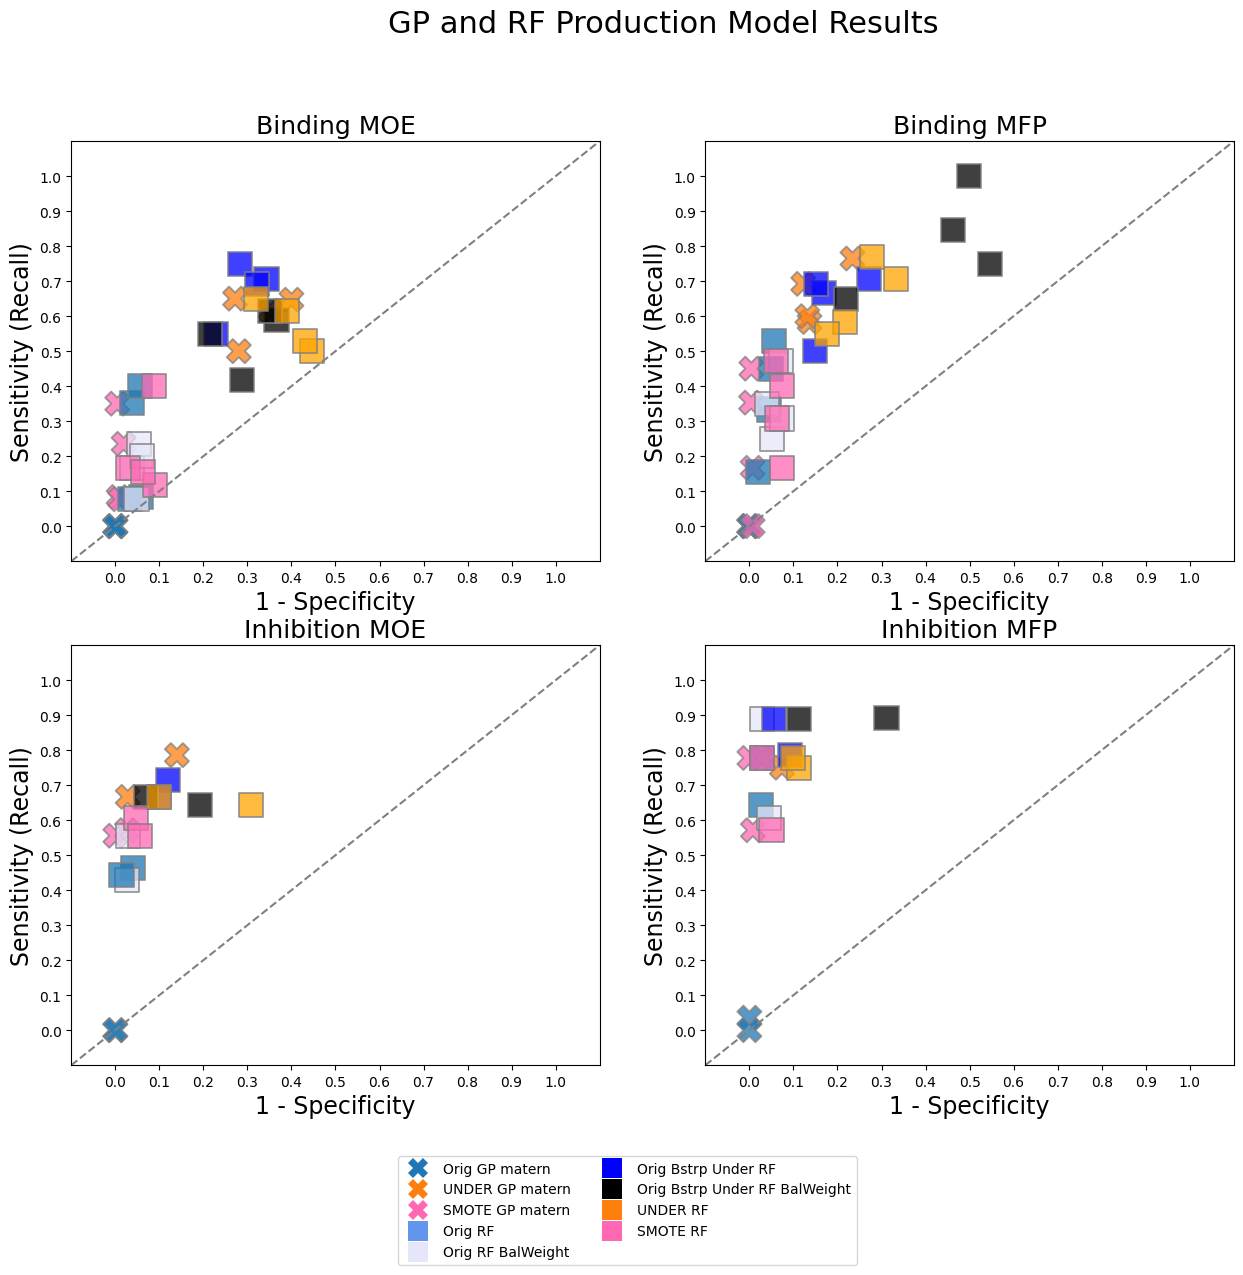

In [27]:
gp=gp[gp['modeling_type']!='GP_RBF']
full_df = pd.concat([gp, total_rf ])
print(full_df.shape)

full_df['nek type']=full_df['nek type'].replace('binding', 'Binding')
full_df['nek type']=full_df['nek type'].replace('inhibition', 'Inhibition')
all_bind = full_df[full_df['nek type'] == 'Binding'] 
all_inhib = full_df[full_df['nek type'] == 'Inhibition'] 

fig, axs = plt.subplots(2,2, figsize=(15,12))
from matplotlib.lines import Line2D
for i, this_df in enumerate(list([all_bind, all_inhib])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    plt.suptitle('GP and RF Production Model Results',fontsize=22, x=0.52, y=0.99)
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[i,0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[i,1],edgecolor='gray')
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=17)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].legend_.remove()
    
    axs[i, 0].set_title(f'{moe_df["nek type"].iloc[0]} MOE', fontsize=18)
    axs[i, 1].set_title(f'{mfp_df["nek type"].iloc[0]} MFP', fontsize=18)
   
    raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='Orig RF BalWeight')
    raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='Orig Bstrp Under RF')
    raw_BRFC_BCW = Line2D([0], [0], color='black', marker='s', markersize=15, linestyle='None', markerfacecolor='black', markeredgewidth=0, label='Orig Bstrp Under RF BalWeight')
    UNDER_RF = Line2D([0], [0], color='tab:orange', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER RF')
    ADASYN_RF = Line2D([0], [0], color='tab:red', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN RF')
    raw_RF =  Line2D([0], [0], color='cornflowerblue', marker='s', markersize=15, linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=0, label='Orig RF')
    UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    UNDER_GP_RBF = Line2D([0],[0], color='tab:orange', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP RBF')
    ADASYN_GP_matern = Line2D([0], [0], color='tab:red', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP matern')
    ADASYN_GP_RBF = Line2D([0], [0], color='tab:red', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP RBF')
    SMOTE_RF = Line2D([0], [0], color='hotpink', marker='s', markersize=15, linestyle='None', markerfacecolor='hotpink', markeredgewidth=0, label='SMOTE RF')
    SMOTE_GP_matern = Line2D([0], [0], color='hotpink', marker='X', markersize=15, linestyle='None', markerfacecolor='hotpink', markeredgewidth=0, label='SMOTE GP matern')
    SMOTE_GP_RBF = Line2D([0], [0], color='hotpink', marker='o', markersize=15, linestyle='None', markerfacecolor='hotpink', markeredgewidth=0, label='SMOTE GP RBF')
    no_samp_GP_matern = Line2D([0], [0], color='tab:blue', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='Orig GP matern')
    no_samp_GP_RBF = Line2D([0], [0], color='tab:blue', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='Orig GP RBF')
   
    axs[1,1].legend(handles=[no_samp_GP_matern,UNDER_GP_matern,SMOTE_GP_matern,
                             raw_RF,raw_RF_BCW,raw_BRFC, raw_BRFC_BCW, UNDER_RF,SMOTE_RF], ncols=2, bbox_to_anchor=(.3, -.2) )

    # plt.savefig(f'RF_GP_prod_results.png',bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

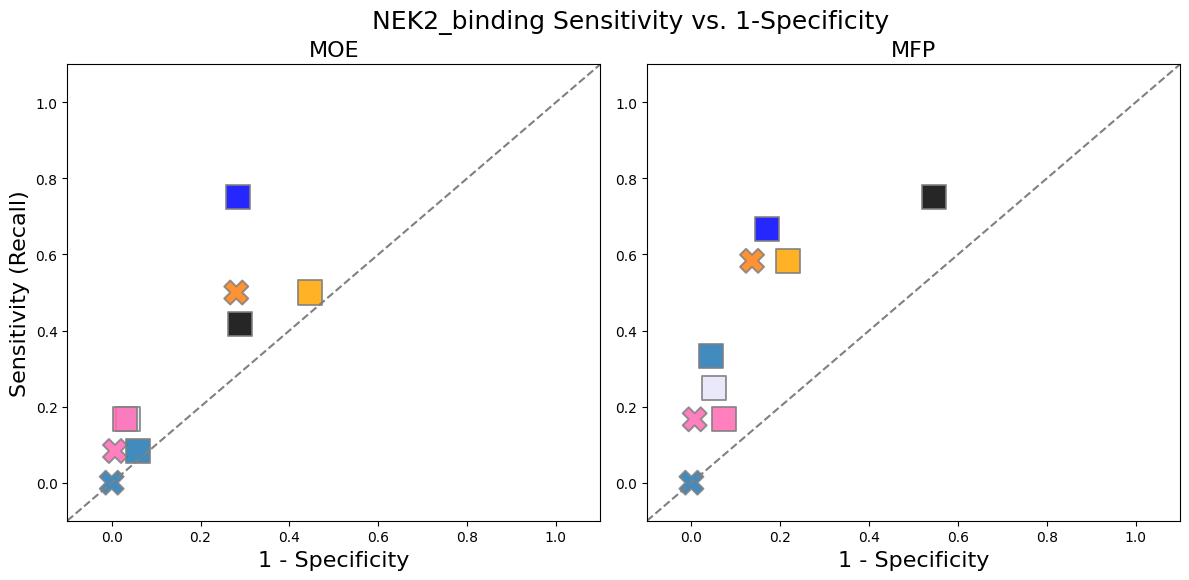

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

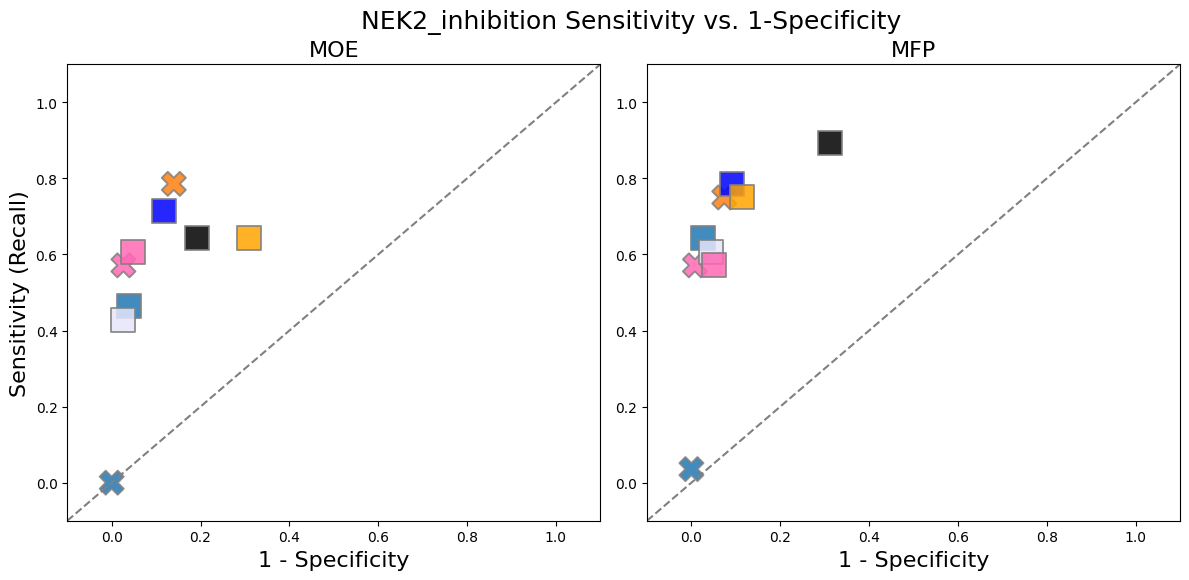

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

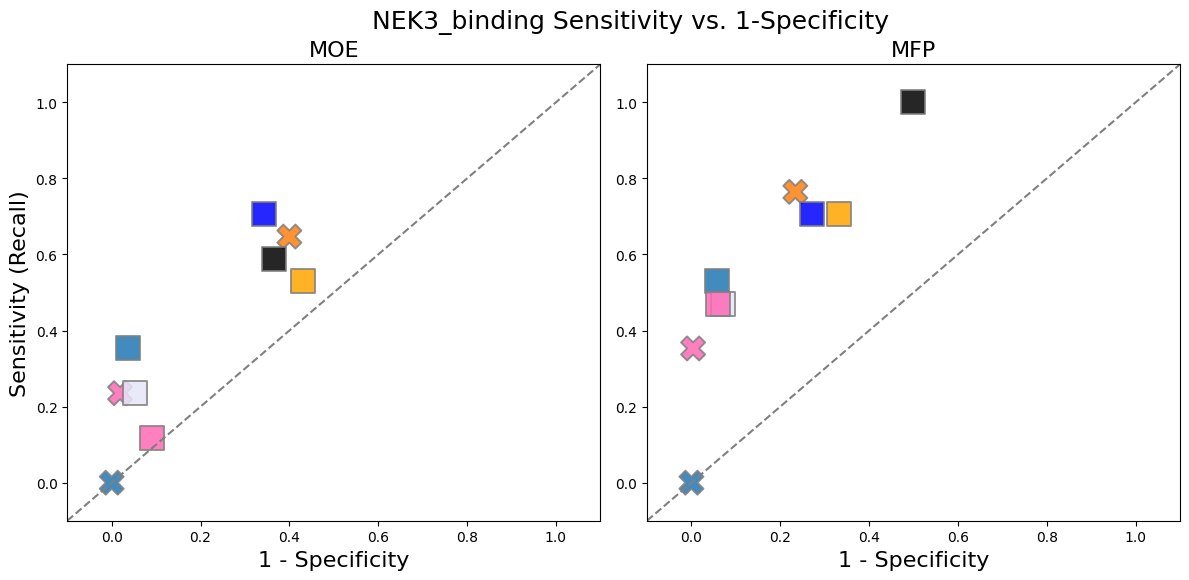

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

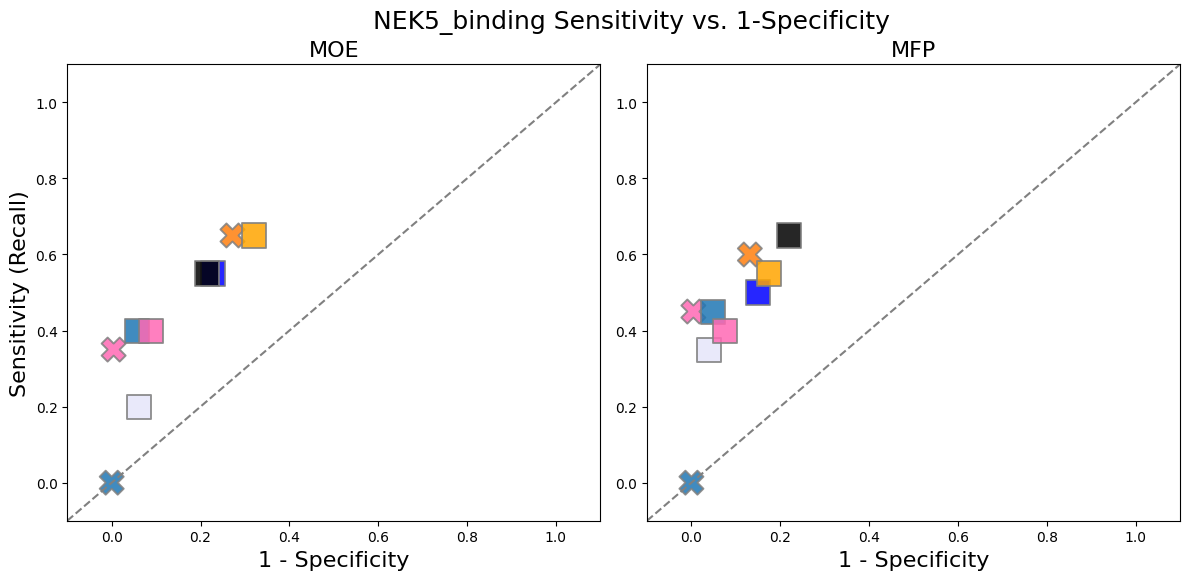

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

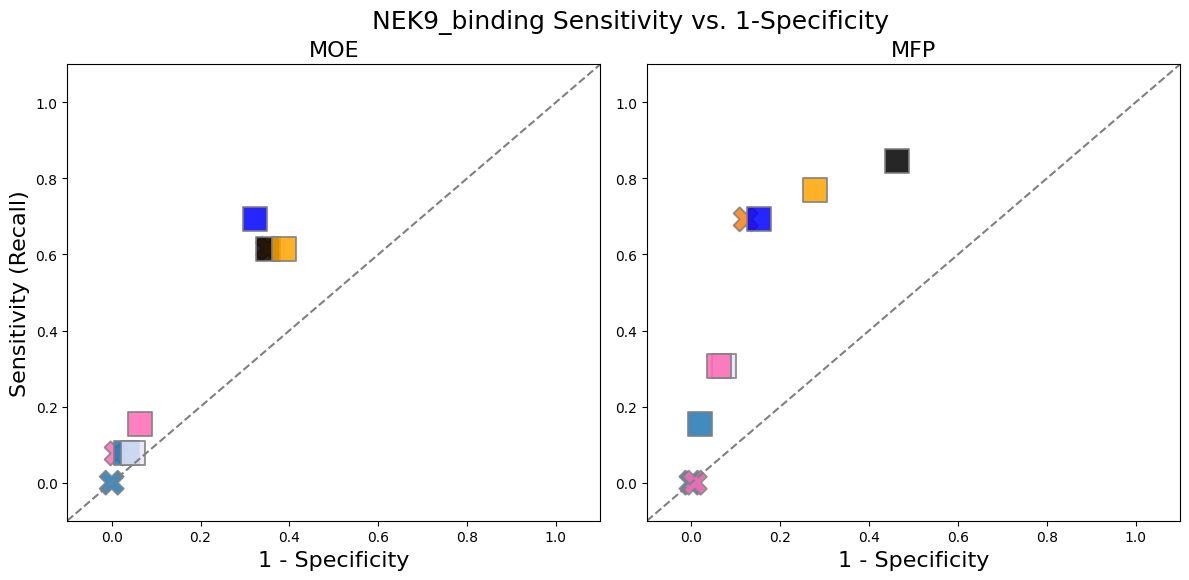

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

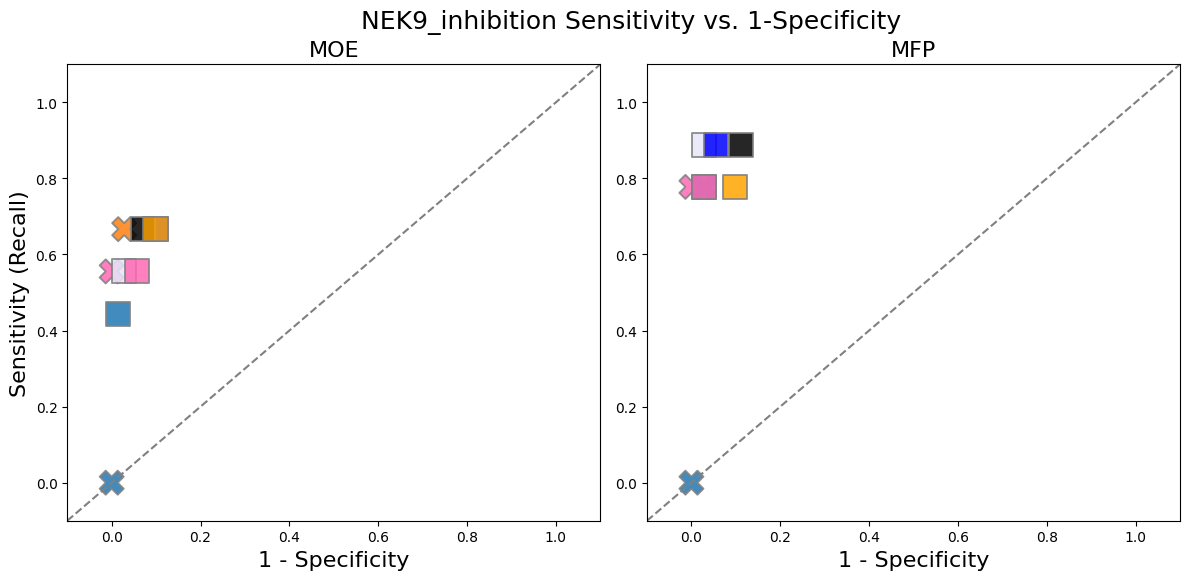

In [28]:
plots = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/plots/'
for nek in full_df['NEK'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    nek_df = full_df[full_df['NEK']==nek] 
    moe_df = nek_df[nek_df['feat_type']=='MOE'] 
    mfp_df =nek_df[nek_df['feat_type']=='MFP'] 
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.85,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.85,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    
    plt.suptitle(f'{nek} Sensitivity vs. 1-Specificity', fontsize=18, x=0.53, y =.96)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=16)
    axs[1].set_ylabel('')
    for i, ax in enumerate(axs): 
        axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
        axs[i].set_xlim(-0.1, 1.1)
        axs[i].set_ylim(-0.1, 1.1)
        axs[i].set_xlabel('1 - Specificity', fontsize=16)
        
        axs[i].get_legend().remove()
        
    axs[0].set_title(f'MOE', fontsize=16)
    axs[1].set_title(f'MFP', fontsize=16)
    # axs[1].legend(ncols=1, bbox_to_anchor=(1.45, 0.78))
    plt.tight_layout()
    plt.savefig(f'{plots}{nek}.png',bbox_inches='tight')

    plt.show();

# average 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

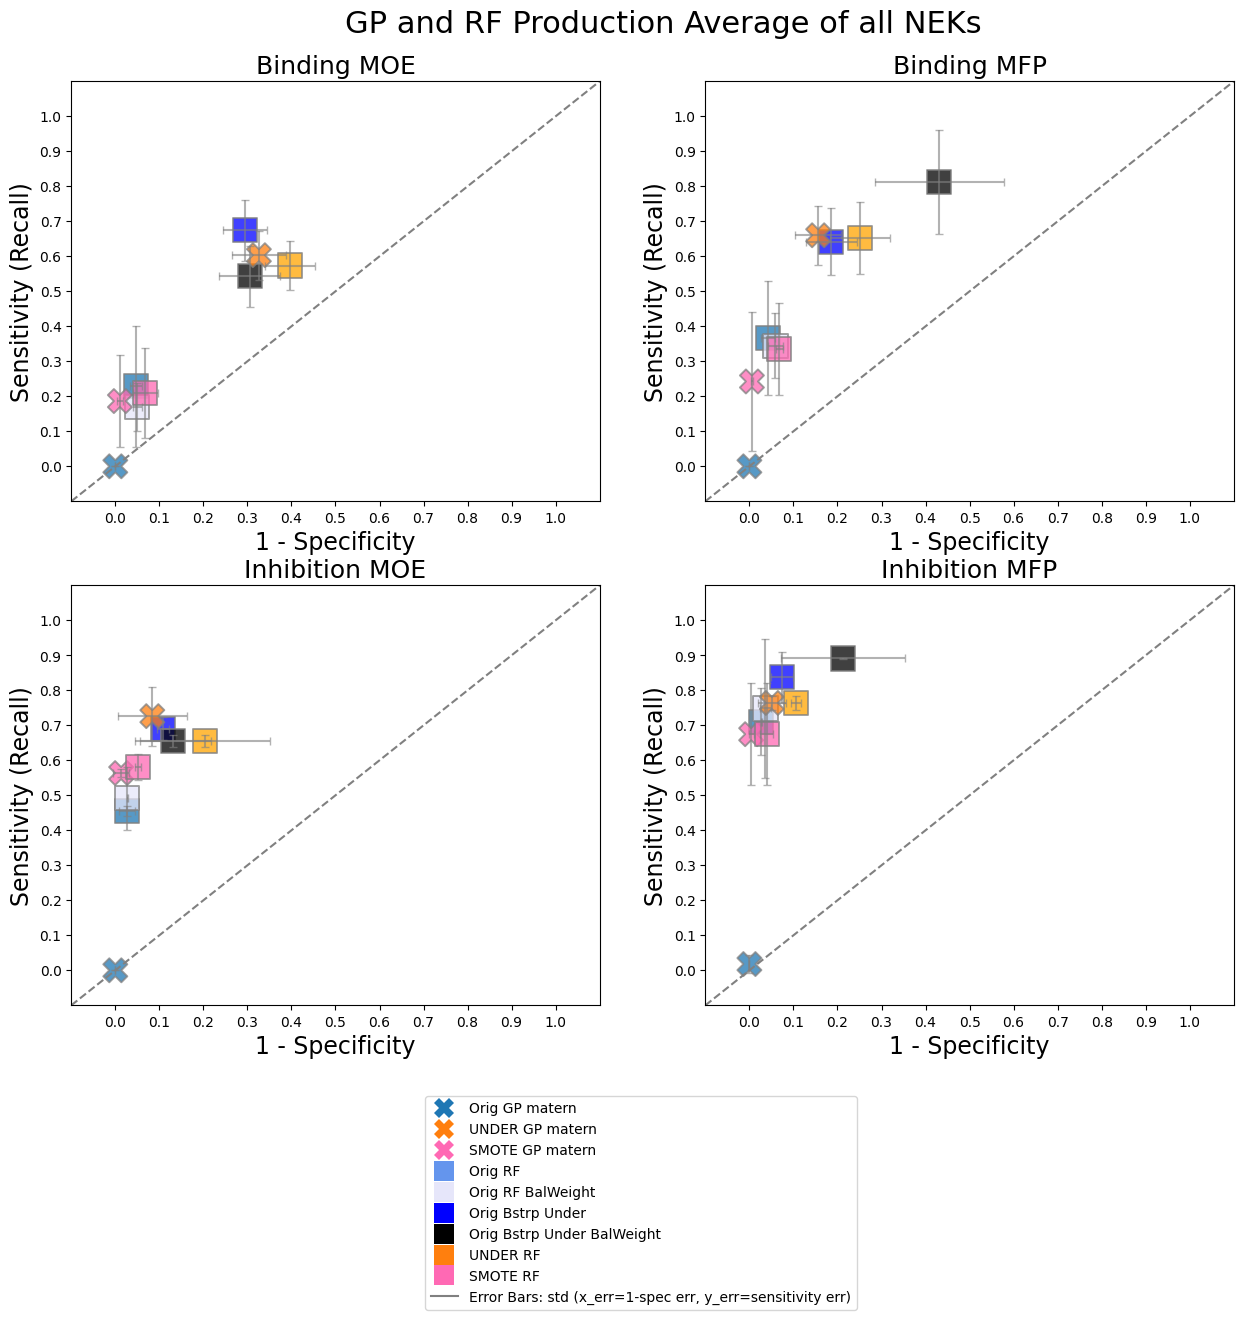

In [30]:

fig, axs = plt.subplots(2,2, figsize=(15,12))
for i, this_df in enumerate(list([all_bind, all_inhib])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    moe_avg=moe_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].mean()
    mfp_avg=mfp_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].mean()
    moe_std = moe_df.groupby(['feat_type', 'strategy', 'modeling_type' ])[['recall', '1-specificity']].std().reset_index()
    mfp_std = mfp_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].std().reset_index()
    
    plt.suptitle('GP and RF Production Average of all NEKs',fontsize=22, x=0.52, y=0.94)
    sns.scatterplot(data=moe_avg, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[i,0])
    axs[i, 0].errorbar(x=moe_avg['1-specificity'], y=moe_avg['recall'],
                       xerr=moe_std['1-specificity'], yerr=moe_std['recall'],
                       fmt='none', ecolor='gray', alpha=0.6, capsize=3, label='std')
    sns.scatterplot(data=mfp_avg, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[i,1],edgecolor='gray')
    axs[i,1].errorbar(x=mfp_avg['1-specificity'], y=mfp_avg['recall'],
                       xerr=mfp_std['1-specificity'], yerr=mfp_std['recall'],
                       fmt='none', ecolor='gray', alpha=0.6, capsize=3, label='std')
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=17)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].legend_.remove()
    
    axs[i, 0].set_title(f'{moe_df["nek type"].iloc[0]} MOE', fontsize=18)
    axs[i, 1].set_title(f'{mfp_df["nek type"].iloc[0]} MFP', fontsize=18)
   
    raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='Orig RF BalWeight')
    raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='Orig Bstrp Under')
    raw_BRFC_BCW = Line2D([0], [0], color='black', marker='s', markersize=15, linestyle='None', markerfacecolor='black', markeredgewidth=0, label='Orig Bstrp Under BalWeight')
    UNDER_RF = Line2D([0], [0], color='tab:orange', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER RF')
    ADASYN_RF = Line2D([0], [0], color='tab:red', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN RF')
    raw_RF =  Line2D([0], [0], color='cornflowerblue', marker='s', markersize=15, linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=0, label='Orig RF')
    UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    UNDER_GP_RBF = Line2D([0],[0], color='tab:orange', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP RBF')
    ADASYN_GP_matern = Line2D([0], [0], color='tab:red', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP matern')
    ADASYN_GP_RBF = Line2D([0], [0], color='tab:red', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP RBF')
    SMOTE_RF = Line2D([0], [0], color='hotpink', marker='s', markersize=15, linestyle='None', markerfacecolor='hotpink', markeredgewidth=0, label='SMOTE RF')
    SMOTE_GP_matern = Line2D([0], [0], color='hotpink', marker='X', markersize=15, linestyle='None', markerfacecolor='hotpink', markeredgewidth=0, label='SMOTE GP matern')
    SMOTE_GP_RBF = Line2D([0], [0], color='hotpink', marker='o', markersize=15, linestyle='None', markerfacecolor='hotpink', markeredgewidth=0, label='SMOTE GP RBF')
    no_samp_GP_matern = Line2D([0], [0], color='tab:blue', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='Orig GP matern')
    no_samp_GP_RBF = Line2D([0], [0], color='tab:blue', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP RBF')
    err_legend = Line2D([0],[0], color='gray', linestyle='-', linewidth=1.5, label='Error Bars: std (x_err=1-spec err, y_err=sensitivity err)')

    axs[1,1].legend(handles=[no_samp_GP_matern,UNDER_GP_matern, SMOTE_GP_matern,
                             raw_RF,raw_RF_BCW,raw_BRFC, raw_BRFC_BCW, UNDER_RF,SMOTE_RF,err_legend], ncols=1, bbox_to_anchor=(.3, -.2) )

    plt.savefig(f'RF_GP_prod_avg.png',bbox_inches='tight')

In [31]:
plotting_test = full_df.copy() 
# plotting_test=plotting_test[plotting_test['strategy']=='no_sampling']
# for nek in plotting_test['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = plotting_test[plotting_test['NEK']==nek] 
#     moe_df = nek_df[nek_df['feat_type']=='MOE'] 
#     mfp_df =nek_df[nek_df['feat_type']=='MFP'] 
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
#                    alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
#                    alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    
#     plt.suptitle(f'{nek} Results Sensitivity vs. 1-Specificity', fontsize=18, x=0.46, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
#         axs[i].get_legend().remove()
        
#     axs[0].set_title(f'MOE', fontsize=16)
#     axs[1].set_title(f'MFP', fontsize=16)
#     axs[1].legend(ncols=1, bbox_to_anchor=(1.45, 0.78))
#     plt.tight_layout()

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3629421293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3629421293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

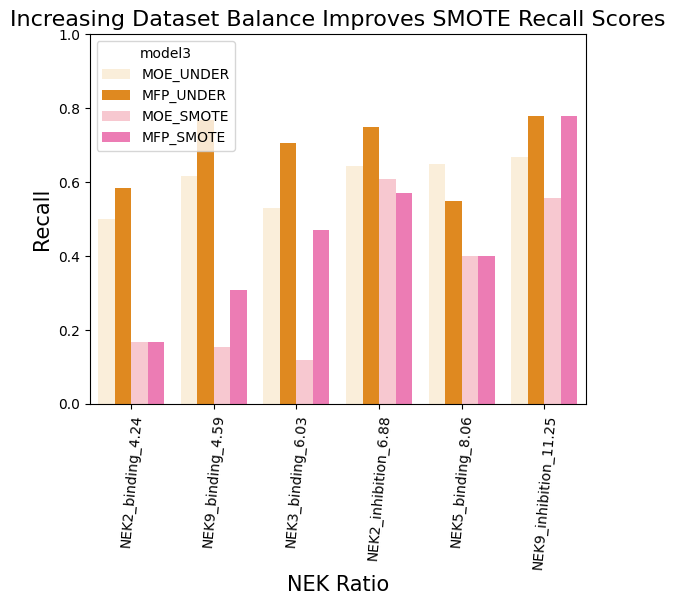

In [218]:
ratio_df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/dataset_creation/NEK_ratios.csv')
ratio_df=ratio_df.replace('none_scaled', 'no_sampling')
ratio_df=ratio_df.round(2)
just_rf = plotting_test[plotting_test['RF_type'] == 'RF']
filtered = just_rf[(just_rf['strategy'] == 'SMOTE_RF') | (just_rf['strategy']=='UNDER_RF')]
# filtered = just_rf[just_rf['strategy'] == 'SMOTE_RF']
filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')
plotting_df = filtered.merge(ratio_df, on=['NEK', 'strategy'])

plotting_df=plotting_df.sort_values('test_active%')
plotting_df['NEK_ratio'] = plotting_df['NEK'].astype(str)+'_'+plotting_df['test_active%'].astype(str)
plotting_df['model2'] = plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['NEK_ratio']
plotting_df['model3'] =plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']
metric_cols = ['recall', '1-specificity','NEK', 'test_active%']

dflong = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                        'NEK_ratio'], value_vars=['recall'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong,x='NEK_ratio', y='Metric_value' ,hue='model3', palette=pal3)
plt.ylabel('Recall',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.title('Increasing Dataset Balance Improves SMOTE Recall Scores',fontsize=16)
plt.savefig('Increasing_Dataset_Balance_Improves_SMOTE_Recall_Scores.png',bbox_inches='tight')
plt.show();


In [32]:

pal3={'MOE_UNDER':'bisque', 'MOE_SMOTE':'pink', 'MFP_UNDER':'darkorange' , 'MFP_SMOTE': 'hotpink',
     'MOE_UNDER_GP_matern': 'palegoldenrod', 'MFP_UNDER_GP_matern': 'gold', 
     'MOE_UNDER_RF': 'bisque', 'MFP_UNDER_RF': 'darkorange', 
     'MOE_SMOTE_GP_matern': 'thistle', 'MFP_SMOTE_GP_matern': 'violet',
    'MFP_SMOTE_RF':'hotpink' , 'MOE_SMOTE_RF': 'pink'}

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_19075/3511876648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_19075/3511876648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

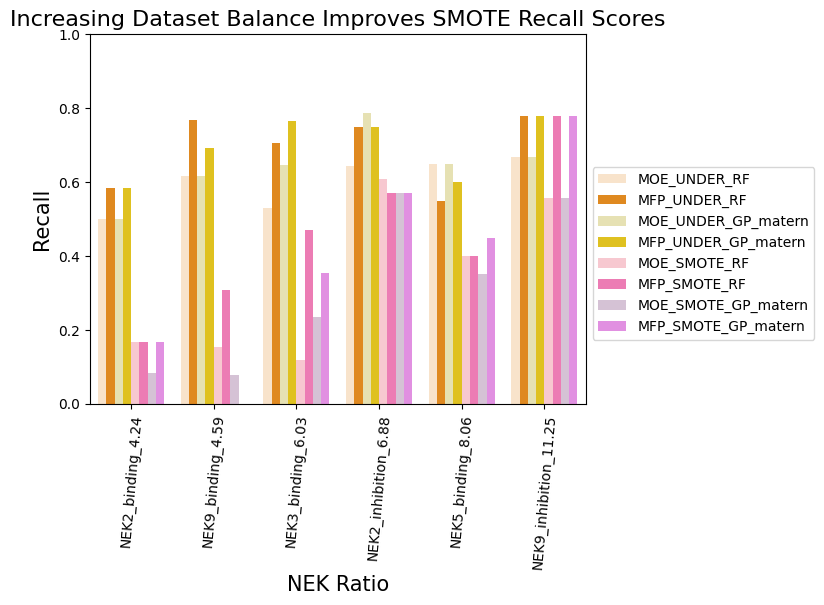

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

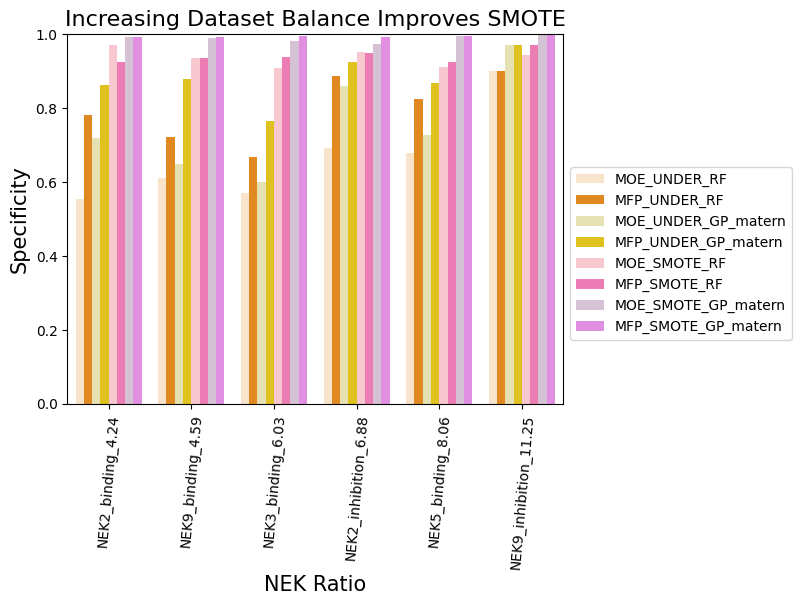

In [33]:
ratio_df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/dataset_creation/NEK_ratios.csv')
ratio_df=ratio_df.replace('none_scaled', 'no_sampling')
ratio_df=ratio_df.round(2)
gps = plotting_test[plotting_test['modeling_type']=='GP_matern']
gp_uo=gps[(gps['strategy']=='SMOTE')|(gps['strategy']=='UNDER')]
just_rf = plotting_test[plotting_test['RF_type'] == 'RF']
filtered = just_rf[(just_rf['strategy'] == 'SMOTE_RF') | (just_rf['strategy']=='UNDER_RF')]
# filtered = just_rf[just_rf['strategy'] == 'SMOTE_RF']
filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')
os_us = pd.concat([gp_uo, filtered])
plotting_df = os_us.merge(ratio_df, on=['NEK', 'strategy'])
# plotting_df=plotting_df[plotting_df['feat_type_x']!='MFP']
plotting_df=plotting_df.sort_values('test_active%')
plotting_df['NEK_ratio'] = plotting_df['NEK'].astype(str)+'_'+plotting_df['test_active%'].astype(str)
plotting_df['model2'] = plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['NEK_ratio']
plotting_df['model3'] =plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']
plotting_df['model4']=plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['modeling_type']
metric_cols = ['recall', '1-specificity','NEK', 'test_active%']

dflong = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                       'model4', 'NEK_ratio', 'specificity'], value_vars=['recall'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong,x='NEK_ratio', y='Metric_value' ,hue='model4', palette=pal3, hue_order=['MOE_UNDER_RF', 'MFP_UNDER_RF', 
            'MOE_UNDER_GP_matern', 'MFP_UNDER_GP_matern', 'MOE_SMOTE_RF', 'MFP_SMOTE_RF', 'MOE_SMOTE_GP_matern', 'MFP_SMOTE_GP_matern'])
plt.ylabel('Recall',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, .66))
plt.title('Increasing Dataset Balance Improves SMOTE Recall Scores',fontsize=16)
plt.savefig('RF_GP_Increasing_Dataset_Balance_Improves_SMOTE_Recall_Scores.png',bbox_inches='tight')
plt.show();


dflong2 = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                       'model4', 'NEK_ratio'], value_vars=['specificity'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong2,x='NEK_ratio', y='Metric_value' ,hue='model4', palette=pal3, hue_order=['MOE_UNDER_RF', 'MFP_UNDER_RF', 
            'MOE_UNDER_GP_matern', 'MFP_UNDER_GP_matern', 'MOE_SMOTE_RF', 'MFP_SMOTE_RF', 'MOE_SMOTE_GP_matern', 'MFP_SMOTE_GP_matern'])
plt.ylabel('Specificity',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, .66))
plt.title('Increasing Dataset Balance Improves SMOTE',fontsize=16)
# plt.savefig('RF_GP_Increasing_Dataset_Balance_Improves_SMOTE.png',bbox_inches='tight')
plt.show();


In [76]:
# col_order =['model', 'feat_type', 'strategy','modeling_type','f1','recall','specificity','distance', 'fbeta_2','balanced_accuracy', '1-specificity','MCC','f1']
import math 
beta_a=2 
beta_b=1.8
full_df['distance'] = np.sqrt((0-full_df['1-specificity'])**2 + (1-full_df['recall'])**2)
full_df['fbeta_2']=((1+(beta_a**2))*full_df['precision']*full_df['recall'])/((beta_a**2)*full_df['precision'])+full_df['recall']
full_df['fbeta_1.8']=((1+(beta_b**2))*full_df['precision']*full_df['recall'])/((beta_b**2)*full_df['precision'])+full_df['recall']
best_bas = []
for nek in neks: 
    full_nek = full_df[full_df['NEK']==nek]
    print(nek)
    top_neks=full_nek.sort_values(['balanced_accuracy'], ascending=False).head(1)
    # display(top_neks[col_order].head(1)) 
    # display(top_neks)
    best_bas.append(top_neks)
# full_df.to_csv('all_prod_results_for_model_selection.csv', index=False)

<IPython.core.display.Javascript object>

NEK2_binding
NEK2_inhibition
NEK3_binding
NEK5_binding
NEK9_binding
NEK9_inhibition


In [75]:

import matplotlib.colors as mcolors
base_or = mcolors.to_rgb('tab:orange') 
lighter_or = [mcolors.to_hex((1 - (1 - np.array(base_or)) * factor)) for factor in np.linspace(0, 1, 4)]

base_bl = mcolors.to_rgb('blue') 
lighter_bl = [mcolors.to_hex((1 - (1 - np.array(base_bl)) * factor)) for factor in np.linspace(0, 1, 2)]
palette_neks = {'NEK3_binding UNDER MFP': '#ffd4af','NEK5_binding UNDER MFP':'#ffbf86', 'NEK9_binding UNDER MFP': '#ff7f0e',
                'NEK9_inhibition Orig_RF_BCW MFP': 'lavender', 'NEK2_binding Orig_BRFC MFP':'blue',
                'NEK2_inhibition Orig_BRFC MFP':'blue'}
                

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prod: Best BA

# Select prod based on best Kfold results

In [105]:
kfold = pd.read_csv('results/kfold_results_temp.csv')
metrics=['balanced_accuracy', 'recall', '1-specificity', 'f1', 'ROC_AUC'] 
kfold_avg = kfold.groupby(['NEK','strategy', 'feat_type', 'nek type', 'modeling_type'])[metrics].mean().reset_index()
kfold_std = kfold.groupby(['NEK','strategy', 'feat_type', 'nek type', 'modeling_type'])[metrics].std().reset_index()
order2 = ['NEK','strategy', 'feat_type', 'balanced_accuracy', 'recall', '1-specificity', 'f1', 'ROC_AUC', 'nek type']
best_kfolds = [] 
for nek in neks:
    nek_df = kfold_avg[kfold_avg['NEK']==nek]
    nek_df=nek_df[nek_df['modeling_type']!='GP_RBF']
    nek_df=nek_df[nek_df['strategy']!='UNDER_GP_matern'] 
    nek_df=nek_df[nek_df['strategy']!='UNDER_RF']
    nek_df=nek_df[order2]
    # display(nek_df.sort_values('balanced_accuracy', ascending=False).head(5))
    best_kfolds.append(nek_df.sort_values('balanced_accuracy', ascending=False).head(1))
best_kfolds_df = pd.concat(best_kfolds, ignore_index=True)
best_kfolds_df['model name'] =best_kfolds_df['NEK'].astype(str)+' '+best_kfolds_df['strategy']+ ' ' +best_kfolds_df['feat_type']
best_kfolds_df.to_csv('kfold_avg_top_BA.csv', index=False) # these are kfold average best Bal Acc


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
for nek in neks: 
    nek_df =kfold_std[kfold_std['NEK']==nek]
    nek_df=nek_df[nek_df['modeling_type']!='GP_RBF']
    nek_df=nek_df[nek_df['strategy']!='UNDER_GP_matern'] 
    nek_df=nek_df[nek_df['strategy']!='UNDER_RF']
    nek_df=nek_df[nek_df['strategy']!='SMOTE_RF']
    nek_df=nek_df[nek_df['strategy']!='SMOTE_GP_RBF']
    nek_df=nek_df[nek_df['strategy']!='SMOTE_GP_matern']
    nek_df=nek_df[nek_df['feat_type']=='MFP']
    
    nek_df=nek_df[order2]
    display(nek_df)

,NEK,strategy,feat_type,balanced_accuracy,recall,1-specificity,f1,ROC_AUC,nek type
12,NEK2_binding,no_sampling_BRFC,MFP,0.063170,0.140115,0.035788,0.040945,0.063170,binding
14,NEK2_binding,no_sampling_BRFC_BCW,MFP,0.055616,0.128581,0.050644,0.013123,0.055616,binding
18,NEK2_binding,no_sampling_GP_matern,MFP,0.000000,0.000000,0.000000,0.000000,0.000000,binding
20,NEK2_binding,no_sampling_RF,MFP,0.081484,0.165400,0.013055,0.142410,0.081484,binding
22,NEK2_binding,no_sampling_RF_BCW,MFP,0.085874,0.178188,0.016997,0.113303,0.085874,binding


,NEK,strategy,feat_type,balanced_accuracy,recall,1-specificity,f1,ROC_AUC,nek type
36,NEK2_inhibition,no_sampling_BRFC,MFP,0.039310,0.073755,0.021392,0.059566,0.039310,inhibition
38,NEK2_inhibition,no_sampling_BRFC_BCW,MFP,0.039694,0.076067,0.032212,0.027666,0.039694,inhibition
42,NEK2_inhibition,no_sampling_GP_matern,MFP,0.013613,0.027226,0.000000,0.051103,0.013613,inhibition
44,NEK2_inhibition,no_sampling_RF,MFP,0.041356,0.083292,0.010062,0.067731,0.041356,inhibition
46,NEK2_inhibition,no_sampling_RF_BCW,MFP,0.047008,0.091737,0.012041,0.077777,0.047008,inhibition


,NEK,strategy,feat_type,balanced_accuracy,recall,1-specificity,f1,ROC_AUC,nek type
60,NEK3_binding,no_sampling_BRFC,MFP,0.065879,0.140378,0.037237,0.042414,0.065879,binding
62,NEK3_binding,no_sampling_BRFC_BCW,MFP,0.051017,0.108751,0.044542,0.019068,0.051017,binding
66,NEK3_binding,no_sampling_GP_matern,MFP,0.000000,0.000000,0.000000,0.000000,0.000000,binding
68,NEK3_binding,no_sampling_RF,MFP,0.061920,0.122576,0.014944,0.121586,0.061920,binding
70,NEK3_binding,no_sampling_RF_BCW,MFP,0.059792,0.118555,0.017291,0.094003,0.059792,binding


,NEK,strategy,feat_type,balanced_accuracy,recall,1-specificity,f1,ROC_AUC,nek type
84,NEK5_binding,no_sampling_BRFC,MFP,0.047996,0.093410,0.037668,0.058705,0.047996,binding
86,NEK5_binding,no_sampling_BRFC_BCW,MFP,0.043779,0.105374,0.055151,0.037971,0.043779,binding
90,NEK5_binding,no_sampling_GP_matern,MFP,0.000000,0.000000,0.000000,0.000000,0.000000,binding
92,NEK5_binding,no_sampling_RF,MFP,0.065571,0.134159,0.015222,0.098436,0.065571,binding
94,NEK5_binding,no_sampling_RF_BCW,MFP,0.056178,0.109934,0.017255,0.090247,0.056178,binding


,NEK,strategy,feat_type,balanced_accuracy,recall,1-specificity,f1,ROC_AUC,nek type
108,NEK9_binding,no_sampling_BRFC,MFP,0.073143,0.162095,0.036210,0.039039,0.073143,binding
110,NEK9_binding,no_sampling_BRFC_BCW,MFP,0.051624,0.110818,0.042440,0.013929,0.051624,binding
114,NEK9_binding,no_sampling_GP_matern,MFP,0.000000,0.000000,0.000000,0.000000,0.000000,binding
116,NEK9_binding,no_sampling_RF,MFP,0.064522,0.129786,0.009956,0.106685,0.064522,binding
118,NEK9_binding,no_sampling_RF_BCW,MFP,0.070818,0.143928,0.016079,0.102082,0.070818,binding


,NEK,strategy,feat_type,balanced_accuracy,recall,1-specificity,f1,ROC_AUC,nek type
132,NEK9_inhibition,no_sampling_BRFC,MFP,0.053512,0.110799,0.040123,0.091992,0.053512,inhibition
134,NEK9_inhibition,no_sampling_BRFC_BCW,MFP,0.046662,0.097506,0.047199,0.076787,0.046662,inhibition
138,NEK9_inhibition,no_sampling_GP_matern,MFP,0.000000,0.000000,0.000000,0.000000,0.000000,inhibition
140,NEK9_inhibition,no_sampling_RF,MFP,0.069141,0.137203,0.026264,0.110098,0.069141,inhibition
142,NEK9_inhibition,no_sampling_RF_BCW,MFP,0.066259,0.133960,0.032003,0.102958,0.066259,inhibition


In [100]:
full_df
final_df = full_df.copy()
final_df=final_df.replace('none_scaled', 'Orig')

final_df['strategy']= final_df['strategy'].replace('Orig_BRFC_BCW', 'Orig Bstrp Under RF BalWeight')

final_df['strategy']= final_df['strategy'].replace('Orig_BRFC', 'Orig Bstrp Under RF')

final_df['model name'] =final_df['NEK'].astype(str)+' '+final_df['strategy']+ ' ' +final_df['feat_type']

# select model names by hand based on kfold results 

final6_df = final_df[(final_df['model name'] == 'NEK2_binding Orig Bstrp Under RF MFP') 
|(final_df['model name'] == 'NEK9_binding Orig Bstrp Under RF MFP') |(final_df['model name'] == 'NEK2_inhibition Orig Bstrp Under RF MFP') 
| (final_df['model name'] == 'NEK5_binding Orig Bstrp Under RF MFP') | (final_df['model name'] == 'NEK3_binding Orig Bstrp Under RF MFP')
|(final_df['model name'] == 'NEK9_inhibition Orig Bstrp Under RF BalWeight MFP')]

final6_df.to_csv('prod_best_BA_notUNDER.csv',index=False)



best_bind = final6_df[final6_df['nek type'] == 'Binding'] 
best_inhib = final6_df[final6_df['nek type'] == 'Inhibition'] 


In [96]:
# prod_palette= {'NEK2_binding Orig_BRFC MFP': ,'NEK3_binding Orig_BRFC MFP': '', 'NEK5_binding Orig_BRFC MFP': '',
# 'NEK9_binding Orig_BRFC MFP': '', 'NEK2_inhibition Orig_BRFC MFP': '', 'NEK9_inhibition Orig_BRFC_BCW MFP': ''}
nek_labels = ['NEK2_binding Orig Bstrp Under RF MFP', 'NEK3_binding Orig Bstrp Under RF MFP', 'NEK5_binding Orig Bstrp Under RF MFP' ,
              'NEK9_binding Orig Bstrp Under RF MFP','NEK2_inhibition Orig Bstrp Under RF MFP' ,'NEK9_inhibition Orig Bstrp Under RF BalWeight MFP']
prod_palette = sns.color_palette("viridis", 6)
prod_dict={}

for n, col in zip(nek_labels, prod_palette): 
    prod_dict[n]=col
print(prod_dict)

<IPython.core.display.Javascript object>

{'NEK2_binding Orig Bstrp Under RF MFP': (0.275191, 0.194905, 0.496005), 'NEK3_binding Orig Bstrp Under RF MFP': (0.212395, 0.359683, 0.55171), 'NEK5_binding Orig Bstrp Under RF MFP': (0.153364, 0.497, 0.557724), 'NEK9_binding Orig Bstrp Under RF MFP': (0.122312, 0.633153, 0.530398), 'NEK2_inhibition Orig Bstrp Under RF MFP': (0.288921, 0.758394, 0.428426), 'NEK9_inhibition Orig Bstrp Under RF BalWeight MFP': (0.626579, 0.854645, 0.223353)}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

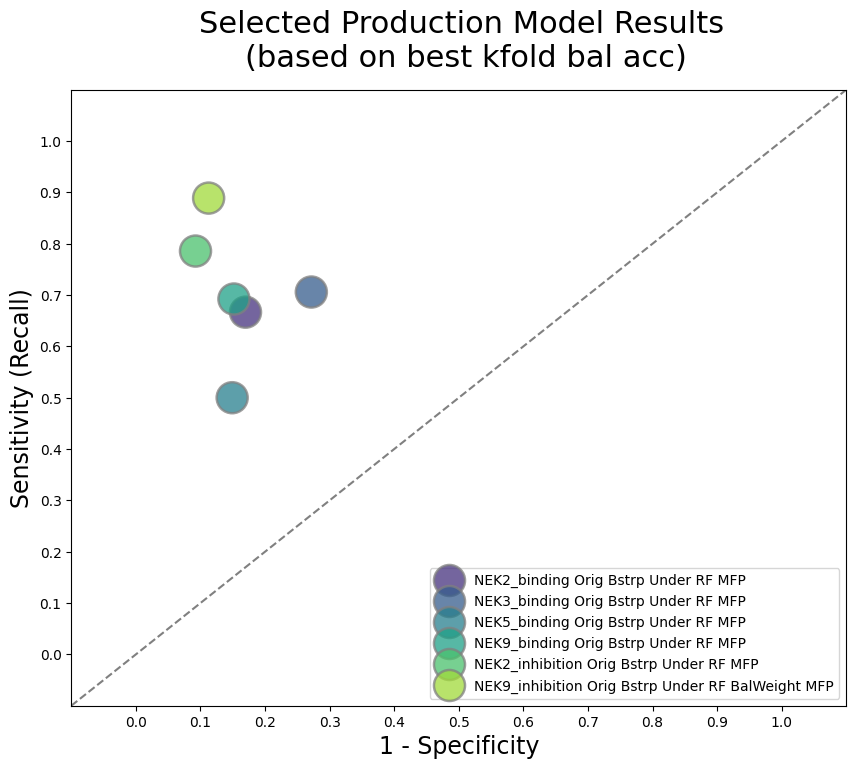

In [116]:
fig, axs = plt.subplots(1,1, figsize=(10,8))
prod_df = pd.concat([best_bind, best_inhib])
plt.suptitle('Selected Production Model Results \n(based on best kfold bal acc)',fontsize=22, x=0.52, y=.98)
sns.scatterplot(data=prod_df, ax=axs,x='1-specificity', y='recall', hue='model name'
    ,alpha=0.75,s=500,edgecolor='gray',legend=True,  palette=prod_dict )
axs.set_ylabel('Sensitivity (Recall)', fontsize=17)

axs.plot([-.1, 1.1], [-.1,1.1], linestyle='--', color='gray')
axs.set_xlabel('1 - Specificity', fontsize=17)

    
axs.set_xlim(-.1,1.1)
axs.set_ylim(-0.1,1.1)
axs.set_xticks(np.arange(0, 1.1, 0.1))
axs.set_yticks(np.arange(0, 1.1, 0.1))
# axs[j].legend_.remove()
axs.legend(loc='lower right')
plt.savefig(f'results/RF_GP_prod_best_BAs.png',bbox_inches='tight')


In [168]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,4))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontsize=18)
    fig.tight_layout();
    return ax


<IPython.core.display.Javascript object>

In [285]:
def calc_pred_type(y_true, y_pred): 
    pred_type = 'err'
    if y_true == 0: 
        if y_pred == 1:
            pred_type='FP'
        else: 
            pred_type='TN'
    else: # if y_true==1
        if y_pred==0:
            pred_type='FN'
        else: 
            pred_type='TP'
    return pred_type

def len_lst(cmpd_lst):
    return len(cmpd_lst) 
    

In [269]:
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
feat_types=['MOE','MFP']
samplings = ['none_scaled','UNDER','SMOTE']
model_types = ['GP', 'RF']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
gp_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
results_list = []
cmpd_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/'
col_order = ['NEK', 'feat_type', 'strategy','modeling_type', 'compound_id', 'active', 'prediction' , 'RF_type']
for nek in neks:
    for feat in feat_types: 
        for samp in samplings: 
            full_df = pd.read_csv(f'{df_path}{nek}_{feat}_{samp}.csv')
            # train=full_df[full_df['subset']=='train'] 
            test=full_df[full_df['subset']=='test'] 
            
            test_cmpds = test[['compound_id', 'active']]
            for model in ['GP']+ RF_types:
                if model == 'GP': 
                    results = pd.read_csv(f'{gp_path}{nek}_{feat}_{samp}_matern_prod_test.csv')[['y_pred']]
                    results=results.rename(columns={'y_pred': 'prediction'})
                    gen_model_type = 'GP_matern'
                    rf_type = 'N/A'
                    model_name='GP_matern'
                else: 
                    results=pd.read_csv(f'{rf_path}{nek}_{feat}_{samp}_{rf}_prod_test.csv')[['prediction']]
                    gen_model_type = 'RF'
                    rf_type = model
                    model_name=rf_type
                    
            
                print(f'{nek} {feat} {samp} {model}')
                test_cmpds = test_cmpds.reset_index(drop=True)
                results = results.reset_index(drop=True)
                
                results_df = pd.concat([test_cmpds, results], axis=1)
                
                
                results_df['NEK'], results_df['feat_type'],results_df['strategy'] = nek,feat, samp
                results_df['modeling_type'],results_df['RF_type'] = gen_model_type, rf_type
                results_df=results_df[col_order]
                results_df['prediction_type'] = results_df.apply(lambda x:calc_pred_type(x['active'] ,x['prediction']), axis=1)
                results_df.to_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model_name}_cmpd_class.csv', index=False)
                display(results_df)
                
#                 results_list.append(results_df) 
# final_results_df = pd.concat(results_list, ignore_index=True)


NEK2_binding MOE none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2562,0,0,N/A,TN
1,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2854,0,0,N/A,TN
2,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2631,0,0,N/A,TN
3,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2754,0,0,N/A,TN
4,NEK2_binding,MOE,none_scaled,GP_matern,kdb_3508,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2800,0,0,N/A,TN
279,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2110,0,0,N/A,TN
280,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2993,0,0,N/A,TN
281,NEK2_binding,MOE,none_scaled,GP_matern,kdb_2219,0,0,N/A,TN


NEK2_binding MOE none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,none_scaled,RF,kdb_2562,0,0,RF,TN
1,NEK2_binding,MOE,none_scaled,RF,kdb_2854,0,0,RF,TN
2,NEK2_binding,MOE,none_scaled,RF,kdb_2631,0,1,RF,FP
3,NEK2_binding,MOE,none_scaled,RF,kdb_2754,0,0,RF,TN
4,NEK2_binding,MOE,none_scaled,RF,kdb_3508,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,none_scaled,RF,kdb_2800,0,0,RF,TN
279,NEK2_binding,MOE,none_scaled,RF,kdb_2110,0,0,RF,TN
280,NEK2_binding,MOE,none_scaled,RF,kdb_2993,0,1,RF,FP
281,NEK2_binding,MOE,none_scaled,RF,kdb_2219,0,1,RF,FP


NEK2_binding MOE none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,none_scaled,RF,kdb_2562,0,0,RF_BCW,TN
1,NEK2_binding,MOE,none_scaled,RF,kdb_2854,0,0,RF_BCW,TN
2,NEK2_binding,MOE,none_scaled,RF,kdb_2631,0,1,RF_BCW,FP
3,NEK2_binding,MOE,none_scaled,RF,kdb_2754,0,0,RF_BCW,TN
4,NEK2_binding,MOE,none_scaled,RF,kdb_3508,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,none_scaled,RF,kdb_2800,0,0,RF_BCW,TN
279,NEK2_binding,MOE,none_scaled,RF,kdb_2110,0,0,RF_BCW,TN
280,NEK2_binding,MOE,none_scaled,RF,kdb_2993,0,1,RF_BCW,FP
281,NEK2_binding,MOE,none_scaled,RF,kdb_2219,0,1,RF_BCW,FP


NEK2_binding MOE none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,none_scaled,RF,kdb_2562,0,0,BRFC,TN
1,NEK2_binding,MOE,none_scaled,RF,kdb_2854,0,0,BRFC,TN
2,NEK2_binding,MOE,none_scaled,RF,kdb_2631,0,1,BRFC,FP
3,NEK2_binding,MOE,none_scaled,RF,kdb_2754,0,0,BRFC,TN
4,NEK2_binding,MOE,none_scaled,RF,kdb_3508,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,none_scaled,RF,kdb_2800,0,0,BRFC,TN
279,NEK2_binding,MOE,none_scaled,RF,kdb_2110,0,0,BRFC,TN
280,NEK2_binding,MOE,none_scaled,RF,kdb_2993,0,1,BRFC,FP
281,NEK2_binding,MOE,none_scaled,RF,kdb_2219,0,1,BRFC,FP


NEK2_binding MOE none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,none_scaled,RF,kdb_2562,0,0,BRFC_BCW,TN
1,NEK2_binding,MOE,none_scaled,RF,kdb_2854,0,0,BRFC_BCW,TN
2,NEK2_binding,MOE,none_scaled,RF,kdb_2631,0,1,BRFC_BCW,FP
3,NEK2_binding,MOE,none_scaled,RF,kdb_2754,0,0,BRFC_BCW,TN
4,NEK2_binding,MOE,none_scaled,RF,kdb_3508,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,none_scaled,RF,kdb_2800,0,0,BRFC_BCW,TN
279,NEK2_binding,MOE,none_scaled,RF,kdb_2110,0,0,BRFC_BCW,TN
280,NEK2_binding,MOE,none_scaled,RF,kdb_2993,0,1,BRFC_BCW,FP
281,NEK2_binding,MOE,none_scaled,RF,kdb_2219,0,1,BRFC_BCW,FP


NEK2_binding MOE UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,UNDER,GP_matern,kdb_2562,0,0,N/A,TN
1,NEK2_binding,MOE,UNDER,GP_matern,kdb_2854,0,0,N/A,TN
2,NEK2_binding,MOE,UNDER,GP_matern,kdb_2631,0,1,N/A,FP
3,NEK2_binding,MOE,UNDER,GP_matern,kdb_2754,0,0,N/A,TN
4,NEK2_binding,MOE,UNDER,GP_matern,kdb_3508,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,UNDER,GP_matern,kdb_2800,0,0,N/A,TN
279,NEK2_binding,MOE,UNDER,GP_matern,kdb_2110,0,1,N/A,FP
280,NEK2_binding,MOE,UNDER,GP_matern,kdb_2993,0,1,N/A,FP
281,NEK2_binding,MOE,UNDER,GP_matern,kdb_2219,0,1,N/A,FP


NEK2_binding MOE UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,UNDER,RF,kdb_2562,0,1,RF,FP
1,NEK2_binding,MOE,UNDER,RF,kdb_2854,0,0,RF,TN
2,NEK2_binding,MOE,UNDER,RF,kdb_2631,0,1,RF,FP
3,NEK2_binding,MOE,UNDER,RF,kdb_2754,0,0,RF,TN
4,NEK2_binding,MOE,UNDER,RF,kdb_3508,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,UNDER,RF,kdb_2800,0,0,RF,TN
279,NEK2_binding,MOE,UNDER,RF,kdb_2110,0,1,RF,FP
280,NEK2_binding,MOE,UNDER,RF,kdb_2993,0,0,RF,TN
281,NEK2_binding,MOE,UNDER,RF,kdb_2219,0,1,RF,FP


NEK2_binding MOE UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,UNDER,RF,kdb_2562,0,1,RF_BCW,FP
1,NEK2_binding,MOE,UNDER,RF,kdb_2854,0,0,RF_BCW,TN
2,NEK2_binding,MOE,UNDER,RF,kdb_2631,0,1,RF_BCW,FP
3,NEK2_binding,MOE,UNDER,RF,kdb_2754,0,0,RF_BCW,TN
4,NEK2_binding,MOE,UNDER,RF,kdb_3508,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,UNDER,RF,kdb_2800,0,0,RF_BCW,TN
279,NEK2_binding,MOE,UNDER,RF,kdb_2110,0,1,RF_BCW,FP
280,NEK2_binding,MOE,UNDER,RF,kdb_2993,0,0,RF_BCW,TN
281,NEK2_binding,MOE,UNDER,RF,kdb_2219,0,1,RF_BCW,FP


NEK2_binding MOE UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,UNDER,RF,kdb_2562,0,1,BRFC,FP
1,NEK2_binding,MOE,UNDER,RF,kdb_2854,0,0,BRFC,TN
2,NEK2_binding,MOE,UNDER,RF,kdb_2631,0,1,BRFC,FP
3,NEK2_binding,MOE,UNDER,RF,kdb_2754,0,0,BRFC,TN
4,NEK2_binding,MOE,UNDER,RF,kdb_3508,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,UNDER,RF,kdb_2800,0,0,BRFC,TN
279,NEK2_binding,MOE,UNDER,RF,kdb_2110,0,1,BRFC,FP
280,NEK2_binding,MOE,UNDER,RF,kdb_2993,0,0,BRFC,TN
281,NEK2_binding,MOE,UNDER,RF,kdb_2219,0,1,BRFC,FP


NEK2_binding MOE UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,UNDER,RF,kdb_2562,0,1,BRFC_BCW,FP
1,NEK2_binding,MOE,UNDER,RF,kdb_2854,0,0,BRFC_BCW,TN
2,NEK2_binding,MOE,UNDER,RF,kdb_2631,0,1,BRFC_BCW,FP
3,NEK2_binding,MOE,UNDER,RF,kdb_2754,0,0,BRFC_BCW,TN
4,NEK2_binding,MOE,UNDER,RF,kdb_3508,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,UNDER,RF,kdb_2800,0,0,BRFC_BCW,TN
279,NEK2_binding,MOE,UNDER,RF,kdb_2110,0,1,BRFC_BCW,FP
280,NEK2_binding,MOE,UNDER,RF,kdb_2993,0,0,BRFC_BCW,TN
281,NEK2_binding,MOE,UNDER,RF,kdb_2219,0,1,BRFC_BCW,FP


NEK2_binding MOE SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2562,0,0,N/A,TN
1,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2854,0,0,N/A,TN
2,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2631,0,0,N/A,TN
3,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2754,0,0,N/A,TN
4,NEK2_binding,MOE,SMOTE,GP_matern,kdb_3508,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2800,0,0,N/A,TN
279,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2110,0,0,N/A,TN
280,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2993,0,0,N/A,TN
281,NEK2_binding,MOE,SMOTE,GP_matern,kdb_2219,0,0,N/A,TN


NEK2_binding MOE SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,SMOTE,RF,kdb_2562,0,0,RF,TN
1,NEK2_binding,MOE,SMOTE,RF,kdb_2854,0,0,RF,TN
2,NEK2_binding,MOE,SMOTE,RF,kdb_2631,0,0,RF,TN
3,NEK2_binding,MOE,SMOTE,RF,kdb_2754,0,0,RF,TN
4,NEK2_binding,MOE,SMOTE,RF,kdb_3508,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,SMOTE,RF,kdb_2800,0,0,RF,TN
279,NEK2_binding,MOE,SMOTE,RF,kdb_2110,0,0,RF,TN
280,NEK2_binding,MOE,SMOTE,RF,kdb_2993,0,1,RF,FP
281,NEK2_binding,MOE,SMOTE,RF,kdb_2219,0,0,RF,TN


NEK2_binding MOE SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,SMOTE,RF,kdb_2562,0,0,RF_BCW,TN
1,NEK2_binding,MOE,SMOTE,RF,kdb_2854,0,0,RF_BCW,TN
2,NEK2_binding,MOE,SMOTE,RF,kdb_2631,0,0,RF_BCW,TN
3,NEK2_binding,MOE,SMOTE,RF,kdb_2754,0,0,RF_BCW,TN
4,NEK2_binding,MOE,SMOTE,RF,kdb_3508,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,SMOTE,RF,kdb_2800,0,0,RF_BCW,TN
279,NEK2_binding,MOE,SMOTE,RF,kdb_2110,0,0,RF_BCW,TN
280,NEK2_binding,MOE,SMOTE,RF,kdb_2993,0,1,RF_BCW,FP
281,NEK2_binding,MOE,SMOTE,RF,kdb_2219,0,0,RF_BCW,TN


NEK2_binding MOE SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,SMOTE,RF,kdb_2562,0,0,BRFC,TN
1,NEK2_binding,MOE,SMOTE,RF,kdb_2854,0,0,BRFC,TN
2,NEK2_binding,MOE,SMOTE,RF,kdb_2631,0,0,BRFC,TN
3,NEK2_binding,MOE,SMOTE,RF,kdb_2754,0,0,BRFC,TN
4,NEK2_binding,MOE,SMOTE,RF,kdb_3508,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,SMOTE,RF,kdb_2800,0,0,BRFC,TN
279,NEK2_binding,MOE,SMOTE,RF,kdb_2110,0,0,BRFC,TN
280,NEK2_binding,MOE,SMOTE,RF,kdb_2993,0,1,BRFC,FP
281,NEK2_binding,MOE,SMOTE,RF,kdb_2219,0,0,BRFC,TN


NEK2_binding MOE SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MOE,SMOTE,RF,kdb_2562,0,0,BRFC_BCW,TN
1,NEK2_binding,MOE,SMOTE,RF,kdb_2854,0,0,BRFC_BCW,TN
2,NEK2_binding,MOE,SMOTE,RF,kdb_2631,0,0,BRFC_BCW,TN
3,NEK2_binding,MOE,SMOTE,RF,kdb_2754,0,0,BRFC_BCW,TN
4,NEK2_binding,MOE,SMOTE,RF,kdb_3508,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MOE,SMOTE,RF,kdb_2800,0,0,BRFC_BCW,TN
279,NEK2_binding,MOE,SMOTE,RF,kdb_2110,0,0,BRFC_BCW,TN
280,NEK2_binding,MOE,SMOTE,RF,kdb_2993,0,1,BRFC_BCW,FP
281,NEK2_binding,MOE,SMOTE,RF,kdb_2219,0,0,BRFC_BCW,TN


NEK2_binding MFP none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,none_scaled,GP_matern,kdb_115,0,0,N/A,TN
1,NEK2_binding,MFP,none_scaled,GP_matern,kdb_120,0,0,N/A,TN
2,NEK2_binding,MFP,none_scaled,GP_matern,kdb_1219,0,0,N/A,TN
3,NEK2_binding,MFP,none_scaled,GP_matern,kdb_122,0,0,N/A,TN
4,NEK2_binding,MFP,none_scaled,GP_matern,kdb_130,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,none_scaled,GP_matern,kdb_2667,1,0,N/A,FN
279,NEK2_binding,MFP,none_scaled,GP_matern,kdb_2696,1,0,N/A,FN
280,NEK2_binding,MFP,none_scaled,GP_matern,kdb_2840,1,0,N/A,FN
281,NEK2_binding,MFP,none_scaled,GP_matern,kdb_2863,1,0,N/A,FN


NEK2_binding MFP none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,none_scaled,RF,kdb_115,0,0,RF,TN
1,NEK2_binding,MFP,none_scaled,RF,kdb_120,0,1,RF,FP
2,NEK2_binding,MFP,none_scaled,RF,kdb_1219,0,1,RF,FP
3,NEK2_binding,MFP,none_scaled,RF,kdb_122,0,1,RF,FP
4,NEK2_binding,MFP,none_scaled,RF,kdb_130,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,none_scaled,RF,kdb_2667,1,0,RF,FN
279,NEK2_binding,MFP,none_scaled,RF,kdb_2696,1,1,RF,TP
280,NEK2_binding,MFP,none_scaled,RF,kdb_2840,1,1,RF,TP
281,NEK2_binding,MFP,none_scaled,RF,kdb_2863,1,1,RF,TP


NEK2_binding MFP none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,none_scaled,RF,kdb_115,0,0,RF_BCW,TN
1,NEK2_binding,MFP,none_scaled,RF,kdb_120,0,1,RF_BCW,FP
2,NEK2_binding,MFP,none_scaled,RF,kdb_1219,0,1,RF_BCW,FP
3,NEK2_binding,MFP,none_scaled,RF,kdb_122,0,1,RF_BCW,FP
4,NEK2_binding,MFP,none_scaled,RF,kdb_130,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,none_scaled,RF,kdb_2667,1,0,RF_BCW,FN
279,NEK2_binding,MFP,none_scaled,RF,kdb_2696,1,1,RF_BCW,TP
280,NEK2_binding,MFP,none_scaled,RF,kdb_2840,1,1,RF_BCW,TP
281,NEK2_binding,MFP,none_scaled,RF,kdb_2863,1,1,RF_BCW,TP


NEK2_binding MFP none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,none_scaled,RF,kdb_115,0,0,BRFC,TN
1,NEK2_binding,MFP,none_scaled,RF,kdb_120,0,1,BRFC,FP
2,NEK2_binding,MFP,none_scaled,RF,kdb_1219,0,1,BRFC,FP
3,NEK2_binding,MFP,none_scaled,RF,kdb_122,0,1,BRFC,FP
4,NEK2_binding,MFP,none_scaled,RF,kdb_130,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,none_scaled,RF,kdb_2667,1,0,BRFC,FN
279,NEK2_binding,MFP,none_scaled,RF,kdb_2696,1,1,BRFC,TP
280,NEK2_binding,MFP,none_scaled,RF,kdb_2840,1,1,BRFC,TP
281,NEK2_binding,MFP,none_scaled,RF,kdb_2863,1,1,BRFC,TP


NEK2_binding MFP none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,none_scaled,RF,kdb_115,0,0,BRFC_BCW,TN
1,NEK2_binding,MFP,none_scaled,RF,kdb_120,0,1,BRFC_BCW,FP
2,NEK2_binding,MFP,none_scaled,RF,kdb_1219,0,1,BRFC_BCW,FP
3,NEK2_binding,MFP,none_scaled,RF,kdb_122,0,1,BRFC_BCW,FP
4,NEK2_binding,MFP,none_scaled,RF,kdb_130,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,none_scaled,RF,kdb_2667,1,0,BRFC_BCW,FN
279,NEK2_binding,MFP,none_scaled,RF,kdb_2696,1,1,BRFC_BCW,TP
280,NEK2_binding,MFP,none_scaled,RF,kdb_2840,1,1,BRFC_BCW,TP
281,NEK2_binding,MFP,none_scaled,RF,kdb_2863,1,1,BRFC_BCW,TP


NEK2_binding MFP UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,UNDER,GP_matern,kdb_115,0,0,N/A,TN
1,NEK2_binding,MFP,UNDER,GP_matern,kdb_120,0,0,N/A,TN
2,NEK2_binding,MFP,UNDER,GP_matern,kdb_1219,0,0,N/A,TN
3,NEK2_binding,MFP,UNDER,GP_matern,kdb_122,0,1,N/A,FP
4,NEK2_binding,MFP,UNDER,GP_matern,kdb_130,0,1,N/A,FP
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,UNDER,GP_matern,kdb_2667,1,1,N/A,TP
279,NEK2_binding,MFP,UNDER,GP_matern,kdb_2696,1,0,N/A,FN
280,NEK2_binding,MFP,UNDER,GP_matern,kdb_2840,1,1,N/A,TP
281,NEK2_binding,MFP,UNDER,GP_matern,kdb_2863,1,1,N/A,TP


NEK2_binding MFP UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,UNDER,RF,kdb_115,0,0,RF,TN
1,NEK2_binding,MFP,UNDER,RF,kdb_120,0,0,RF,TN
2,NEK2_binding,MFP,UNDER,RF,kdb_1219,0,0,RF,TN
3,NEK2_binding,MFP,UNDER,RF,kdb_122,0,1,RF,FP
4,NEK2_binding,MFP,UNDER,RF,kdb_130,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,UNDER,RF,kdb_2667,1,1,RF,TP
279,NEK2_binding,MFP,UNDER,RF,kdb_2696,1,0,RF,FN
280,NEK2_binding,MFP,UNDER,RF,kdb_2840,1,1,RF,TP
281,NEK2_binding,MFP,UNDER,RF,kdb_2863,1,1,RF,TP


NEK2_binding MFP UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,UNDER,RF,kdb_115,0,0,RF_BCW,TN
1,NEK2_binding,MFP,UNDER,RF,kdb_120,0,0,RF_BCW,TN
2,NEK2_binding,MFP,UNDER,RF,kdb_1219,0,0,RF_BCW,TN
3,NEK2_binding,MFP,UNDER,RF,kdb_122,0,1,RF_BCW,FP
4,NEK2_binding,MFP,UNDER,RF,kdb_130,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,UNDER,RF,kdb_2667,1,1,RF_BCW,TP
279,NEK2_binding,MFP,UNDER,RF,kdb_2696,1,0,RF_BCW,FN
280,NEK2_binding,MFP,UNDER,RF,kdb_2840,1,1,RF_BCW,TP
281,NEK2_binding,MFP,UNDER,RF,kdb_2863,1,1,RF_BCW,TP


NEK2_binding MFP UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,UNDER,RF,kdb_115,0,0,BRFC,TN
1,NEK2_binding,MFP,UNDER,RF,kdb_120,0,0,BRFC,TN
2,NEK2_binding,MFP,UNDER,RF,kdb_1219,0,0,BRFC,TN
3,NEK2_binding,MFP,UNDER,RF,kdb_122,0,1,BRFC,FP
4,NEK2_binding,MFP,UNDER,RF,kdb_130,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,UNDER,RF,kdb_2667,1,1,BRFC,TP
279,NEK2_binding,MFP,UNDER,RF,kdb_2696,1,0,BRFC,FN
280,NEK2_binding,MFP,UNDER,RF,kdb_2840,1,1,BRFC,TP
281,NEK2_binding,MFP,UNDER,RF,kdb_2863,1,1,BRFC,TP


NEK2_binding MFP UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,UNDER,RF,kdb_115,0,0,BRFC_BCW,TN
1,NEK2_binding,MFP,UNDER,RF,kdb_120,0,0,BRFC_BCW,TN
2,NEK2_binding,MFP,UNDER,RF,kdb_1219,0,0,BRFC_BCW,TN
3,NEK2_binding,MFP,UNDER,RF,kdb_122,0,1,BRFC_BCW,FP
4,NEK2_binding,MFP,UNDER,RF,kdb_130,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,UNDER,RF,kdb_2667,1,1,BRFC_BCW,TP
279,NEK2_binding,MFP,UNDER,RF,kdb_2696,1,0,BRFC_BCW,FN
280,NEK2_binding,MFP,UNDER,RF,kdb_2840,1,1,BRFC_BCW,TP
281,NEK2_binding,MFP,UNDER,RF,kdb_2863,1,1,BRFC_BCW,TP


NEK2_binding MFP SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,SMOTE,GP_matern,kdb_115,0,0,N/A,TN
1,NEK2_binding,MFP,SMOTE,GP_matern,kdb_120,0,0,N/A,TN
2,NEK2_binding,MFP,SMOTE,GP_matern,kdb_1219,0,0,N/A,TN
3,NEK2_binding,MFP,SMOTE,GP_matern,kdb_122,0,0,N/A,TN
4,NEK2_binding,MFP,SMOTE,GP_matern,kdb_130,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,SMOTE,GP_matern,kdb_2667,1,0,N/A,FN
279,NEK2_binding,MFP,SMOTE,GP_matern,kdb_2696,1,0,N/A,FN
280,NEK2_binding,MFP,SMOTE,GP_matern,kdb_2840,1,0,N/A,FN
281,NEK2_binding,MFP,SMOTE,GP_matern,kdb_2863,1,0,N/A,FN


NEK2_binding MFP SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,SMOTE,RF,kdb_115,0,0,RF,TN
1,NEK2_binding,MFP,SMOTE,RF,kdb_120,0,0,RF,TN
2,NEK2_binding,MFP,SMOTE,RF,kdb_1219,0,0,RF,TN
3,NEK2_binding,MFP,SMOTE,RF,kdb_122,0,0,RF,TN
4,NEK2_binding,MFP,SMOTE,RF,kdb_130,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,SMOTE,RF,kdb_2667,1,0,RF,FN
279,NEK2_binding,MFP,SMOTE,RF,kdb_2696,1,0,RF,FN
280,NEK2_binding,MFP,SMOTE,RF,kdb_2840,1,1,RF,TP
281,NEK2_binding,MFP,SMOTE,RF,kdb_2863,1,0,RF,FN


NEK2_binding MFP SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,SMOTE,RF,kdb_115,0,0,RF_BCW,TN
1,NEK2_binding,MFP,SMOTE,RF,kdb_120,0,0,RF_BCW,TN
2,NEK2_binding,MFP,SMOTE,RF,kdb_1219,0,0,RF_BCW,TN
3,NEK2_binding,MFP,SMOTE,RF,kdb_122,0,0,RF_BCW,TN
4,NEK2_binding,MFP,SMOTE,RF,kdb_130,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,SMOTE,RF,kdb_2667,1,0,RF_BCW,FN
279,NEK2_binding,MFP,SMOTE,RF,kdb_2696,1,0,RF_BCW,FN
280,NEK2_binding,MFP,SMOTE,RF,kdb_2840,1,1,RF_BCW,TP
281,NEK2_binding,MFP,SMOTE,RF,kdb_2863,1,0,RF_BCW,FN


NEK2_binding MFP SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,SMOTE,RF,kdb_115,0,0,BRFC,TN
1,NEK2_binding,MFP,SMOTE,RF,kdb_120,0,0,BRFC,TN
2,NEK2_binding,MFP,SMOTE,RF,kdb_1219,0,0,BRFC,TN
3,NEK2_binding,MFP,SMOTE,RF,kdb_122,0,0,BRFC,TN
4,NEK2_binding,MFP,SMOTE,RF,kdb_130,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,SMOTE,RF,kdb_2667,1,0,BRFC,FN
279,NEK2_binding,MFP,SMOTE,RF,kdb_2696,1,0,BRFC,FN
280,NEK2_binding,MFP,SMOTE,RF,kdb_2840,1,1,BRFC,TP
281,NEK2_binding,MFP,SMOTE,RF,kdb_2863,1,0,BRFC,FN


NEK2_binding MFP SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_binding,MFP,SMOTE,RF,kdb_115,0,0,BRFC_BCW,TN
1,NEK2_binding,MFP,SMOTE,RF,kdb_120,0,0,BRFC_BCW,TN
2,NEK2_binding,MFP,SMOTE,RF,kdb_1219,0,0,BRFC_BCW,TN
3,NEK2_binding,MFP,SMOTE,RF,kdb_122,0,0,BRFC_BCW,TN
4,NEK2_binding,MFP,SMOTE,RF,kdb_130,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK2_binding,MFP,SMOTE,RF,kdb_2667,1,0,BRFC_BCW,FN
279,NEK2_binding,MFP,SMOTE,RF,kdb_2696,1,0,BRFC_BCW,FN
280,NEK2_binding,MFP,SMOTE,RF,kdb_2840,1,1,BRFC_BCW,TP
281,NEK2_binding,MFP,SMOTE,RF,kdb_2863,1,0,BRFC_BCW,FN


NEK2_inhibition MOE none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_819,1,0,N/A,FN
1,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_952,0,0,N/A,TN
2,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_682,0,0,N/A,TN
3,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_1216,0,0,N/A,TN
4,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_481,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_1458,0,0,N/A,TN
403,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_3179,0,0,N/A,TN
404,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_794,0,0,N/A,TN
405,NEK2_inhibition,MOE,none_scaled,GP_matern,kdb_687,0,0,N/A,TN


NEK2_inhibition MOE none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,none_scaled,RF,kdb_819,1,0,RF,FN
1,NEK2_inhibition,MOE,none_scaled,RF,kdb_952,0,0,RF,TN
2,NEK2_inhibition,MOE,none_scaled,RF,kdb_682,0,0,RF,TN
3,NEK2_inhibition,MOE,none_scaled,RF,kdb_1216,0,0,RF,TN
4,NEK2_inhibition,MOE,none_scaled,RF,kdb_481,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,none_scaled,RF,kdb_1458,0,1,RF,FP
403,NEK2_inhibition,MOE,none_scaled,RF,kdb_3179,0,1,RF,FP
404,NEK2_inhibition,MOE,none_scaled,RF,kdb_794,0,0,RF,TN
405,NEK2_inhibition,MOE,none_scaled,RF,kdb_687,0,0,RF,TN


NEK2_inhibition MOE none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,none_scaled,RF,kdb_819,1,0,RF_BCW,FN
1,NEK2_inhibition,MOE,none_scaled,RF,kdb_952,0,0,RF_BCW,TN
2,NEK2_inhibition,MOE,none_scaled,RF,kdb_682,0,0,RF_BCW,TN
3,NEK2_inhibition,MOE,none_scaled,RF,kdb_1216,0,0,RF_BCW,TN
4,NEK2_inhibition,MOE,none_scaled,RF,kdb_481,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,none_scaled,RF,kdb_1458,0,1,RF_BCW,FP
403,NEK2_inhibition,MOE,none_scaled,RF,kdb_3179,0,1,RF_BCW,FP
404,NEK2_inhibition,MOE,none_scaled,RF,kdb_794,0,0,RF_BCW,TN
405,NEK2_inhibition,MOE,none_scaled,RF,kdb_687,0,0,RF_BCW,TN


NEK2_inhibition MOE none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,none_scaled,RF,kdb_819,1,0,BRFC,FN
1,NEK2_inhibition,MOE,none_scaled,RF,kdb_952,0,0,BRFC,TN
2,NEK2_inhibition,MOE,none_scaled,RF,kdb_682,0,0,BRFC,TN
3,NEK2_inhibition,MOE,none_scaled,RF,kdb_1216,0,0,BRFC,TN
4,NEK2_inhibition,MOE,none_scaled,RF,kdb_481,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,none_scaled,RF,kdb_1458,0,1,BRFC,FP
403,NEK2_inhibition,MOE,none_scaled,RF,kdb_3179,0,1,BRFC,FP
404,NEK2_inhibition,MOE,none_scaled,RF,kdb_794,0,0,BRFC,TN
405,NEK2_inhibition,MOE,none_scaled,RF,kdb_687,0,0,BRFC,TN


NEK2_inhibition MOE none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,none_scaled,RF,kdb_819,1,0,BRFC_BCW,FN
1,NEK2_inhibition,MOE,none_scaled,RF,kdb_952,0,0,BRFC_BCW,TN
2,NEK2_inhibition,MOE,none_scaled,RF,kdb_682,0,0,BRFC_BCW,TN
3,NEK2_inhibition,MOE,none_scaled,RF,kdb_1216,0,0,BRFC_BCW,TN
4,NEK2_inhibition,MOE,none_scaled,RF,kdb_481,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,none_scaled,RF,kdb_1458,0,1,BRFC_BCW,FP
403,NEK2_inhibition,MOE,none_scaled,RF,kdb_3179,0,1,BRFC_BCW,FP
404,NEK2_inhibition,MOE,none_scaled,RF,kdb_794,0,0,BRFC_BCW,TN
405,NEK2_inhibition,MOE,none_scaled,RF,kdb_687,0,0,BRFC_BCW,TN


NEK2_inhibition MOE UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_819,1,0,N/A,FN
1,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_952,0,0,N/A,TN
2,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_682,0,0,N/A,TN
3,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_1216,0,0,N/A,TN
4,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_481,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_1458,0,1,N/A,FP
403,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_3179,0,1,N/A,FP
404,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_794,0,1,N/A,FP
405,NEK2_inhibition,MOE,UNDER,GP_matern,kdb_687,0,0,N/A,TN


NEK2_inhibition MOE UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,UNDER,RF,kdb_819,1,1,RF,TP
1,NEK2_inhibition,MOE,UNDER,RF,kdb_952,0,0,RF,TN
2,NEK2_inhibition,MOE,UNDER,RF,kdb_682,0,0,RF,TN
3,NEK2_inhibition,MOE,UNDER,RF,kdb_1216,0,0,RF,TN
4,NEK2_inhibition,MOE,UNDER,RF,kdb_481,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,UNDER,RF,kdb_1458,0,1,RF,FP
403,NEK2_inhibition,MOE,UNDER,RF,kdb_3179,0,1,RF,FP
404,NEK2_inhibition,MOE,UNDER,RF,kdb_794,0,0,RF,TN
405,NEK2_inhibition,MOE,UNDER,RF,kdb_687,0,1,RF,FP


NEK2_inhibition MOE UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,UNDER,RF,kdb_819,1,1,RF_BCW,TP
1,NEK2_inhibition,MOE,UNDER,RF,kdb_952,0,0,RF_BCW,TN
2,NEK2_inhibition,MOE,UNDER,RF,kdb_682,0,0,RF_BCW,TN
3,NEK2_inhibition,MOE,UNDER,RF,kdb_1216,0,0,RF_BCW,TN
4,NEK2_inhibition,MOE,UNDER,RF,kdb_481,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,UNDER,RF,kdb_1458,0,1,RF_BCW,FP
403,NEK2_inhibition,MOE,UNDER,RF,kdb_3179,0,1,RF_BCW,FP
404,NEK2_inhibition,MOE,UNDER,RF,kdb_794,0,0,RF_BCW,TN
405,NEK2_inhibition,MOE,UNDER,RF,kdb_687,0,1,RF_BCW,FP


NEK2_inhibition MOE UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,UNDER,RF,kdb_819,1,1,BRFC,TP
1,NEK2_inhibition,MOE,UNDER,RF,kdb_952,0,0,BRFC,TN
2,NEK2_inhibition,MOE,UNDER,RF,kdb_682,0,0,BRFC,TN
3,NEK2_inhibition,MOE,UNDER,RF,kdb_1216,0,0,BRFC,TN
4,NEK2_inhibition,MOE,UNDER,RF,kdb_481,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,UNDER,RF,kdb_1458,0,1,BRFC,FP
403,NEK2_inhibition,MOE,UNDER,RF,kdb_3179,0,1,BRFC,FP
404,NEK2_inhibition,MOE,UNDER,RF,kdb_794,0,0,BRFC,TN
405,NEK2_inhibition,MOE,UNDER,RF,kdb_687,0,1,BRFC,FP


NEK2_inhibition MOE UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,UNDER,RF,kdb_819,1,1,BRFC_BCW,TP
1,NEK2_inhibition,MOE,UNDER,RF,kdb_952,0,0,BRFC_BCW,TN
2,NEK2_inhibition,MOE,UNDER,RF,kdb_682,0,0,BRFC_BCW,TN
3,NEK2_inhibition,MOE,UNDER,RF,kdb_1216,0,0,BRFC_BCW,TN
4,NEK2_inhibition,MOE,UNDER,RF,kdb_481,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,UNDER,RF,kdb_1458,0,1,BRFC_BCW,FP
403,NEK2_inhibition,MOE,UNDER,RF,kdb_3179,0,1,BRFC_BCW,FP
404,NEK2_inhibition,MOE,UNDER,RF,kdb_794,0,0,BRFC_BCW,TN
405,NEK2_inhibition,MOE,UNDER,RF,kdb_687,0,1,BRFC_BCW,FP


NEK2_inhibition MOE SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_819,1,0,N/A,FN
1,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_952,0,0,N/A,TN
2,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_682,0,0,N/A,TN
3,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_1216,0,0,N/A,TN
4,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_481,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_1458,0,0,N/A,TN
403,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_3179,0,0,N/A,TN
404,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_794,0,0,N/A,TN
405,NEK2_inhibition,MOE,SMOTE,GP_matern,kdb_687,0,0,N/A,TN


NEK2_inhibition MOE SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,SMOTE,RF,kdb_819,1,0,RF,FN
1,NEK2_inhibition,MOE,SMOTE,RF,kdb_952,0,0,RF,TN
2,NEK2_inhibition,MOE,SMOTE,RF,kdb_682,0,0,RF,TN
3,NEK2_inhibition,MOE,SMOTE,RF,kdb_1216,0,0,RF,TN
4,NEK2_inhibition,MOE,SMOTE,RF,kdb_481,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,SMOTE,RF,kdb_1458,0,0,RF,TN
403,NEK2_inhibition,MOE,SMOTE,RF,kdb_3179,0,0,RF,TN
404,NEK2_inhibition,MOE,SMOTE,RF,kdb_794,0,1,RF,FP
405,NEK2_inhibition,MOE,SMOTE,RF,kdb_687,0,0,RF,TN


NEK2_inhibition MOE SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,SMOTE,RF,kdb_819,1,0,RF_BCW,FN
1,NEK2_inhibition,MOE,SMOTE,RF,kdb_952,0,0,RF_BCW,TN
2,NEK2_inhibition,MOE,SMOTE,RF,kdb_682,0,0,RF_BCW,TN
3,NEK2_inhibition,MOE,SMOTE,RF,kdb_1216,0,0,RF_BCW,TN
4,NEK2_inhibition,MOE,SMOTE,RF,kdb_481,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,SMOTE,RF,kdb_1458,0,0,RF_BCW,TN
403,NEK2_inhibition,MOE,SMOTE,RF,kdb_3179,0,0,RF_BCW,TN
404,NEK2_inhibition,MOE,SMOTE,RF,kdb_794,0,1,RF_BCW,FP
405,NEK2_inhibition,MOE,SMOTE,RF,kdb_687,0,0,RF_BCW,TN


NEK2_inhibition MOE SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,SMOTE,RF,kdb_819,1,0,BRFC,FN
1,NEK2_inhibition,MOE,SMOTE,RF,kdb_952,0,0,BRFC,TN
2,NEK2_inhibition,MOE,SMOTE,RF,kdb_682,0,0,BRFC,TN
3,NEK2_inhibition,MOE,SMOTE,RF,kdb_1216,0,0,BRFC,TN
4,NEK2_inhibition,MOE,SMOTE,RF,kdb_481,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,SMOTE,RF,kdb_1458,0,0,BRFC,TN
403,NEK2_inhibition,MOE,SMOTE,RF,kdb_3179,0,0,BRFC,TN
404,NEK2_inhibition,MOE,SMOTE,RF,kdb_794,0,1,BRFC,FP
405,NEK2_inhibition,MOE,SMOTE,RF,kdb_687,0,0,BRFC,TN


NEK2_inhibition MOE SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MOE,SMOTE,RF,kdb_819,1,0,BRFC_BCW,FN
1,NEK2_inhibition,MOE,SMOTE,RF,kdb_952,0,0,BRFC_BCW,TN
2,NEK2_inhibition,MOE,SMOTE,RF,kdb_682,0,0,BRFC_BCW,TN
3,NEK2_inhibition,MOE,SMOTE,RF,kdb_1216,0,0,BRFC_BCW,TN
4,NEK2_inhibition,MOE,SMOTE,RF,kdb_481,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MOE,SMOTE,RF,kdb_1458,0,0,BRFC_BCW,TN
403,NEK2_inhibition,MOE,SMOTE,RF,kdb_3179,0,0,BRFC_BCW,TN
404,NEK2_inhibition,MOE,SMOTE,RF,kdb_794,0,1,BRFC_BCW,FP
405,NEK2_inhibition,MOE,SMOTE,RF,kdb_687,0,0,BRFC_BCW,TN


NEK2_inhibition MFP none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_1025,0,0,N/A,TN
1,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_1033,0,0,N/A,TN
2,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_1035,0,0,N/A,TN
3,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_1038,0,0,N/A,TN
4,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_1051,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_749,1,0,N/A,FN
403,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_819,1,0,N/A,FN
404,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_840,1,0,N/A,FN
405,NEK2_inhibition,MFP,none_scaled,GP_matern,kdb_872,1,0,N/A,FN


NEK2_inhibition MFP none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,none_scaled,RF,kdb_1025,0,1,RF,FP
1,NEK2_inhibition,MFP,none_scaled,RF,kdb_1033,0,1,RF,FP
2,NEK2_inhibition,MFP,none_scaled,RF,kdb_1035,0,0,RF,TN
3,NEK2_inhibition,MFP,none_scaled,RF,kdb_1038,0,1,RF,FP
4,NEK2_inhibition,MFP,none_scaled,RF,kdb_1051,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,none_scaled,RF,kdb_749,1,0,RF,FN
403,NEK2_inhibition,MFP,none_scaled,RF,kdb_819,1,1,RF,TP
404,NEK2_inhibition,MFP,none_scaled,RF,kdb_840,1,1,RF,TP
405,NEK2_inhibition,MFP,none_scaled,RF,kdb_872,1,1,RF,TP


NEK2_inhibition MFP none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,none_scaled,RF,kdb_1025,0,1,RF_BCW,FP
1,NEK2_inhibition,MFP,none_scaled,RF,kdb_1033,0,1,RF_BCW,FP
2,NEK2_inhibition,MFP,none_scaled,RF,kdb_1035,0,0,RF_BCW,TN
3,NEK2_inhibition,MFP,none_scaled,RF,kdb_1038,0,1,RF_BCW,FP
4,NEK2_inhibition,MFP,none_scaled,RF,kdb_1051,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,none_scaled,RF,kdb_749,1,0,RF_BCW,FN
403,NEK2_inhibition,MFP,none_scaled,RF,kdb_819,1,1,RF_BCW,TP
404,NEK2_inhibition,MFP,none_scaled,RF,kdb_840,1,1,RF_BCW,TP
405,NEK2_inhibition,MFP,none_scaled,RF,kdb_872,1,1,RF_BCW,TP


NEK2_inhibition MFP none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,none_scaled,RF,kdb_1025,0,1,BRFC,FP
1,NEK2_inhibition,MFP,none_scaled,RF,kdb_1033,0,1,BRFC,FP
2,NEK2_inhibition,MFP,none_scaled,RF,kdb_1035,0,0,BRFC,TN
3,NEK2_inhibition,MFP,none_scaled,RF,kdb_1038,0,1,BRFC,FP
4,NEK2_inhibition,MFP,none_scaled,RF,kdb_1051,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,none_scaled,RF,kdb_749,1,0,BRFC,FN
403,NEK2_inhibition,MFP,none_scaled,RF,kdb_819,1,1,BRFC,TP
404,NEK2_inhibition,MFP,none_scaled,RF,kdb_840,1,1,BRFC,TP
405,NEK2_inhibition,MFP,none_scaled,RF,kdb_872,1,1,BRFC,TP


NEK2_inhibition MFP none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,none_scaled,RF,kdb_1025,0,1,BRFC_BCW,FP
1,NEK2_inhibition,MFP,none_scaled,RF,kdb_1033,0,1,BRFC_BCW,FP
2,NEK2_inhibition,MFP,none_scaled,RF,kdb_1035,0,0,BRFC_BCW,TN
3,NEK2_inhibition,MFP,none_scaled,RF,kdb_1038,0,1,BRFC_BCW,FP
4,NEK2_inhibition,MFP,none_scaled,RF,kdb_1051,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,none_scaled,RF,kdb_749,1,0,BRFC_BCW,FN
403,NEK2_inhibition,MFP,none_scaled,RF,kdb_819,1,1,BRFC_BCW,TP
404,NEK2_inhibition,MFP,none_scaled,RF,kdb_840,1,1,BRFC_BCW,TP
405,NEK2_inhibition,MFP,none_scaled,RF,kdb_872,1,1,BRFC_BCW,TP


NEK2_inhibition MFP UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_1025,0,0,N/A,TN
1,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_1033,0,0,N/A,TN
2,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_1035,0,0,N/A,TN
3,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_1038,0,0,N/A,TN
4,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_1051,0,1,N/A,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_749,1,0,N/A,FN
403,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_819,1,0,N/A,FN
404,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_840,1,1,N/A,TP
405,NEK2_inhibition,MFP,UNDER,GP_matern,kdb_872,1,1,N/A,TP


NEK2_inhibition MFP UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,UNDER,RF,kdb_1025,0,0,RF,TN
1,NEK2_inhibition,MFP,UNDER,RF,kdb_1033,0,1,RF,FP
2,NEK2_inhibition,MFP,UNDER,RF,kdb_1035,0,0,RF,TN
3,NEK2_inhibition,MFP,UNDER,RF,kdb_1038,0,0,RF,TN
4,NEK2_inhibition,MFP,UNDER,RF,kdb_1051,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,UNDER,RF,kdb_749,1,1,RF,TP
403,NEK2_inhibition,MFP,UNDER,RF,kdb_819,1,0,RF,FN
404,NEK2_inhibition,MFP,UNDER,RF,kdb_840,1,1,RF,TP
405,NEK2_inhibition,MFP,UNDER,RF,kdb_872,1,1,RF,TP


NEK2_inhibition MFP UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,UNDER,RF,kdb_1025,0,0,RF_BCW,TN
1,NEK2_inhibition,MFP,UNDER,RF,kdb_1033,0,1,RF_BCW,FP
2,NEK2_inhibition,MFP,UNDER,RF,kdb_1035,0,0,RF_BCW,TN
3,NEK2_inhibition,MFP,UNDER,RF,kdb_1038,0,0,RF_BCW,TN
4,NEK2_inhibition,MFP,UNDER,RF,kdb_1051,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,UNDER,RF,kdb_749,1,1,RF_BCW,TP
403,NEK2_inhibition,MFP,UNDER,RF,kdb_819,1,0,RF_BCW,FN
404,NEK2_inhibition,MFP,UNDER,RF,kdb_840,1,1,RF_BCW,TP
405,NEK2_inhibition,MFP,UNDER,RF,kdb_872,1,1,RF_BCW,TP


NEK2_inhibition MFP UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,UNDER,RF,kdb_1025,0,0,BRFC,TN
1,NEK2_inhibition,MFP,UNDER,RF,kdb_1033,0,1,BRFC,FP
2,NEK2_inhibition,MFP,UNDER,RF,kdb_1035,0,0,BRFC,TN
3,NEK2_inhibition,MFP,UNDER,RF,kdb_1038,0,0,BRFC,TN
4,NEK2_inhibition,MFP,UNDER,RF,kdb_1051,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,UNDER,RF,kdb_749,1,1,BRFC,TP
403,NEK2_inhibition,MFP,UNDER,RF,kdb_819,1,0,BRFC,FN
404,NEK2_inhibition,MFP,UNDER,RF,kdb_840,1,1,BRFC,TP
405,NEK2_inhibition,MFP,UNDER,RF,kdb_872,1,1,BRFC,TP


NEK2_inhibition MFP UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,UNDER,RF,kdb_1025,0,0,BRFC_BCW,TN
1,NEK2_inhibition,MFP,UNDER,RF,kdb_1033,0,1,BRFC_BCW,FP
2,NEK2_inhibition,MFP,UNDER,RF,kdb_1035,0,0,BRFC_BCW,TN
3,NEK2_inhibition,MFP,UNDER,RF,kdb_1038,0,0,BRFC_BCW,TN
4,NEK2_inhibition,MFP,UNDER,RF,kdb_1051,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,UNDER,RF,kdb_749,1,1,BRFC_BCW,TP
403,NEK2_inhibition,MFP,UNDER,RF,kdb_819,1,0,BRFC_BCW,FN
404,NEK2_inhibition,MFP,UNDER,RF,kdb_840,1,1,BRFC_BCW,TP
405,NEK2_inhibition,MFP,UNDER,RF,kdb_872,1,1,BRFC_BCW,TP


NEK2_inhibition MFP SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_1025,0,0,N/A,TN
1,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_1033,0,0,N/A,TN
2,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_1035,0,0,N/A,TN
3,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_1038,0,0,N/A,TN
4,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_1051,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_749,1,0,N/A,FN
403,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_819,1,0,N/A,FN
404,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_840,1,1,N/A,TP
405,NEK2_inhibition,MFP,SMOTE,GP_matern,kdb_872,1,0,N/A,FN


NEK2_inhibition MFP SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,SMOTE,RF,kdb_1025,0,0,RF,TN
1,NEK2_inhibition,MFP,SMOTE,RF,kdb_1033,0,0,RF,TN
2,NEK2_inhibition,MFP,SMOTE,RF,kdb_1035,0,0,RF,TN
3,NEK2_inhibition,MFP,SMOTE,RF,kdb_1038,0,0,RF,TN
4,NEK2_inhibition,MFP,SMOTE,RF,kdb_1051,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,SMOTE,RF,kdb_749,1,0,RF,FN
403,NEK2_inhibition,MFP,SMOTE,RF,kdb_819,1,0,RF,FN
404,NEK2_inhibition,MFP,SMOTE,RF,kdb_840,1,1,RF,TP
405,NEK2_inhibition,MFP,SMOTE,RF,kdb_872,1,0,RF,FN


NEK2_inhibition MFP SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,SMOTE,RF,kdb_1025,0,0,RF_BCW,TN
1,NEK2_inhibition,MFP,SMOTE,RF,kdb_1033,0,0,RF_BCW,TN
2,NEK2_inhibition,MFP,SMOTE,RF,kdb_1035,0,0,RF_BCW,TN
3,NEK2_inhibition,MFP,SMOTE,RF,kdb_1038,0,0,RF_BCW,TN
4,NEK2_inhibition,MFP,SMOTE,RF,kdb_1051,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,SMOTE,RF,kdb_749,1,0,RF_BCW,FN
403,NEK2_inhibition,MFP,SMOTE,RF,kdb_819,1,0,RF_BCW,FN
404,NEK2_inhibition,MFP,SMOTE,RF,kdb_840,1,1,RF_BCW,TP
405,NEK2_inhibition,MFP,SMOTE,RF,kdb_872,1,0,RF_BCW,FN


NEK2_inhibition MFP SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,SMOTE,RF,kdb_1025,0,0,BRFC,TN
1,NEK2_inhibition,MFP,SMOTE,RF,kdb_1033,0,0,BRFC,TN
2,NEK2_inhibition,MFP,SMOTE,RF,kdb_1035,0,0,BRFC,TN
3,NEK2_inhibition,MFP,SMOTE,RF,kdb_1038,0,0,BRFC,TN
4,NEK2_inhibition,MFP,SMOTE,RF,kdb_1051,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,SMOTE,RF,kdb_749,1,0,BRFC,FN
403,NEK2_inhibition,MFP,SMOTE,RF,kdb_819,1,0,BRFC,FN
404,NEK2_inhibition,MFP,SMOTE,RF,kdb_840,1,1,BRFC,TP
405,NEK2_inhibition,MFP,SMOTE,RF,kdb_872,1,0,BRFC,FN


NEK2_inhibition MFP SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK2_inhibition,MFP,SMOTE,RF,kdb_1025,0,0,BRFC_BCW,TN
1,NEK2_inhibition,MFP,SMOTE,RF,kdb_1033,0,0,BRFC_BCW,TN
2,NEK2_inhibition,MFP,SMOTE,RF,kdb_1035,0,0,BRFC_BCW,TN
3,NEK2_inhibition,MFP,SMOTE,RF,kdb_1038,0,0,BRFC_BCW,TN
4,NEK2_inhibition,MFP,SMOTE,RF,kdb_1051,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
402,NEK2_inhibition,MFP,SMOTE,RF,kdb_749,1,0,BRFC_BCW,FN
403,NEK2_inhibition,MFP,SMOTE,RF,kdb_819,1,0,BRFC_BCW,FN
404,NEK2_inhibition,MFP,SMOTE,RF,kdb_840,1,1,BRFC_BCW,TP
405,NEK2_inhibition,MFP,SMOTE,RF,kdb_872,1,0,BRFC_BCW,FN


NEK3_binding MOE none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,none_scaled,GP_matern,kdb_2690,0,0,N/A,TN
1,NEK3_binding,MOE,none_scaled,GP_matern,kdb_98,0,0,N/A,TN
2,NEK3_binding,MOE,none_scaled,GP_matern,kdb_2082,0,0,N/A,TN
3,NEK3_binding,MOE,none_scaled,GP_matern,kdb_2350,0,0,N/A,TN
4,NEK3_binding,MOE,none_scaled,GP_matern,kdb_2655,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,none_scaled,GP_matern,kdb_75,0,0,N/A,TN
278,NEK3_binding,MOE,none_scaled,GP_matern,kdb_132,0,0,N/A,TN
279,NEK3_binding,MOE,none_scaled,GP_matern,kdb_3049,0,0,N/A,TN
280,NEK3_binding,MOE,none_scaled,GP_matern,kdb_2518,0,0,N/A,TN


NEK3_binding MOE none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,none_scaled,RF,kdb_2690,0,1,RF,FP
1,NEK3_binding,MOE,none_scaled,RF,kdb_98,0,0,RF,TN
2,NEK3_binding,MOE,none_scaled,RF,kdb_2082,0,1,RF,FP
3,NEK3_binding,MOE,none_scaled,RF,kdb_2350,0,0,RF,TN
4,NEK3_binding,MOE,none_scaled,RF,kdb_2655,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,none_scaled,RF,kdb_75,0,0,RF,TN
278,NEK3_binding,MOE,none_scaled,RF,kdb_132,0,0,RF,TN
279,NEK3_binding,MOE,none_scaled,RF,kdb_3049,0,0,RF,TN
280,NEK3_binding,MOE,none_scaled,RF,kdb_2518,0,0,RF,TN


NEK3_binding MOE none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,none_scaled,RF,kdb_2690,0,1,RF_BCW,FP
1,NEK3_binding,MOE,none_scaled,RF,kdb_98,0,0,RF_BCW,TN
2,NEK3_binding,MOE,none_scaled,RF,kdb_2082,0,1,RF_BCW,FP
3,NEK3_binding,MOE,none_scaled,RF,kdb_2350,0,0,RF_BCW,TN
4,NEK3_binding,MOE,none_scaled,RF,kdb_2655,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,none_scaled,RF,kdb_75,0,0,RF_BCW,TN
278,NEK3_binding,MOE,none_scaled,RF,kdb_132,0,0,RF_BCW,TN
279,NEK3_binding,MOE,none_scaled,RF,kdb_3049,0,0,RF_BCW,TN
280,NEK3_binding,MOE,none_scaled,RF,kdb_2518,0,0,RF_BCW,TN


NEK3_binding MOE none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,none_scaled,RF,kdb_2690,0,1,BRFC,FP
1,NEK3_binding,MOE,none_scaled,RF,kdb_98,0,0,BRFC,TN
2,NEK3_binding,MOE,none_scaled,RF,kdb_2082,0,1,BRFC,FP
3,NEK3_binding,MOE,none_scaled,RF,kdb_2350,0,0,BRFC,TN
4,NEK3_binding,MOE,none_scaled,RF,kdb_2655,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,none_scaled,RF,kdb_75,0,0,BRFC,TN
278,NEK3_binding,MOE,none_scaled,RF,kdb_132,0,0,BRFC,TN
279,NEK3_binding,MOE,none_scaled,RF,kdb_3049,0,0,BRFC,TN
280,NEK3_binding,MOE,none_scaled,RF,kdb_2518,0,0,BRFC,TN


NEK3_binding MOE none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,none_scaled,RF,kdb_2690,0,1,BRFC_BCW,FP
1,NEK3_binding,MOE,none_scaled,RF,kdb_98,0,0,BRFC_BCW,TN
2,NEK3_binding,MOE,none_scaled,RF,kdb_2082,0,1,BRFC_BCW,FP
3,NEK3_binding,MOE,none_scaled,RF,kdb_2350,0,0,BRFC_BCW,TN
4,NEK3_binding,MOE,none_scaled,RF,kdb_2655,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,none_scaled,RF,kdb_75,0,0,BRFC_BCW,TN
278,NEK3_binding,MOE,none_scaled,RF,kdb_132,0,0,BRFC_BCW,TN
279,NEK3_binding,MOE,none_scaled,RF,kdb_3049,0,0,BRFC_BCW,TN
280,NEK3_binding,MOE,none_scaled,RF,kdb_2518,0,0,BRFC_BCW,TN


NEK3_binding MOE UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,UNDER,GP_matern,kdb_2690,0,0,N/A,TN
1,NEK3_binding,MOE,UNDER,GP_matern,kdb_98,0,1,N/A,FP
2,NEK3_binding,MOE,UNDER,GP_matern,kdb_2082,0,1,N/A,FP
3,NEK3_binding,MOE,UNDER,GP_matern,kdb_2350,0,0,N/A,TN
4,NEK3_binding,MOE,UNDER,GP_matern,kdb_2655,0,1,N/A,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,UNDER,GP_matern,kdb_75,0,0,N/A,TN
278,NEK3_binding,MOE,UNDER,GP_matern,kdb_132,0,0,N/A,TN
279,NEK3_binding,MOE,UNDER,GP_matern,kdb_3049,0,1,N/A,FP
280,NEK3_binding,MOE,UNDER,GP_matern,kdb_2518,0,1,N/A,FP


NEK3_binding MOE UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,UNDER,RF,kdb_2690,0,1,RF,FP
1,NEK3_binding,MOE,UNDER,RF,kdb_98,0,0,RF,TN
2,NEK3_binding,MOE,UNDER,RF,kdb_2082,0,1,RF,FP
3,NEK3_binding,MOE,UNDER,RF,kdb_2350,0,0,RF,TN
4,NEK3_binding,MOE,UNDER,RF,kdb_2655,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,UNDER,RF,kdb_75,0,1,RF,FP
278,NEK3_binding,MOE,UNDER,RF,kdb_132,0,1,RF,FP
279,NEK3_binding,MOE,UNDER,RF,kdb_3049,0,1,RF,FP
280,NEK3_binding,MOE,UNDER,RF,kdb_2518,0,0,RF,TN


NEK3_binding MOE UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,UNDER,RF,kdb_2690,0,1,RF_BCW,FP
1,NEK3_binding,MOE,UNDER,RF,kdb_98,0,0,RF_BCW,TN
2,NEK3_binding,MOE,UNDER,RF,kdb_2082,0,1,RF_BCW,FP
3,NEK3_binding,MOE,UNDER,RF,kdb_2350,0,0,RF_BCW,TN
4,NEK3_binding,MOE,UNDER,RF,kdb_2655,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,UNDER,RF,kdb_75,0,1,RF_BCW,FP
278,NEK3_binding,MOE,UNDER,RF,kdb_132,0,1,RF_BCW,FP
279,NEK3_binding,MOE,UNDER,RF,kdb_3049,0,1,RF_BCW,FP
280,NEK3_binding,MOE,UNDER,RF,kdb_2518,0,0,RF_BCW,TN


NEK3_binding MOE UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,UNDER,RF,kdb_2690,0,1,BRFC,FP
1,NEK3_binding,MOE,UNDER,RF,kdb_98,0,0,BRFC,TN
2,NEK3_binding,MOE,UNDER,RF,kdb_2082,0,1,BRFC,FP
3,NEK3_binding,MOE,UNDER,RF,kdb_2350,0,0,BRFC,TN
4,NEK3_binding,MOE,UNDER,RF,kdb_2655,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,UNDER,RF,kdb_75,0,1,BRFC,FP
278,NEK3_binding,MOE,UNDER,RF,kdb_132,0,1,BRFC,FP
279,NEK3_binding,MOE,UNDER,RF,kdb_3049,0,1,BRFC,FP
280,NEK3_binding,MOE,UNDER,RF,kdb_2518,0,0,BRFC,TN


NEK3_binding MOE UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,UNDER,RF,kdb_2690,0,1,BRFC_BCW,FP
1,NEK3_binding,MOE,UNDER,RF,kdb_98,0,0,BRFC_BCW,TN
2,NEK3_binding,MOE,UNDER,RF,kdb_2082,0,1,BRFC_BCW,FP
3,NEK3_binding,MOE,UNDER,RF,kdb_2350,0,0,BRFC_BCW,TN
4,NEK3_binding,MOE,UNDER,RF,kdb_2655,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,UNDER,RF,kdb_75,0,1,BRFC_BCW,FP
278,NEK3_binding,MOE,UNDER,RF,kdb_132,0,1,BRFC_BCW,FP
279,NEK3_binding,MOE,UNDER,RF,kdb_3049,0,1,BRFC_BCW,FP
280,NEK3_binding,MOE,UNDER,RF,kdb_2518,0,0,BRFC_BCW,TN


NEK3_binding MOE SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,SMOTE,GP_matern,kdb_2690,0,0,N/A,TN
1,NEK3_binding,MOE,SMOTE,GP_matern,kdb_98,0,0,N/A,TN
2,NEK3_binding,MOE,SMOTE,GP_matern,kdb_2082,0,0,N/A,TN
3,NEK3_binding,MOE,SMOTE,GP_matern,kdb_2350,0,0,N/A,TN
4,NEK3_binding,MOE,SMOTE,GP_matern,kdb_2655,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,SMOTE,GP_matern,kdb_75,0,0,N/A,TN
278,NEK3_binding,MOE,SMOTE,GP_matern,kdb_132,0,0,N/A,TN
279,NEK3_binding,MOE,SMOTE,GP_matern,kdb_3049,0,0,N/A,TN
280,NEK3_binding,MOE,SMOTE,GP_matern,kdb_2518,0,0,N/A,TN


NEK3_binding MOE SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,SMOTE,RF,kdb_2690,0,1,RF,FP
1,NEK3_binding,MOE,SMOTE,RF,kdb_98,0,0,RF,TN
2,NEK3_binding,MOE,SMOTE,RF,kdb_2082,0,0,RF,TN
3,NEK3_binding,MOE,SMOTE,RF,kdb_2350,0,0,RF,TN
4,NEK3_binding,MOE,SMOTE,RF,kdb_2655,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,SMOTE,RF,kdb_75,0,1,RF,FP
278,NEK3_binding,MOE,SMOTE,RF,kdb_132,0,0,RF,TN
279,NEK3_binding,MOE,SMOTE,RF,kdb_3049,0,0,RF,TN
280,NEK3_binding,MOE,SMOTE,RF,kdb_2518,0,0,RF,TN


NEK3_binding MOE SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,SMOTE,RF,kdb_2690,0,1,RF_BCW,FP
1,NEK3_binding,MOE,SMOTE,RF,kdb_98,0,0,RF_BCW,TN
2,NEK3_binding,MOE,SMOTE,RF,kdb_2082,0,0,RF_BCW,TN
3,NEK3_binding,MOE,SMOTE,RF,kdb_2350,0,0,RF_BCW,TN
4,NEK3_binding,MOE,SMOTE,RF,kdb_2655,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,SMOTE,RF,kdb_75,0,1,RF_BCW,FP
278,NEK3_binding,MOE,SMOTE,RF,kdb_132,0,0,RF_BCW,TN
279,NEK3_binding,MOE,SMOTE,RF,kdb_3049,0,0,RF_BCW,TN
280,NEK3_binding,MOE,SMOTE,RF,kdb_2518,0,0,RF_BCW,TN


NEK3_binding MOE SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,SMOTE,RF,kdb_2690,0,1,BRFC,FP
1,NEK3_binding,MOE,SMOTE,RF,kdb_98,0,0,BRFC,TN
2,NEK3_binding,MOE,SMOTE,RF,kdb_2082,0,0,BRFC,TN
3,NEK3_binding,MOE,SMOTE,RF,kdb_2350,0,0,BRFC,TN
4,NEK3_binding,MOE,SMOTE,RF,kdb_2655,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,SMOTE,RF,kdb_75,0,1,BRFC,FP
278,NEK3_binding,MOE,SMOTE,RF,kdb_132,0,0,BRFC,TN
279,NEK3_binding,MOE,SMOTE,RF,kdb_3049,0,0,BRFC,TN
280,NEK3_binding,MOE,SMOTE,RF,kdb_2518,0,0,BRFC,TN


NEK3_binding MOE SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MOE,SMOTE,RF,kdb_2690,0,1,BRFC_BCW,FP
1,NEK3_binding,MOE,SMOTE,RF,kdb_98,0,0,BRFC_BCW,TN
2,NEK3_binding,MOE,SMOTE,RF,kdb_2082,0,0,BRFC_BCW,TN
3,NEK3_binding,MOE,SMOTE,RF,kdb_2350,0,0,BRFC_BCW,TN
4,NEK3_binding,MOE,SMOTE,RF,kdb_2655,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MOE,SMOTE,RF,kdb_75,0,1,BRFC_BCW,FP
278,NEK3_binding,MOE,SMOTE,RF,kdb_132,0,0,BRFC_BCW,TN
279,NEK3_binding,MOE,SMOTE,RF,kdb_3049,0,0,BRFC_BCW,TN
280,NEK3_binding,MOE,SMOTE,RF,kdb_2518,0,0,BRFC_BCW,TN


NEK3_binding MFP none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,none_scaled,GP_matern,kdb_116,0,0,N/A,TN
1,NEK3_binding,MFP,none_scaled,GP_matern,kdb_1219,0,0,N/A,TN
2,NEK3_binding,MFP,none_scaled,GP_matern,kdb_123,0,0,N/A,TN
3,NEK3_binding,MFP,none_scaled,GP_matern,kdb_1230,0,0,N/A,TN
4,NEK3_binding,MFP,none_scaled,GP_matern,kdb_132,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,none_scaled,GP_matern,kdb_2632,1,0,N/A,FN
278,NEK3_binding,MFP,none_scaled,GP_matern,kdb_2996,1,0,N/A,FN
279,NEK3_binding,MFP,none_scaled,GP_matern,kdb_3010,1,0,N/A,FN
280,NEK3_binding,MFP,none_scaled,GP_matern,kdb_3023,1,0,N/A,FN


NEK3_binding MFP none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,none_scaled,RF,kdb_116,0,1,RF,FP
1,NEK3_binding,MFP,none_scaled,RF,kdb_1219,0,1,RF,FP
2,NEK3_binding,MFP,none_scaled,RF,kdb_123,0,0,RF,TN
3,NEK3_binding,MFP,none_scaled,RF,kdb_1230,0,1,RF,FP
4,NEK3_binding,MFP,none_scaled,RF,kdb_132,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,none_scaled,RF,kdb_2632,1,1,RF,TP
278,NEK3_binding,MFP,none_scaled,RF,kdb_2996,1,1,RF,TP
279,NEK3_binding,MFP,none_scaled,RF,kdb_3010,1,1,RF,TP
280,NEK3_binding,MFP,none_scaled,RF,kdb_3023,1,1,RF,TP


NEK3_binding MFP none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,none_scaled,RF,kdb_116,0,1,RF_BCW,FP
1,NEK3_binding,MFP,none_scaled,RF,kdb_1219,0,1,RF_BCW,FP
2,NEK3_binding,MFP,none_scaled,RF,kdb_123,0,0,RF_BCW,TN
3,NEK3_binding,MFP,none_scaled,RF,kdb_1230,0,1,RF_BCW,FP
4,NEK3_binding,MFP,none_scaled,RF,kdb_132,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,none_scaled,RF,kdb_2632,1,1,RF_BCW,TP
278,NEK3_binding,MFP,none_scaled,RF,kdb_2996,1,1,RF_BCW,TP
279,NEK3_binding,MFP,none_scaled,RF,kdb_3010,1,1,RF_BCW,TP
280,NEK3_binding,MFP,none_scaled,RF,kdb_3023,1,1,RF_BCW,TP


NEK3_binding MFP none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,none_scaled,RF,kdb_116,0,1,BRFC,FP
1,NEK3_binding,MFP,none_scaled,RF,kdb_1219,0,1,BRFC,FP
2,NEK3_binding,MFP,none_scaled,RF,kdb_123,0,0,BRFC,TN
3,NEK3_binding,MFP,none_scaled,RF,kdb_1230,0,1,BRFC,FP
4,NEK3_binding,MFP,none_scaled,RF,kdb_132,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,none_scaled,RF,kdb_2632,1,1,BRFC,TP
278,NEK3_binding,MFP,none_scaled,RF,kdb_2996,1,1,BRFC,TP
279,NEK3_binding,MFP,none_scaled,RF,kdb_3010,1,1,BRFC,TP
280,NEK3_binding,MFP,none_scaled,RF,kdb_3023,1,1,BRFC,TP


NEK3_binding MFP none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,none_scaled,RF,kdb_116,0,1,BRFC_BCW,FP
1,NEK3_binding,MFP,none_scaled,RF,kdb_1219,0,1,BRFC_BCW,FP
2,NEK3_binding,MFP,none_scaled,RF,kdb_123,0,0,BRFC_BCW,TN
3,NEK3_binding,MFP,none_scaled,RF,kdb_1230,0,1,BRFC_BCW,FP
4,NEK3_binding,MFP,none_scaled,RF,kdb_132,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,none_scaled,RF,kdb_2632,1,1,BRFC_BCW,TP
278,NEK3_binding,MFP,none_scaled,RF,kdb_2996,1,1,BRFC_BCW,TP
279,NEK3_binding,MFP,none_scaled,RF,kdb_3010,1,1,BRFC_BCW,TP
280,NEK3_binding,MFP,none_scaled,RF,kdb_3023,1,1,BRFC_BCW,TP


NEK3_binding MFP UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,UNDER,GP_matern,kdb_116,0,1,N/A,FP
1,NEK3_binding,MFP,UNDER,GP_matern,kdb_1219,0,0,N/A,TN
2,NEK3_binding,MFP,UNDER,GP_matern,kdb_123,0,0,N/A,TN
3,NEK3_binding,MFP,UNDER,GP_matern,kdb_1230,0,0,N/A,TN
4,NEK3_binding,MFP,UNDER,GP_matern,kdb_132,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,UNDER,GP_matern,kdb_2632,1,1,N/A,TP
278,NEK3_binding,MFP,UNDER,GP_matern,kdb_2996,1,1,N/A,TP
279,NEK3_binding,MFP,UNDER,GP_matern,kdb_3010,1,0,N/A,FN
280,NEK3_binding,MFP,UNDER,GP_matern,kdb_3023,1,1,N/A,TP


NEK3_binding MFP UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,UNDER,RF,kdb_116,0,1,RF,FP
1,NEK3_binding,MFP,UNDER,RF,kdb_1219,0,1,RF,FP
2,NEK3_binding,MFP,UNDER,RF,kdb_123,0,1,RF,FP
3,NEK3_binding,MFP,UNDER,RF,kdb_1230,0,0,RF,TN
4,NEK3_binding,MFP,UNDER,RF,kdb_132,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,UNDER,RF,kdb_2632,1,1,RF,TP
278,NEK3_binding,MFP,UNDER,RF,kdb_2996,1,1,RF,TP
279,NEK3_binding,MFP,UNDER,RF,kdb_3010,1,0,RF,FN
280,NEK3_binding,MFP,UNDER,RF,kdb_3023,1,0,RF,FN


NEK3_binding MFP UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,UNDER,RF,kdb_116,0,1,RF_BCW,FP
1,NEK3_binding,MFP,UNDER,RF,kdb_1219,0,1,RF_BCW,FP
2,NEK3_binding,MFP,UNDER,RF,kdb_123,0,1,RF_BCW,FP
3,NEK3_binding,MFP,UNDER,RF,kdb_1230,0,0,RF_BCW,TN
4,NEK3_binding,MFP,UNDER,RF,kdb_132,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,UNDER,RF,kdb_2632,1,1,RF_BCW,TP
278,NEK3_binding,MFP,UNDER,RF,kdb_2996,1,1,RF_BCW,TP
279,NEK3_binding,MFP,UNDER,RF,kdb_3010,1,0,RF_BCW,FN
280,NEK3_binding,MFP,UNDER,RF,kdb_3023,1,0,RF_BCW,FN


NEK3_binding MFP UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,UNDER,RF,kdb_116,0,1,BRFC,FP
1,NEK3_binding,MFP,UNDER,RF,kdb_1219,0,1,BRFC,FP
2,NEK3_binding,MFP,UNDER,RF,kdb_123,0,1,BRFC,FP
3,NEK3_binding,MFP,UNDER,RF,kdb_1230,0,0,BRFC,TN
4,NEK3_binding,MFP,UNDER,RF,kdb_132,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,UNDER,RF,kdb_2632,1,1,BRFC,TP
278,NEK3_binding,MFP,UNDER,RF,kdb_2996,1,1,BRFC,TP
279,NEK3_binding,MFP,UNDER,RF,kdb_3010,1,0,BRFC,FN
280,NEK3_binding,MFP,UNDER,RF,kdb_3023,1,0,BRFC,FN


NEK3_binding MFP UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,UNDER,RF,kdb_116,0,1,BRFC_BCW,FP
1,NEK3_binding,MFP,UNDER,RF,kdb_1219,0,1,BRFC_BCW,FP
2,NEK3_binding,MFP,UNDER,RF,kdb_123,0,1,BRFC_BCW,FP
3,NEK3_binding,MFP,UNDER,RF,kdb_1230,0,0,BRFC_BCW,TN
4,NEK3_binding,MFP,UNDER,RF,kdb_132,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,UNDER,RF,kdb_2632,1,1,BRFC_BCW,TP
278,NEK3_binding,MFP,UNDER,RF,kdb_2996,1,1,BRFC_BCW,TP
279,NEK3_binding,MFP,UNDER,RF,kdb_3010,1,0,BRFC_BCW,FN
280,NEK3_binding,MFP,UNDER,RF,kdb_3023,1,0,BRFC_BCW,FN


NEK3_binding MFP SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,SMOTE,GP_matern,kdb_116,0,0,N/A,TN
1,NEK3_binding,MFP,SMOTE,GP_matern,kdb_1219,0,0,N/A,TN
2,NEK3_binding,MFP,SMOTE,GP_matern,kdb_123,0,0,N/A,TN
3,NEK3_binding,MFP,SMOTE,GP_matern,kdb_1230,0,0,N/A,TN
4,NEK3_binding,MFP,SMOTE,GP_matern,kdb_132,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,SMOTE,GP_matern,kdb_2632,1,0,N/A,FN
278,NEK3_binding,MFP,SMOTE,GP_matern,kdb_2996,1,1,N/A,TP
279,NEK3_binding,MFP,SMOTE,GP_matern,kdb_3010,1,0,N/A,FN
280,NEK3_binding,MFP,SMOTE,GP_matern,kdb_3023,1,0,N/A,FN


NEK3_binding MFP SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,SMOTE,RF,kdb_116,0,0,RF,TN
1,NEK3_binding,MFP,SMOTE,RF,kdb_1219,0,0,RF,TN
2,NEK3_binding,MFP,SMOTE,RF,kdb_123,0,0,RF,TN
3,NEK3_binding,MFP,SMOTE,RF,kdb_1230,0,0,RF,TN
4,NEK3_binding,MFP,SMOTE,RF,kdb_132,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,SMOTE,RF,kdb_2632,1,1,RF,TP
278,NEK3_binding,MFP,SMOTE,RF,kdb_2996,1,1,RF,TP
279,NEK3_binding,MFP,SMOTE,RF,kdb_3010,1,0,RF,FN
280,NEK3_binding,MFP,SMOTE,RF,kdb_3023,1,0,RF,FN


NEK3_binding MFP SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,SMOTE,RF,kdb_116,0,0,RF_BCW,TN
1,NEK3_binding,MFP,SMOTE,RF,kdb_1219,0,0,RF_BCW,TN
2,NEK3_binding,MFP,SMOTE,RF,kdb_123,0,0,RF_BCW,TN
3,NEK3_binding,MFP,SMOTE,RF,kdb_1230,0,0,RF_BCW,TN
4,NEK3_binding,MFP,SMOTE,RF,kdb_132,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,SMOTE,RF,kdb_2632,1,1,RF_BCW,TP
278,NEK3_binding,MFP,SMOTE,RF,kdb_2996,1,1,RF_BCW,TP
279,NEK3_binding,MFP,SMOTE,RF,kdb_3010,1,0,RF_BCW,FN
280,NEK3_binding,MFP,SMOTE,RF,kdb_3023,1,0,RF_BCW,FN


NEK3_binding MFP SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,SMOTE,RF,kdb_116,0,0,BRFC,TN
1,NEK3_binding,MFP,SMOTE,RF,kdb_1219,0,0,BRFC,TN
2,NEK3_binding,MFP,SMOTE,RF,kdb_123,0,0,BRFC,TN
3,NEK3_binding,MFP,SMOTE,RF,kdb_1230,0,0,BRFC,TN
4,NEK3_binding,MFP,SMOTE,RF,kdb_132,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,SMOTE,RF,kdb_2632,1,1,BRFC,TP
278,NEK3_binding,MFP,SMOTE,RF,kdb_2996,1,1,BRFC,TP
279,NEK3_binding,MFP,SMOTE,RF,kdb_3010,1,0,BRFC,FN
280,NEK3_binding,MFP,SMOTE,RF,kdb_3023,1,0,BRFC,FN


NEK3_binding MFP SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK3_binding,MFP,SMOTE,RF,kdb_116,0,0,BRFC_BCW,TN
1,NEK3_binding,MFP,SMOTE,RF,kdb_1219,0,0,BRFC_BCW,TN
2,NEK3_binding,MFP,SMOTE,RF,kdb_123,0,0,BRFC_BCW,TN
3,NEK3_binding,MFP,SMOTE,RF,kdb_1230,0,0,BRFC_BCW,TN
4,NEK3_binding,MFP,SMOTE,RF,kdb_132,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
277,NEK3_binding,MFP,SMOTE,RF,kdb_2632,1,1,BRFC_BCW,TP
278,NEK3_binding,MFP,SMOTE,RF,kdb_2996,1,1,BRFC_BCW,TP
279,NEK3_binding,MFP,SMOTE,RF,kdb_3010,1,0,BRFC_BCW,FN
280,NEK3_binding,MFP,SMOTE,RF,kdb_3023,1,0,BRFC_BCW,FN


NEK5_binding MOE none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,none_scaled,GP_matern,kdb_2328,0,0,N/A,TN
1,NEK5_binding,MOE,none_scaled,GP_matern,kdb_3496,0,0,N/A,TN
2,NEK5_binding,MOE,none_scaled,GP_matern,kdb_1040,0,0,N/A,TN
3,NEK5_binding,MOE,none_scaled,GP_matern,kdb_2388,0,0,N/A,TN
4,NEK5_binding,MOE,none_scaled,GP_matern,kdb_2069,1,0,N/A,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,none_scaled,GP_matern,kdb_2179,0,0,N/A,TN
244,NEK5_binding,MOE,none_scaled,GP_matern,kdb_117,0,0,N/A,TN
245,NEK5_binding,MOE,none_scaled,GP_matern,kdb_2862,0,0,N/A,TN
246,NEK5_binding,MOE,none_scaled,GP_matern,kdb_2415,0,0,N/A,TN


NEK5_binding MOE none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,none_scaled,RF,kdb_2328,0,0,RF,TN
1,NEK5_binding,MOE,none_scaled,RF,kdb_3496,0,0,RF,TN
2,NEK5_binding,MOE,none_scaled,RF,kdb_1040,0,1,RF,FP
3,NEK5_binding,MOE,none_scaled,RF,kdb_2388,0,0,RF,TN
4,NEK5_binding,MOE,none_scaled,RF,kdb_2069,1,0,RF,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,none_scaled,RF,kdb_2179,0,0,RF,TN
244,NEK5_binding,MOE,none_scaled,RF,kdb_117,0,0,RF,TN
245,NEK5_binding,MOE,none_scaled,RF,kdb_2862,0,0,RF,TN
246,NEK5_binding,MOE,none_scaled,RF,kdb_2415,0,1,RF,FP


NEK5_binding MOE none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,none_scaled,RF,kdb_2328,0,0,RF_BCW,TN
1,NEK5_binding,MOE,none_scaled,RF,kdb_3496,0,0,RF_BCW,TN
2,NEK5_binding,MOE,none_scaled,RF,kdb_1040,0,1,RF_BCW,FP
3,NEK5_binding,MOE,none_scaled,RF,kdb_2388,0,0,RF_BCW,TN
4,NEK5_binding,MOE,none_scaled,RF,kdb_2069,1,0,RF_BCW,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,none_scaled,RF,kdb_2179,0,0,RF_BCW,TN
244,NEK5_binding,MOE,none_scaled,RF,kdb_117,0,0,RF_BCW,TN
245,NEK5_binding,MOE,none_scaled,RF,kdb_2862,0,0,RF_BCW,TN
246,NEK5_binding,MOE,none_scaled,RF,kdb_2415,0,1,RF_BCW,FP


NEK5_binding MOE none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,none_scaled,RF,kdb_2328,0,0,BRFC,TN
1,NEK5_binding,MOE,none_scaled,RF,kdb_3496,0,0,BRFC,TN
2,NEK5_binding,MOE,none_scaled,RF,kdb_1040,0,1,BRFC,FP
3,NEK5_binding,MOE,none_scaled,RF,kdb_2388,0,0,BRFC,TN
4,NEK5_binding,MOE,none_scaled,RF,kdb_2069,1,0,BRFC,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,none_scaled,RF,kdb_2179,0,0,BRFC,TN
244,NEK5_binding,MOE,none_scaled,RF,kdb_117,0,0,BRFC,TN
245,NEK5_binding,MOE,none_scaled,RF,kdb_2862,0,0,BRFC,TN
246,NEK5_binding,MOE,none_scaled,RF,kdb_2415,0,1,BRFC,FP


NEK5_binding MOE none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,none_scaled,RF,kdb_2328,0,0,BRFC_BCW,TN
1,NEK5_binding,MOE,none_scaled,RF,kdb_3496,0,0,BRFC_BCW,TN
2,NEK5_binding,MOE,none_scaled,RF,kdb_1040,0,1,BRFC_BCW,FP
3,NEK5_binding,MOE,none_scaled,RF,kdb_2388,0,0,BRFC_BCW,TN
4,NEK5_binding,MOE,none_scaled,RF,kdb_2069,1,0,BRFC_BCW,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,none_scaled,RF,kdb_2179,0,0,BRFC_BCW,TN
244,NEK5_binding,MOE,none_scaled,RF,kdb_117,0,0,BRFC_BCW,TN
245,NEK5_binding,MOE,none_scaled,RF,kdb_2862,0,0,BRFC_BCW,TN
246,NEK5_binding,MOE,none_scaled,RF,kdb_2415,0,1,BRFC_BCW,FP


NEK5_binding MOE UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,UNDER,GP_matern,kdb_2328,0,0,N/A,TN
1,NEK5_binding,MOE,UNDER,GP_matern,kdb_3496,0,0,N/A,TN
2,NEK5_binding,MOE,UNDER,GP_matern,kdb_1040,0,1,N/A,FP
3,NEK5_binding,MOE,UNDER,GP_matern,kdb_2388,0,0,N/A,TN
4,NEK5_binding,MOE,UNDER,GP_matern,kdb_2069,1,0,N/A,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,UNDER,GP_matern,kdb_2179,0,0,N/A,TN
244,NEK5_binding,MOE,UNDER,GP_matern,kdb_117,0,0,N/A,TN
245,NEK5_binding,MOE,UNDER,GP_matern,kdb_2862,0,0,N/A,TN
246,NEK5_binding,MOE,UNDER,GP_matern,kdb_2415,0,1,N/A,FP


NEK5_binding MOE UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,UNDER,RF,kdb_2328,0,0,RF,TN
1,NEK5_binding,MOE,UNDER,RF,kdb_3496,0,0,RF,TN
2,NEK5_binding,MOE,UNDER,RF,kdb_1040,0,0,RF,TN
3,NEK5_binding,MOE,UNDER,RF,kdb_2388,0,1,RF,FP
4,NEK5_binding,MOE,UNDER,RF,kdb_2069,1,1,RF,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,UNDER,RF,kdb_2179,0,1,RF,FP
244,NEK5_binding,MOE,UNDER,RF,kdb_117,0,0,RF,TN
245,NEK5_binding,MOE,UNDER,RF,kdb_2862,0,0,RF,TN
246,NEK5_binding,MOE,UNDER,RF,kdb_2415,0,1,RF,FP


NEK5_binding MOE UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,UNDER,RF,kdb_2328,0,0,RF_BCW,TN
1,NEK5_binding,MOE,UNDER,RF,kdb_3496,0,0,RF_BCW,TN
2,NEK5_binding,MOE,UNDER,RF,kdb_1040,0,0,RF_BCW,TN
3,NEK5_binding,MOE,UNDER,RF,kdb_2388,0,1,RF_BCW,FP
4,NEK5_binding,MOE,UNDER,RF,kdb_2069,1,1,RF_BCW,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,UNDER,RF,kdb_2179,0,1,RF_BCW,FP
244,NEK5_binding,MOE,UNDER,RF,kdb_117,0,0,RF_BCW,TN
245,NEK5_binding,MOE,UNDER,RF,kdb_2862,0,0,RF_BCW,TN
246,NEK5_binding,MOE,UNDER,RF,kdb_2415,0,1,RF_BCW,FP


NEK5_binding MOE UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,UNDER,RF,kdb_2328,0,0,BRFC,TN
1,NEK5_binding,MOE,UNDER,RF,kdb_3496,0,0,BRFC,TN
2,NEK5_binding,MOE,UNDER,RF,kdb_1040,0,0,BRFC,TN
3,NEK5_binding,MOE,UNDER,RF,kdb_2388,0,1,BRFC,FP
4,NEK5_binding,MOE,UNDER,RF,kdb_2069,1,1,BRFC,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,UNDER,RF,kdb_2179,0,1,BRFC,FP
244,NEK5_binding,MOE,UNDER,RF,kdb_117,0,0,BRFC,TN
245,NEK5_binding,MOE,UNDER,RF,kdb_2862,0,0,BRFC,TN
246,NEK5_binding,MOE,UNDER,RF,kdb_2415,0,1,BRFC,FP


NEK5_binding MOE UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,UNDER,RF,kdb_2328,0,0,BRFC_BCW,TN
1,NEK5_binding,MOE,UNDER,RF,kdb_3496,0,0,BRFC_BCW,TN
2,NEK5_binding,MOE,UNDER,RF,kdb_1040,0,0,BRFC_BCW,TN
3,NEK5_binding,MOE,UNDER,RF,kdb_2388,0,1,BRFC_BCW,FP
4,NEK5_binding,MOE,UNDER,RF,kdb_2069,1,1,BRFC_BCW,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,UNDER,RF,kdb_2179,0,1,BRFC_BCW,FP
244,NEK5_binding,MOE,UNDER,RF,kdb_117,0,0,BRFC_BCW,TN
245,NEK5_binding,MOE,UNDER,RF,kdb_2862,0,0,BRFC_BCW,TN
246,NEK5_binding,MOE,UNDER,RF,kdb_2415,0,1,BRFC_BCW,FP


NEK5_binding MOE SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,SMOTE,GP_matern,kdb_2328,0,0,N/A,TN
1,NEK5_binding,MOE,SMOTE,GP_matern,kdb_3496,0,0,N/A,TN
2,NEK5_binding,MOE,SMOTE,GP_matern,kdb_1040,0,0,N/A,TN
3,NEK5_binding,MOE,SMOTE,GP_matern,kdb_2388,0,0,N/A,TN
4,NEK5_binding,MOE,SMOTE,GP_matern,kdb_2069,1,0,N/A,FN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,SMOTE,GP_matern,kdb_2179,0,0,N/A,TN
244,NEK5_binding,MOE,SMOTE,GP_matern,kdb_117,0,0,N/A,TN
245,NEK5_binding,MOE,SMOTE,GP_matern,kdb_2862,0,0,N/A,TN
246,NEK5_binding,MOE,SMOTE,GP_matern,kdb_2415,0,0,N/A,TN


NEK5_binding MOE SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,SMOTE,RF,kdb_2328,0,0,RF,TN
1,NEK5_binding,MOE,SMOTE,RF,kdb_3496,0,0,RF,TN
2,NEK5_binding,MOE,SMOTE,RF,kdb_1040,0,0,RF,TN
3,NEK5_binding,MOE,SMOTE,RF,kdb_2388,0,0,RF,TN
4,NEK5_binding,MOE,SMOTE,RF,kdb_2069,1,1,RF,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,SMOTE,RF,kdb_2179,0,0,RF,TN
244,NEK5_binding,MOE,SMOTE,RF,kdb_117,0,0,RF,TN
245,NEK5_binding,MOE,SMOTE,RF,kdb_2862,0,1,RF,FP
246,NEK5_binding,MOE,SMOTE,RF,kdb_2415,0,0,RF,TN


NEK5_binding MOE SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,SMOTE,RF,kdb_2328,0,0,RF_BCW,TN
1,NEK5_binding,MOE,SMOTE,RF,kdb_3496,0,0,RF_BCW,TN
2,NEK5_binding,MOE,SMOTE,RF,kdb_1040,0,0,RF_BCW,TN
3,NEK5_binding,MOE,SMOTE,RF,kdb_2388,0,0,RF_BCW,TN
4,NEK5_binding,MOE,SMOTE,RF,kdb_2069,1,1,RF_BCW,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,SMOTE,RF,kdb_2179,0,0,RF_BCW,TN
244,NEK5_binding,MOE,SMOTE,RF,kdb_117,0,0,RF_BCW,TN
245,NEK5_binding,MOE,SMOTE,RF,kdb_2862,0,1,RF_BCW,FP
246,NEK5_binding,MOE,SMOTE,RF,kdb_2415,0,0,RF_BCW,TN


NEK5_binding MOE SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,SMOTE,RF,kdb_2328,0,0,BRFC,TN
1,NEK5_binding,MOE,SMOTE,RF,kdb_3496,0,0,BRFC,TN
2,NEK5_binding,MOE,SMOTE,RF,kdb_1040,0,0,BRFC,TN
3,NEK5_binding,MOE,SMOTE,RF,kdb_2388,0,0,BRFC,TN
4,NEK5_binding,MOE,SMOTE,RF,kdb_2069,1,1,BRFC,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,SMOTE,RF,kdb_2179,0,0,BRFC,TN
244,NEK5_binding,MOE,SMOTE,RF,kdb_117,0,0,BRFC,TN
245,NEK5_binding,MOE,SMOTE,RF,kdb_2862,0,1,BRFC,FP
246,NEK5_binding,MOE,SMOTE,RF,kdb_2415,0,0,BRFC,TN


NEK5_binding MOE SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MOE,SMOTE,RF,kdb_2328,0,0,BRFC_BCW,TN
1,NEK5_binding,MOE,SMOTE,RF,kdb_3496,0,0,BRFC_BCW,TN
2,NEK5_binding,MOE,SMOTE,RF,kdb_1040,0,0,BRFC_BCW,TN
3,NEK5_binding,MOE,SMOTE,RF,kdb_2388,0,0,BRFC_BCW,TN
4,NEK5_binding,MOE,SMOTE,RF,kdb_2069,1,1,BRFC_BCW,TP
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MOE,SMOTE,RF,kdb_2179,0,0,BRFC_BCW,TN
244,NEK5_binding,MOE,SMOTE,RF,kdb_117,0,0,BRFC_BCW,TN
245,NEK5_binding,MOE,SMOTE,RF,kdb_2862,0,1,BRFC_BCW,FP
246,NEK5_binding,MOE,SMOTE,RF,kdb_2415,0,0,BRFC_BCW,TN


NEK5_binding MFP none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,none_scaled,GP_matern,kdb_1040,0,0,N/A,TN
1,NEK5_binding,MFP,none_scaled,GP_matern,kdb_117,0,0,N/A,TN
2,NEK5_binding,MFP,none_scaled,GP_matern,kdb_1512,0,0,N/A,TN
3,NEK5_binding,MFP,none_scaled,GP_matern,kdb_1612,0,0,N/A,TN
4,NEK5_binding,MFP,none_scaled,GP_matern,kdb_1613,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,none_scaled,GP_matern,kdb_2820,1,0,N/A,FN
244,NEK5_binding,MFP,none_scaled,GP_matern,kdb_2894,1,0,N/A,FN
245,NEK5_binding,MFP,none_scaled,GP_matern,kdb_2934,1,0,N/A,FN
246,NEK5_binding,MFP,none_scaled,GP_matern,kdb_3052,1,0,N/A,FN


NEK5_binding MFP none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,none_scaled,RF,kdb_1040,0,0,RF,TN
1,NEK5_binding,MFP,none_scaled,RF,kdb_117,0,0,RF,TN
2,NEK5_binding,MFP,none_scaled,RF,kdb_1512,0,0,RF,TN
3,NEK5_binding,MFP,none_scaled,RF,kdb_1612,0,0,RF,TN
4,NEK5_binding,MFP,none_scaled,RF,kdb_1613,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,none_scaled,RF,kdb_2820,1,0,RF,FN
244,NEK5_binding,MFP,none_scaled,RF,kdb_2894,1,1,RF,TP
245,NEK5_binding,MFP,none_scaled,RF,kdb_2934,1,1,RF,TP
246,NEK5_binding,MFP,none_scaled,RF,kdb_3052,1,1,RF,TP


NEK5_binding MFP none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,none_scaled,RF,kdb_1040,0,0,RF_BCW,TN
1,NEK5_binding,MFP,none_scaled,RF,kdb_117,0,0,RF_BCW,TN
2,NEK5_binding,MFP,none_scaled,RF,kdb_1512,0,0,RF_BCW,TN
3,NEK5_binding,MFP,none_scaled,RF,kdb_1612,0,0,RF_BCW,TN
4,NEK5_binding,MFP,none_scaled,RF,kdb_1613,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,none_scaled,RF,kdb_2820,1,0,RF_BCW,FN
244,NEK5_binding,MFP,none_scaled,RF,kdb_2894,1,1,RF_BCW,TP
245,NEK5_binding,MFP,none_scaled,RF,kdb_2934,1,1,RF_BCW,TP
246,NEK5_binding,MFP,none_scaled,RF,kdb_3052,1,1,RF_BCW,TP


NEK5_binding MFP none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,none_scaled,RF,kdb_1040,0,0,BRFC,TN
1,NEK5_binding,MFP,none_scaled,RF,kdb_117,0,0,BRFC,TN
2,NEK5_binding,MFP,none_scaled,RF,kdb_1512,0,0,BRFC,TN
3,NEK5_binding,MFP,none_scaled,RF,kdb_1612,0,0,BRFC,TN
4,NEK5_binding,MFP,none_scaled,RF,kdb_1613,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,none_scaled,RF,kdb_2820,1,0,BRFC,FN
244,NEK5_binding,MFP,none_scaled,RF,kdb_2894,1,1,BRFC,TP
245,NEK5_binding,MFP,none_scaled,RF,kdb_2934,1,1,BRFC,TP
246,NEK5_binding,MFP,none_scaled,RF,kdb_3052,1,1,BRFC,TP


NEK5_binding MFP none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,none_scaled,RF,kdb_1040,0,0,BRFC_BCW,TN
1,NEK5_binding,MFP,none_scaled,RF,kdb_117,0,0,BRFC_BCW,TN
2,NEK5_binding,MFP,none_scaled,RF,kdb_1512,0,0,BRFC_BCW,TN
3,NEK5_binding,MFP,none_scaled,RF,kdb_1612,0,0,BRFC_BCW,TN
4,NEK5_binding,MFP,none_scaled,RF,kdb_1613,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,none_scaled,RF,kdb_2820,1,0,BRFC_BCW,FN
244,NEK5_binding,MFP,none_scaled,RF,kdb_2894,1,1,BRFC_BCW,TP
245,NEK5_binding,MFP,none_scaled,RF,kdb_2934,1,1,BRFC_BCW,TP
246,NEK5_binding,MFP,none_scaled,RF,kdb_3052,1,1,BRFC_BCW,TP


NEK5_binding MFP UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,UNDER,GP_matern,kdb_1040,0,0,N/A,TN
1,NEK5_binding,MFP,UNDER,GP_matern,kdb_117,0,0,N/A,TN
2,NEK5_binding,MFP,UNDER,GP_matern,kdb_1512,0,0,N/A,TN
3,NEK5_binding,MFP,UNDER,GP_matern,kdb_1612,0,0,N/A,TN
4,NEK5_binding,MFP,UNDER,GP_matern,kdb_1613,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,UNDER,GP_matern,kdb_2820,1,0,N/A,FN
244,NEK5_binding,MFP,UNDER,GP_matern,kdb_2894,1,1,N/A,TP
245,NEK5_binding,MFP,UNDER,GP_matern,kdb_2934,1,1,N/A,TP
246,NEK5_binding,MFP,UNDER,GP_matern,kdb_3052,1,1,N/A,TP


NEK5_binding MFP UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,UNDER,RF,kdb_1040,0,0,RF,TN
1,NEK5_binding,MFP,UNDER,RF,kdb_117,0,0,RF,TN
2,NEK5_binding,MFP,UNDER,RF,kdb_1512,0,0,RF,TN
3,NEK5_binding,MFP,UNDER,RF,kdb_1612,0,0,RF,TN
4,NEK5_binding,MFP,UNDER,RF,kdb_1613,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,UNDER,RF,kdb_2820,1,0,RF,FN
244,NEK5_binding,MFP,UNDER,RF,kdb_2894,1,1,RF,TP
245,NEK5_binding,MFP,UNDER,RF,kdb_2934,1,1,RF,TP
246,NEK5_binding,MFP,UNDER,RF,kdb_3052,1,1,RF,TP


NEK5_binding MFP UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,UNDER,RF,kdb_1040,0,0,RF_BCW,TN
1,NEK5_binding,MFP,UNDER,RF,kdb_117,0,0,RF_BCW,TN
2,NEK5_binding,MFP,UNDER,RF,kdb_1512,0,0,RF_BCW,TN
3,NEK5_binding,MFP,UNDER,RF,kdb_1612,0,0,RF_BCW,TN
4,NEK5_binding,MFP,UNDER,RF,kdb_1613,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,UNDER,RF,kdb_2820,1,0,RF_BCW,FN
244,NEK5_binding,MFP,UNDER,RF,kdb_2894,1,1,RF_BCW,TP
245,NEK5_binding,MFP,UNDER,RF,kdb_2934,1,1,RF_BCW,TP
246,NEK5_binding,MFP,UNDER,RF,kdb_3052,1,1,RF_BCW,TP


NEK5_binding MFP UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,UNDER,RF,kdb_1040,0,0,BRFC,TN
1,NEK5_binding,MFP,UNDER,RF,kdb_117,0,0,BRFC,TN
2,NEK5_binding,MFP,UNDER,RF,kdb_1512,0,0,BRFC,TN
3,NEK5_binding,MFP,UNDER,RF,kdb_1612,0,0,BRFC,TN
4,NEK5_binding,MFP,UNDER,RF,kdb_1613,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,UNDER,RF,kdb_2820,1,0,BRFC,FN
244,NEK5_binding,MFP,UNDER,RF,kdb_2894,1,1,BRFC,TP
245,NEK5_binding,MFP,UNDER,RF,kdb_2934,1,1,BRFC,TP
246,NEK5_binding,MFP,UNDER,RF,kdb_3052,1,1,BRFC,TP


NEK5_binding MFP UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,UNDER,RF,kdb_1040,0,0,BRFC_BCW,TN
1,NEK5_binding,MFP,UNDER,RF,kdb_117,0,0,BRFC_BCW,TN
2,NEK5_binding,MFP,UNDER,RF,kdb_1512,0,0,BRFC_BCW,TN
3,NEK5_binding,MFP,UNDER,RF,kdb_1612,0,0,BRFC_BCW,TN
4,NEK5_binding,MFP,UNDER,RF,kdb_1613,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,UNDER,RF,kdb_2820,1,0,BRFC_BCW,FN
244,NEK5_binding,MFP,UNDER,RF,kdb_2894,1,1,BRFC_BCW,TP
245,NEK5_binding,MFP,UNDER,RF,kdb_2934,1,1,BRFC_BCW,TP
246,NEK5_binding,MFP,UNDER,RF,kdb_3052,1,1,BRFC_BCW,TP


NEK5_binding MFP SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,SMOTE,GP_matern,kdb_1040,0,0,N/A,TN
1,NEK5_binding,MFP,SMOTE,GP_matern,kdb_117,0,0,N/A,TN
2,NEK5_binding,MFP,SMOTE,GP_matern,kdb_1512,0,0,N/A,TN
3,NEK5_binding,MFP,SMOTE,GP_matern,kdb_1612,0,0,N/A,TN
4,NEK5_binding,MFP,SMOTE,GP_matern,kdb_1613,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,SMOTE,GP_matern,kdb_2820,1,0,N/A,FN
244,NEK5_binding,MFP,SMOTE,GP_matern,kdb_2894,1,0,N/A,FN
245,NEK5_binding,MFP,SMOTE,GP_matern,kdb_2934,1,0,N/A,FN
246,NEK5_binding,MFP,SMOTE,GP_matern,kdb_3052,1,1,N/A,TP


NEK5_binding MFP SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,SMOTE,RF,kdb_1040,0,0,RF,TN
1,NEK5_binding,MFP,SMOTE,RF,kdb_117,0,0,RF,TN
2,NEK5_binding,MFP,SMOTE,RF,kdb_1512,0,0,RF,TN
3,NEK5_binding,MFP,SMOTE,RF,kdb_1612,0,0,RF,TN
4,NEK5_binding,MFP,SMOTE,RF,kdb_1613,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,SMOTE,RF,kdb_2820,1,0,RF,FN
244,NEK5_binding,MFP,SMOTE,RF,kdb_2894,1,0,RF,FN
245,NEK5_binding,MFP,SMOTE,RF,kdb_2934,1,0,RF,FN
246,NEK5_binding,MFP,SMOTE,RF,kdb_3052,1,1,RF,TP


NEK5_binding MFP SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,SMOTE,RF,kdb_1040,0,0,RF_BCW,TN
1,NEK5_binding,MFP,SMOTE,RF,kdb_117,0,0,RF_BCW,TN
2,NEK5_binding,MFP,SMOTE,RF,kdb_1512,0,0,RF_BCW,TN
3,NEK5_binding,MFP,SMOTE,RF,kdb_1612,0,0,RF_BCW,TN
4,NEK5_binding,MFP,SMOTE,RF,kdb_1613,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,SMOTE,RF,kdb_2820,1,0,RF_BCW,FN
244,NEK5_binding,MFP,SMOTE,RF,kdb_2894,1,0,RF_BCW,FN
245,NEK5_binding,MFP,SMOTE,RF,kdb_2934,1,0,RF_BCW,FN
246,NEK5_binding,MFP,SMOTE,RF,kdb_3052,1,1,RF_BCW,TP


NEK5_binding MFP SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,SMOTE,RF,kdb_1040,0,0,BRFC,TN
1,NEK5_binding,MFP,SMOTE,RF,kdb_117,0,0,BRFC,TN
2,NEK5_binding,MFP,SMOTE,RF,kdb_1512,0,0,BRFC,TN
3,NEK5_binding,MFP,SMOTE,RF,kdb_1612,0,0,BRFC,TN
4,NEK5_binding,MFP,SMOTE,RF,kdb_1613,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,SMOTE,RF,kdb_2820,1,0,BRFC,FN
244,NEK5_binding,MFP,SMOTE,RF,kdb_2894,1,0,BRFC,FN
245,NEK5_binding,MFP,SMOTE,RF,kdb_2934,1,0,BRFC,FN
246,NEK5_binding,MFP,SMOTE,RF,kdb_3052,1,1,BRFC,TP


NEK5_binding MFP SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK5_binding,MFP,SMOTE,RF,kdb_1040,0,0,BRFC_BCW,TN
1,NEK5_binding,MFP,SMOTE,RF,kdb_117,0,0,BRFC_BCW,TN
2,NEK5_binding,MFP,SMOTE,RF,kdb_1512,0,0,BRFC_BCW,TN
3,NEK5_binding,MFP,SMOTE,RF,kdb_1612,0,0,BRFC_BCW,TN
4,NEK5_binding,MFP,SMOTE,RF,kdb_1613,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
243,NEK5_binding,MFP,SMOTE,RF,kdb_2820,1,0,BRFC_BCW,FN
244,NEK5_binding,MFP,SMOTE,RF,kdb_2894,1,0,BRFC_BCW,FN
245,NEK5_binding,MFP,SMOTE,RF,kdb_2934,1,0,BRFC_BCW,FN
246,NEK5_binding,MFP,SMOTE,RF,kdb_3052,1,1,BRFC_BCW,TP


NEK9_binding MOE none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2122,0,0,N/A,TN
1,NEK9_binding,MOE,none_scaled,GP_matern,kdb_1612,0,0,N/A,TN
2,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2155,0,0,N/A,TN
3,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2425,0,0,N/A,TN
4,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2397,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,none_scaled,GP_matern,kdb_232,0,0,N/A,TN
279,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2482,0,0,N/A,TN
280,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2427,0,0,N/A,TN
281,NEK9_binding,MOE,none_scaled,GP_matern,kdb_2693,0,0,N/A,TN


NEK9_binding MOE none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,none_scaled,RF,kdb_2122,0,1,RF,FP
1,NEK9_binding,MOE,none_scaled,RF,kdb_1612,0,0,RF,TN
2,NEK9_binding,MOE,none_scaled,RF,kdb_2155,0,1,RF,FP
3,NEK9_binding,MOE,none_scaled,RF,kdb_2425,0,1,RF,FP
4,NEK9_binding,MOE,none_scaled,RF,kdb_2397,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,none_scaled,RF,kdb_232,0,1,RF,FP
279,NEK9_binding,MOE,none_scaled,RF,kdb_2482,0,0,RF,TN
280,NEK9_binding,MOE,none_scaled,RF,kdb_2427,0,1,RF,FP
281,NEK9_binding,MOE,none_scaled,RF,kdb_2693,0,0,RF,TN


NEK9_binding MOE none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,none_scaled,RF,kdb_2122,0,1,RF_BCW,FP
1,NEK9_binding,MOE,none_scaled,RF,kdb_1612,0,0,RF_BCW,TN
2,NEK9_binding,MOE,none_scaled,RF,kdb_2155,0,1,RF_BCW,FP
3,NEK9_binding,MOE,none_scaled,RF,kdb_2425,0,1,RF_BCW,FP
4,NEK9_binding,MOE,none_scaled,RF,kdb_2397,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,none_scaled,RF,kdb_232,0,1,RF_BCW,FP
279,NEK9_binding,MOE,none_scaled,RF,kdb_2482,0,0,RF_BCW,TN
280,NEK9_binding,MOE,none_scaled,RF,kdb_2427,0,1,RF_BCW,FP
281,NEK9_binding,MOE,none_scaled,RF,kdb_2693,0,0,RF_BCW,TN


NEK9_binding MOE none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,none_scaled,RF,kdb_2122,0,1,BRFC,FP
1,NEK9_binding,MOE,none_scaled,RF,kdb_1612,0,0,BRFC,TN
2,NEK9_binding,MOE,none_scaled,RF,kdb_2155,0,1,BRFC,FP
3,NEK9_binding,MOE,none_scaled,RF,kdb_2425,0,1,BRFC,FP
4,NEK9_binding,MOE,none_scaled,RF,kdb_2397,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,none_scaled,RF,kdb_232,0,1,BRFC,FP
279,NEK9_binding,MOE,none_scaled,RF,kdb_2482,0,0,BRFC,TN
280,NEK9_binding,MOE,none_scaled,RF,kdb_2427,0,1,BRFC,FP
281,NEK9_binding,MOE,none_scaled,RF,kdb_2693,0,0,BRFC,TN


NEK9_binding MOE none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,none_scaled,RF,kdb_2122,0,1,BRFC_BCW,FP
1,NEK9_binding,MOE,none_scaled,RF,kdb_1612,0,0,BRFC_BCW,TN
2,NEK9_binding,MOE,none_scaled,RF,kdb_2155,0,1,BRFC_BCW,FP
3,NEK9_binding,MOE,none_scaled,RF,kdb_2425,0,1,BRFC_BCW,FP
4,NEK9_binding,MOE,none_scaled,RF,kdb_2397,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,none_scaled,RF,kdb_232,0,1,BRFC_BCW,FP
279,NEK9_binding,MOE,none_scaled,RF,kdb_2482,0,0,BRFC_BCW,TN
280,NEK9_binding,MOE,none_scaled,RF,kdb_2427,0,1,BRFC_BCW,FP
281,NEK9_binding,MOE,none_scaled,RF,kdb_2693,0,0,BRFC_BCW,TN


NEK9_binding MOE UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,UNDER,GP_matern,kdb_2122,0,0,N/A,TN
1,NEK9_binding,MOE,UNDER,GP_matern,kdb_1612,0,0,N/A,TN
2,NEK9_binding,MOE,UNDER,GP_matern,kdb_2155,0,1,N/A,FP
3,NEK9_binding,MOE,UNDER,GP_matern,kdb_2425,0,0,N/A,TN
4,NEK9_binding,MOE,UNDER,GP_matern,kdb_2397,0,1,N/A,FP
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,UNDER,GP_matern,kdb_232,0,1,N/A,FP
279,NEK9_binding,MOE,UNDER,GP_matern,kdb_2482,0,1,N/A,FP
280,NEK9_binding,MOE,UNDER,GP_matern,kdb_2427,0,0,N/A,TN
281,NEK9_binding,MOE,UNDER,GP_matern,kdb_2693,0,0,N/A,TN


NEK9_binding MOE UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,UNDER,RF,kdb_2122,0,0,RF,TN
1,NEK9_binding,MOE,UNDER,RF,kdb_1612,0,0,RF,TN
2,NEK9_binding,MOE,UNDER,RF,kdb_2155,0,1,RF,FP
3,NEK9_binding,MOE,UNDER,RF,kdb_2425,0,1,RF,FP
4,NEK9_binding,MOE,UNDER,RF,kdb_2397,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,UNDER,RF,kdb_232,0,1,RF,FP
279,NEK9_binding,MOE,UNDER,RF,kdb_2482,0,0,RF,TN
280,NEK9_binding,MOE,UNDER,RF,kdb_2427,0,1,RF,FP
281,NEK9_binding,MOE,UNDER,RF,kdb_2693,0,1,RF,FP


NEK9_binding MOE UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,UNDER,RF,kdb_2122,0,0,RF_BCW,TN
1,NEK9_binding,MOE,UNDER,RF,kdb_1612,0,0,RF_BCW,TN
2,NEK9_binding,MOE,UNDER,RF,kdb_2155,0,1,RF_BCW,FP
3,NEK9_binding,MOE,UNDER,RF,kdb_2425,0,1,RF_BCW,FP
4,NEK9_binding,MOE,UNDER,RF,kdb_2397,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,UNDER,RF,kdb_232,0,1,RF_BCW,FP
279,NEK9_binding,MOE,UNDER,RF,kdb_2482,0,0,RF_BCW,TN
280,NEK9_binding,MOE,UNDER,RF,kdb_2427,0,1,RF_BCW,FP
281,NEK9_binding,MOE,UNDER,RF,kdb_2693,0,1,RF_BCW,FP


NEK9_binding MOE UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,UNDER,RF,kdb_2122,0,0,BRFC,TN
1,NEK9_binding,MOE,UNDER,RF,kdb_1612,0,0,BRFC,TN
2,NEK9_binding,MOE,UNDER,RF,kdb_2155,0,1,BRFC,FP
3,NEK9_binding,MOE,UNDER,RF,kdb_2425,0,1,BRFC,FP
4,NEK9_binding,MOE,UNDER,RF,kdb_2397,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,UNDER,RF,kdb_232,0,1,BRFC,FP
279,NEK9_binding,MOE,UNDER,RF,kdb_2482,0,0,BRFC,TN
280,NEK9_binding,MOE,UNDER,RF,kdb_2427,0,1,BRFC,FP
281,NEK9_binding,MOE,UNDER,RF,kdb_2693,0,1,BRFC,FP


NEK9_binding MOE UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,UNDER,RF,kdb_2122,0,0,BRFC_BCW,TN
1,NEK9_binding,MOE,UNDER,RF,kdb_1612,0,0,BRFC_BCW,TN
2,NEK9_binding,MOE,UNDER,RF,kdb_2155,0,1,BRFC_BCW,FP
3,NEK9_binding,MOE,UNDER,RF,kdb_2425,0,1,BRFC_BCW,FP
4,NEK9_binding,MOE,UNDER,RF,kdb_2397,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,UNDER,RF,kdb_232,0,1,BRFC_BCW,FP
279,NEK9_binding,MOE,UNDER,RF,kdb_2482,0,0,BRFC_BCW,TN
280,NEK9_binding,MOE,UNDER,RF,kdb_2427,0,1,BRFC_BCW,FP
281,NEK9_binding,MOE,UNDER,RF,kdb_2693,0,1,BRFC_BCW,FP


NEK9_binding MOE SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2122,0,0,N/A,TN
1,NEK9_binding,MOE,SMOTE,GP_matern,kdb_1612,0,0,N/A,TN
2,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2155,0,0,N/A,TN
3,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2425,0,0,N/A,TN
4,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2397,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,SMOTE,GP_matern,kdb_232,0,0,N/A,TN
279,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2482,0,0,N/A,TN
280,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2427,0,0,N/A,TN
281,NEK9_binding,MOE,SMOTE,GP_matern,kdb_2693,0,0,N/A,TN


NEK9_binding MOE SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,SMOTE,RF,kdb_2122,0,0,RF,TN
1,NEK9_binding,MOE,SMOTE,RF,kdb_1612,0,0,RF,TN
2,NEK9_binding,MOE,SMOTE,RF,kdb_2155,0,0,RF,TN
3,NEK9_binding,MOE,SMOTE,RF,kdb_2425,0,0,RF,TN
4,NEK9_binding,MOE,SMOTE,RF,kdb_2397,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,SMOTE,RF,kdb_232,0,0,RF,TN
279,NEK9_binding,MOE,SMOTE,RF,kdb_2482,0,1,RF,FP
280,NEK9_binding,MOE,SMOTE,RF,kdb_2427,0,1,RF,FP
281,NEK9_binding,MOE,SMOTE,RF,kdb_2693,0,0,RF,TN


NEK9_binding MOE SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,SMOTE,RF,kdb_2122,0,0,RF_BCW,TN
1,NEK9_binding,MOE,SMOTE,RF,kdb_1612,0,0,RF_BCW,TN
2,NEK9_binding,MOE,SMOTE,RF,kdb_2155,0,0,RF_BCW,TN
3,NEK9_binding,MOE,SMOTE,RF,kdb_2425,0,0,RF_BCW,TN
4,NEK9_binding,MOE,SMOTE,RF,kdb_2397,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,SMOTE,RF,kdb_232,0,0,RF_BCW,TN
279,NEK9_binding,MOE,SMOTE,RF,kdb_2482,0,1,RF_BCW,FP
280,NEK9_binding,MOE,SMOTE,RF,kdb_2427,0,1,RF_BCW,FP
281,NEK9_binding,MOE,SMOTE,RF,kdb_2693,0,0,RF_BCW,TN


NEK9_binding MOE SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,SMOTE,RF,kdb_2122,0,0,BRFC,TN
1,NEK9_binding,MOE,SMOTE,RF,kdb_1612,0,0,BRFC,TN
2,NEK9_binding,MOE,SMOTE,RF,kdb_2155,0,0,BRFC,TN
3,NEK9_binding,MOE,SMOTE,RF,kdb_2425,0,0,BRFC,TN
4,NEK9_binding,MOE,SMOTE,RF,kdb_2397,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,SMOTE,RF,kdb_232,0,0,BRFC,TN
279,NEK9_binding,MOE,SMOTE,RF,kdb_2482,0,1,BRFC,FP
280,NEK9_binding,MOE,SMOTE,RF,kdb_2427,0,1,BRFC,FP
281,NEK9_binding,MOE,SMOTE,RF,kdb_2693,0,0,BRFC,TN


NEK9_binding MOE SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MOE,SMOTE,RF,kdb_2122,0,0,BRFC_BCW,TN
1,NEK9_binding,MOE,SMOTE,RF,kdb_1612,0,0,BRFC_BCW,TN
2,NEK9_binding,MOE,SMOTE,RF,kdb_2155,0,0,BRFC_BCW,TN
3,NEK9_binding,MOE,SMOTE,RF,kdb_2425,0,0,BRFC_BCW,TN
4,NEK9_binding,MOE,SMOTE,RF,kdb_2397,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MOE,SMOTE,RF,kdb_232,0,0,BRFC_BCW,TN
279,NEK9_binding,MOE,SMOTE,RF,kdb_2482,0,1,BRFC_BCW,FP
280,NEK9_binding,MOE,SMOTE,RF,kdb_2427,0,1,BRFC_BCW,FP
281,NEK9_binding,MOE,SMOTE,RF,kdb_2693,0,0,BRFC_BCW,TN


NEK9_binding MFP none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,none_scaled,GP_matern,kdb_117,0,0,N/A,TN
1,NEK9_binding,MFP,none_scaled,GP_matern,kdb_1219,0,0,N/A,TN
2,NEK9_binding,MFP,none_scaled,GP_matern,kdb_123,0,0,N/A,TN
3,NEK9_binding,MFP,none_scaled,GP_matern,kdb_1230,0,0,N/A,TN
4,NEK9_binding,MFP,none_scaled,GP_matern,kdb_1325,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,none_scaled,GP_matern,kdb_2673,1,0,N/A,FN
279,NEK9_binding,MFP,none_scaled,GP_matern,kdb_2768,1,0,N/A,FN
280,NEK9_binding,MFP,none_scaled,GP_matern,kdb_2845,1,0,N/A,FN
281,NEK9_binding,MFP,none_scaled,GP_matern,kdb_3053,1,0,N/A,FN


NEK9_binding MFP none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,none_scaled,RF,kdb_117,0,1,RF,FP
1,NEK9_binding,MFP,none_scaled,RF,kdb_1219,0,0,RF,TN
2,NEK9_binding,MFP,none_scaled,RF,kdb_123,0,1,RF,FP
3,NEK9_binding,MFP,none_scaled,RF,kdb_1230,0,1,RF,FP
4,NEK9_binding,MFP,none_scaled,RF,kdb_1325,0,1,RF,FP
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,none_scaled,RF,kdb_2673,1,1,RF,TP
279,NEK9_binding,MFP,none_scaled,RF,kdb_2768,1,1,RF,TP
280,NEK9_binding,MFP,none_scaled,RF,kdb_2845,1,1,RF,TP
281,NEK9_binding,MFP,none_scaled,RF,kdb_3053,1,1,RF,TP


NEK9_binding MFP none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,none_scaled,RF,kdb_117,0,1,RF_BCW,FP
1,NEK9_binding,MFP,none_scaled,RF,kdb_1219,0,0,RF_BCW,TN
2,NEK9_binding,MFP,none_scaled,RF,kdb_123,0,1,RF_BCW,FP
3,NEK9_binding,MFP,none_scaled,RF,kdb_1230,0,1,RF_BCW,FP
4,NEK9_binding,MFP,none_scaled,RF,kdb_1325,0,1,RF_BCW,FP
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,none_scaled,RF,kdb_2673,1,1,RF_BCW,TP
279,NEK9_binding,MFP,none_scaled,RF,kdb_2768,1,1,RF_BCW,TP
280,NEK9_binding,MFP,none_scaled,RF,kdb_2845,1,1,RF_BCW,TP
281,NEK9_binding,MFP,none_scaled,RF,kdb_3053,1,1,RF_BCW,TP


NEK9_binding MFP none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,none_scaled,RF,kdb_117,0,1,BRFC,FP
1,NEK9_binding,MFP,none_scaled,RF,kdb_1219,0,0,BRFC,TN
2,NEK9_binding,MFP,none_scaled,RF,kdb_123,0,1,BRFC,FP
3,NEK9_binding,MFP,none_scaled,RF,kdb_1230,0,1,BRFC,FP
4,NEK9_binding,MFP,none_scaled,RF,kdb_1325,0,1,BRFC,FP
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,none_scaled,RF,kdb_2673,1,1,BRFC,TP
279,NEK9_binding,MFP,none_scaled,RF,kdb_2768,1,1,BRFC,TP
280,NEK9_binding,MFP,none_scaled,RF,kdb_2845,1,1,BRFC,TP
281,NEK9_binding,MFP,none_scaled,RF,kdb_3053,1,1,BRFC,TP


NEK9_binding MFP none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,none_scaled,RF,kdb_117,0,1,BRFC_BCW,FP
1,NEK9_binding,MFP,none_scaled,RF,kdb_1219,0,0,BRFC_BCW,TN
2,NEK9_binding,MFP,none_scaled,RF,kdb_123,0,1,BRFC_BCW,FP
3,NEK9_binding,MFP,none_scaled,RF,kdb_1230,0,1,BRFC_BCW,FP
4,NEK9_binding,MFP,none_scaled,RF,kdb_1325,0,1,BRFC_BCW,FP
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,none_scaled,RF,kdb_2673,1,1,BRFC_BCW,TP
279,NEK9_binding,MFP,none_scaled,RF,kdb_2768,1,1,BRFC_BCW,TP
280,NEK9_binding,MFP,none_scaled,RF,kdb_2845,1,1,BRFC_BCW,TP
281,NEK9_binding,MFP,none_scaled,RF,kdb_3053,1,1,BRFC_BCW,TP


NEK9_binding MFP UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,UNDER,GP_matern,kdb_117,0,1,N/A,FP
1,NEK9_binding,MFP,UNDER,GP_matern,kdb_1219,0,0,N/A,TN
2,NEK9_binding,MFP,UNDER,GP_matern,kdb_123,0,0,N/A,TN
3,NEK9_binding,MFP,UNDER,GP_matern,kdb_1230,0,0,N/A,TN
4,NEK9_binding,MFP,UNDER,GP_matern,kdb_1325,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,UNDER,GP_matern,kdb_2673,1,0,N/A,FN
279,NEK9_binding,MFP,UNDER,GP_matern,kdb_2768,1,1,N/A,TP
280,NEK9_binding,MFP,UNDER,GP_matern,kdb_2845,1,1,N/A,TP
281,NEK9_binding,MFP,UNDER,GP_matern,kdb_3053,1,1,N/A,TP


NEK9_binding MFP UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,UNDER,RF,kdb_117,0,0,RF,TN
1,NEK9_binding,MFP,UNDER,RF,kdb_1219,0,0,RF,TN
2,NEK9_binding,MFP,UNDER,RF,kdb_123,0,0,RF,TN
3,NEK9_binding,MFP,UNDER,RF,kdb_1230,0,0,RF,TN
4,NEK9_binding,MFP,UNDER,RF,kdb_1325,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,UNDER,RF,kdb_2673,1,0,RF,FN
279,NEK9_binding,MFP,UNDER,RF,kdb_2768,1,1,RF,TP
280,NEK9_binding,MFP,UNDER,RF,kdb_2845,1,1,RF,TP
281,NEK9_binding,MFP,UNDER,RF,kdb_3053,1,1,RF,TP


NEK9_binding MFP UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,UNDER,RF,kdb_117,0,0,RF_BCW,TN
1,NEK9_binding,MFP,UNDER,RF,kdb_1219,0,0,RF_BCW,TN
2,NEK9_binding,MFP,UNDER,RF,kdb_123,0,0,RF_BCW,TN
3,NEK9_binding,MFP,UNDER,RF,kdb_1230,0,0,RF_BCW,TN
4,NEK9_binding,MFP,UNDER,RF,kdb_1325,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,UNDER,RF,kdb_2673,1,0,RF_BCW,FN
279,NEK9_binding,MFP,UNDER,RF,kdb_2768,1,1,RF_BCW,TP
280,NEK9_binding,MFP,UNDER,RF,kdb_2845,1,1,RF_BCW,TP
281,NEK9_binding,MFP,UNDER,RF,kdb_3053,1,1,RF_BCW,TP


NEK9_binding MFP UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,UNDER,RF,kdb_117,0,0,BRFC,TN
1,NEK9_binding,MFP,UNDER,RF,kdb_1219,0,0,BRFC,TN
2,NEK9_binding,MFP,UNDER,RF,kdb_123,0,0,BRFC,TN
3,NEK9_binding,MFP,UNDER,RF,kdb_1230,0,0,BRFC,TN
4,NEK9_binding,MFP,UNDER,RF,kdb_1325,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,UNDER,RF,kdb_2673,1,0,BRFC,FN
279,NEK9_binding,MFP,UNDER,RF,kdb_2768,1,1,BRFC,TP
280,NEK9_binding,MFP,UNDER,RF,kdb_2845,1,1,BRFC,TP
281,NEK9_binding,MFP,UNDER,RF,kdb_3053,1,1,BRFC,TP


NEK9_binding MFP UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,UNDER,RF,kdb_117,0,0,BRFC_BCW,TN
1,NEK9_binding,MFP,UNDER,RF,kdb_1219,0,0,BRFC_BCW,TN
2,NEK9_binding,MFP,UNDER,RF,kdb_123,0,0,BRFC_BCW,TN
3,NEK9_binding,MFP,UNDER,RF,kdb_1230,0,0,BRFC_BCW,TN
4,NEK9_binding,MFP,UNDER,RF,kdb_1325,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,UNDER,RF,kdb_2673,1,0,BRFC_BCW,FN
279,NEK9_binding,MFP,UNDER,RF,kdb_2768,1,1,BRFC_BCW,TP
280,NEK9_binding,MFP,UNDER,RF,kdb_2845,1,1,BRFC_BCW,TP
281,NEK9_binding,MFP,UNDER,RF,kdb_3053,1,1,BRFC_BCW,TP


NEK9_binding MFP SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,SMOTE,GP_matern,kdb_117,0,0,N/A,TN
1,NEK9_binding,MFP,SMOTE,GP_matern,kdb_1219,0,0,N/A,TN
2,NEK9_binding,MFP,SMOTE,GP_matern,kdb_123,0,0,N/A,TN
3,NEK9_binding,MFP,SMOTE,GP_matern,kdb_1230,0,0,N/A,TN
4,NEK9_binding,MFP,SMOTE,GP_matern,kdb_1325,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,SMOTE,GP_matern,kdb_2673,1,0,N/A,FN
279,NEK9_binding,MFP,SMOTE,GP_matern,kdb_2768,1,0,N/A,FN
280,NEK9_binding,MFP,SMOTE,GP_matern,kdb_2845,1,0,N/A,FN
281,NEK9_binding,MFP,SMOTE,GP_matern,kdb_3053,1,0,N/A,FN


NEK9_binding MFP SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,SMOTE,RF,kdb_117,0,0,RF,TN
1,NEK9_binding,MFP,SMOTE,RF,kdb_1219,0,1,RF,FP
2,NEK9_binding,MFP,SMOTE,RF,kdb_123,0,0,RF,TN
3,NEK9_binding,MFP,SMOTE,RF,kdb_1230,0,0,RF,TN
4,NEK9_binding,MFP,SMOTE,RF,kdb_1325,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,SMOTE,RF,kdb_2673,1,0,RF,FN
279,NEK9_binding,MFP,SMOTE,RF,kdb_2768,1,1,RF,TP
280,NEK9_binding,MFP,SMOTE,RF,kdb_2845,1,0,RF,FN
281,NEK9_binding,MFP,SMOTE,RF,kdb_3053,1,0,RF,FN


NEK9_binding MFP SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,SMOTE,RF,kdb_117,0,0,RF_BCW,TN
1,NEK9_binding,MFP,SMOTE,RF,kdb_1219,0,1,RF_BCW,FP
2,NEK9_binding,MFP,SMOTE,RF,kdb_123,0,0,RF_BCW,TN
3,NEK9_binding,MFP,SMOTE,RF,kdb_1230,0,0,RF_BCW,TN
4,NEK9_binding,MFP,SMOTE,RF,kdb_1325,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,SMOTE,RF,kdb_2673,1,0,RF_BCW,FN
279,NEK9_binding,MFP,SMOTE,RF,kdb_2768,1,1,RF_BCW,TP
280,NEK9_binding,MFP,SMOTE,RF,kdb_2845,1,0,RF_BCW,FN
281,NEK9_binding,MFP,SMOTE,RF,kdb_3053,1,0,RF_BCW,FN


NEK9_binding MFP SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,SMOTE,RF,kdb_117,0,0,BRFC,TN
1,NEK9_binding,MFP,SMOTE,RF,kdb_1219,0,1,BRFC,FP
2,NEK9_binding,MFP,SMOTE,RF,kdb_123,0,0,BRFC,TN
3,NEK9_binding,MFP,SMOTE,RF,kdb_1230,0,0,BRFC,TN
4,NEK9_binding,MFP,SMOTE,RF,kdb_1325,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,SMOTE,RF,kdb_2673,1,0,BRFC,FN
279,NEK9_binding,MFP,SMOTE,RF,kdb_2768,1,1,BRFC,TP
280,NEK9_binding,MFP,SMOTE,RF,kdb_2845,1,0,BRFC,FN
281,NEK9_binding,MFP,SMOTE,RF,kdb_3053,1,0,BRFC,FN


NEK9_binding MFP SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_binding,MFP,SMOTE,RF,kdb_117,0,0,BRFC_BCW,TN
1,NEK9_binding,MFP,SMOTE,RF,kdb_1219,0,1,BRFC_BCW,FP
2,NEK9_binding,MFP,SMOTE,RF,kdb_123,0,0,BRFC_BCW,TN
3,NEK9_binding,MFP,SMOTE,RF,kdb_1230,0,0,BRFC_BCW,TN
4,NEK9_binding,MFP,SMOTE,RF,kdb_1325,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
278,NEK9_binding,MFP,SMOTE,RF,kdb_2673,1,0,BRFC_BCW,FN
279,NEK9_binding,MFP,SMOTE,RF,kdb_2768,1,1,BRFC_BCW,TP
280,NEK9_binding,MFP,SMOTE,RF,kdb_2845,1,0,BRFC_BCW,FN
281,NEK9_binding,MFP,SMOTE,RF,kdb_3053,1,0,BRFC_BCW,FN


NEK9_inhibition MOE none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3330,0,0,N/A,TN
1,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3294,0,0,N/A,TN
2,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3296,0,0,N/A,TN
3,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3328,0,0,N/A,TN
4,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3119,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3232,0,0,N/A,TN
76,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3374,0,0,N/A,TN
77,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3284,0,0,N/A,TN
78,NEK9_inhibition,MOE,none_scaled,GP_matern,kdb_3762,1,0,N/A,FN


NEK9_inhibition MOE none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,none_scaled,RF,kdb_3330,0,0,RF,TN
1,NEK9_inhibition,MOE,none_scaled,RF,kdb_3294,0,0,RF,TN
2,NEK9_inhibition,MOE,none_scaled,RF,kdb_3296,0,0,RF,TN
3,NEK9_inhibition,MOE,none_scaled,RF,kdb_3328,0,0,RF,TN
4,NEK9_inhibition,MOE,none_scaled,RF,kdb_3119,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,none_scaled,RF,kdb_3232,0,0,RF,TN
76,NEK9_inhibition,MOE,none_scaled,RF,kdb_3374,0,0,RF,TN
77,NEK9_inhibition,MOE,none_scaled,RF,kdb_3284,0,0,RF,TN
78,NEK9_inhibition,MOE,none_scaled,RF,kdb_3762,1,1,RF,TP


NEK9_inhibition MOE none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,none_scaled,RF,kdb_3330,0,0,RF_BCW,TN
1,NEK9_inhibition,MOE,none_scaled,RF,kdb_3294,0,0,RF_BCW,TN
2,NEK9_inhibition,MOE,none_scaled,RF,kdb_3296,0,0,RF_BCW,TN
3,NEK9_inhibition,MOE,none_scaled,RF,kdb_3328,0,0,RF_BCW,TN
4,NEK9_inhibition,MOE,none_scaled,RF,kdb_3119,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,none_scaled,RF,kdb_3232,0,0,RF_BCW,TN
76,NEK9_inhibition,MOE,none_scaled,RF,kdb_3374,0,0,RF_BCW,TN
77,NEK9_inhibition,MOE,none_scaled,RF,kdb_3284,0,0,RF_BCW,TN
78,NEK9_inhibition,MOE,none_scaled,RF,kdb_3762,1,1,RF_BCW,TP


NEK9_inhibition MOE none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,none_scaled,RF,kdb_3330,0,0,BRFC,TN
1,NEK9_inhibition,MOE,none_scaled,RF,kdb_3294,0,0,BRFC,TN
2,NEK9_inhibition,MOE,none_scaled,RF,kdb_3296,0,0,BRFC,TN
3,NEK9_inhibition,MOE,none_scaled,RF,kdb_3328,0,0,BRFC,TN
4,NEK9_inhibition,MOE,none_scaled,RF,kdb_3119,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,none_scaled,RF,kdb_3232,0,0,BRFC,TN
76,NEK9_inhibition,MOE,none_scaled,RF,kdb_3374,0,0,BRFC,TN
77,NEK9_inhibition,MOE,none_scaled,RF,kdb_3284,0,0,BRFC,TN
78,NEK9_inhibition,MOE,none_scaled,RF,kdb_3762,1,1,BRFC,TP


NEK9_inhibition MOE none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,none_scaled,RF,kdb_3330,0,0,BRFC_BCW,TN
1,NEK9_inhibition,MOE,none_scaled,RF,kdb_3294,0,0,BRFC_BCW,TN
2,NEK9_inhibition,MOE,none_scaled,RF,kdb_3296,0,0,BRFC_BCW,TN
3,NEK9_inhibition,MOE,none_scaled,RF,kdb_3328,0,0,BRFC_BCW,TN
4,NEK9_inhibition,MOE,none_scaled,RF,kdb_3119,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,none_scaled,RF,kdb_3232,0,0,BRFC_BCW,TN
76,NEK9_inhibition,MOE,none_scaled,RF,kdb_3374,0,0,BRFC_BCW,TN
77,NEK9_inhibition,MOE,none_scaled,RF,kdb_3284,0,0,BRFC_BCW,TN
78,NEK9_inhibition,MOE,none_scaled,RF,kdb_3762,1,1,BRFC_BCW,TP


NEK9_inhibition MOE UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3330,0,0,N/A,TN
1,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3294,0,0,N/A,TN
2,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3296,0,0,N/A,TN
3,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3328,0,0,N/A,TN
4,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3119,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3232,0,0,N/A,TN
76,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3374,0,0,N/A,TN
77,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3284,0,0,N/A,TN
78,NEK9_inhibition,MOE,UNDER,GP_matern,kdb_3762,1,1,N/A,TP


NEK9_inhibition MOE UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,UNDER,RF,kdb_3330,0,1,RF,FP
1,NEK9_inhibition,MOE,UNDER,RF,kdb_3294,0,0,RF,TN
2,NEK9_inhibition,MOE,UNDER,RF,kdb_3296,0,0,RF,TN
3,NEK9_inhibition,MOE,UNDER,RF,kdb_3328,0,0,RF,TN
4,NEK9_inhibition,MOE,UNDER,RF,kdb_3119,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,UNDER,RF,kdb_3232,0,0,RF,TN
76,NEK9_inhibition,MOE,UNDER,RF,kdb_3374,0,0,RF,TN
77,NEK9_inhibition,MOE,UNDER,RF,kdb_3284,0,0,RF,TN
78,NEK9_inhibition,MOE,UNDER,RF,kdb_3762,1,1,RF,TP


NEK9_inhibition MOE UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,UNDER,RF,kdb_3330,0,1,RF_BCW,FP
1,NEK9_inhibition,MOE,UNDER,RF,kdb_3294,0,0,RF_BCW,TN
2,NEK9_inhibition,MOE,UNDER,RF,kdb_3296,0,0,RF_BCW,TN
3,NEK9_inhibition,MOE,UNDER,RF,kdb_3328,0,0,RF_BCW,TN
4,NEK9_inhibition,MOE,UNDER,RF,kdb_3119,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,UNDER,RF,kdb_3232,0,0,RF_BCW,TN
76,NEK9_inhibition,MOE,UNDER,RF,kdb_3374,0,0,RF_BCW,TN
77,NEK9_inhibition,MOE,UNDER,RF,kdb_3284,0,0,RF_BCW,TN
78,NEK9_inhibition,MOE,UNDER,RF,kdb_3762,1,1,RF_BCW,TP


NEK9_inhibition MOE UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,UNDER,RF,kdb_3330,0,1,BRFC,FP
1,NEK9_inhibition,MOE,UNDER,RF,kdb_3294,0,0,BRFC,TN
2,NEK9_inhibition,MOE,UNDER,RF,kdb_3296,0,0,BRFC,TN
3,NEK9_inhibition,MOE,UNDER,RF,kdb_3328,0,0,BRFC,TN
4,NEK9_inhibition,MOE,UNDER,RF,kdb_3119,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,UNDER,RF,kdb_3232,0,0,BRFC,TN
76,NEK9_inhibition,MOE,UNDER,RF,kdb_3374,0,0,BRFC,TN
77,NEK9_inhibition,MOE,UNDER,RF,kdb_3284,0,0,BRFC,TN
78,NEK9_inhibition,MOE,UNDER,RF,kdb_3762,1,1,BRFC,TP


NEK9_inhibition MOE UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,UNDER,RF,kdb_3330,0,1,BRFC_BCW,FP
1,NEK9_inhibition,MOE,UNDER,RF,kdb_3294,0,0,BRFC_BCW,TN
2,NEK9_inhibition,MOE,UNDER,RF,kdb_3296,0,0,BRFC_BCW,TN
3,NEK9_inhibition,MOE,UNDER,RF,kdb_3328,0,0,BRFC_BCW,TN
4,NEK9_inhibition,MOE,UNDER,RF,kdb_3119,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,UNDER,RF,kdb_3232,0,0,BRFC_BCW,TN
76,NEK9_inhibition,MOE,UNDER,RF,kdb_3374,0,0,BRFC_BCW,TN
77,NEK9_inhibition,MOE,UNDER,RF,kdb_3284,0,0,BRFC_BCW,TN
78,NEK9_inhibition,MOE,UNDER,RF,kdb_3762,1,1,BRFC_BCW,TP


NEK9_inhibition MOE SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3330,0,0,N/A,TN
1,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3294,0,0,N/A,TN
2,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3296,0,0,N/A,TN
3,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3328,0,0,N/A,TN
4,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3119,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3232,0,0,N/A,TN
76,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3374,0,0,N/A,TN
77,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3284,0,0,N/A,TN
78,NEK9_inhibition,MOE,SMOTE,GP_matern,kdb_3762,1,1,N/A,TP


NEK9_inhibition MOE SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,SMOTE,RF,kdb_3330,0,0,RF,TN
1,NEK9_inhibition,MOE,SMOTE,RF,kdb_3294,0,0,RF,TN
2,NEK9_inhibition,MOE,SMOTE,RF,kdb_3296,0,0,RF,TN
3,NEK9_inhibition,MOE,SMOTE,RF,kdb_3328,0,0,RF,TN
4,NEK9_inhibition,MOE,SMOTE,RF,kdb_3119,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,SMOTE,RF,kdb_3232,0,0,RF,TN
76,NEK9_inhibition,MOE,SMOTE,RF,kdb_3374,0,0,RF,TN
77,NEK9_inhibition,MOE,SMOTE,RF,kdb_3284,0,0,RF,TN
78,NEK9_inhibition,MOE,SMOTE,RF,kdb_3762,1,1,RF,TP


NEK9_inhibition MOE SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,SMOTE,RF,kdb_3330,0,0,RF_BCW,TN
1,NEK9_inhibition,MOE,SMOTE,RF,kdb_3294,0,0,RF_BCW,TN
2,NEK9_inhibition,MOE,SMOTE,RF,kdb_3296,0,0,RF_BCW,TN
3,NEK9_inhibition,MOE,SMOTE,RF,kdb_3328,0,0,RF_BCW,TN
4,NEK9_inhibition,MOE,SMOTE,RF,kdb_3119,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,SMOTE,RF,kdb_3232,0,0,RF_BCW,TN
76,NEK9_inhibition,MOE,SMOTE,RF,kdb_3374,0,0,RF_BCW,TN
77,NEK9_inhibition,MOE,SMOTE,RF,kdb_3284,0,0,RF_BCW,TN
78,NEK9_inhibition,MOE,SMOTE,RF,kdb_3762,1,1,RF_BCW,TP


NEK9_inhibition MOE SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,SMOTE,RF,kdb_3330,0,0,BRFC,TN
1,NEK9_inhibition,MOE,SMOTE,RF,kdb_3294,0,0,BRFC,TN
2,NEK9_inhibition,MOE,SMOTE,RF,kdb_3296,0,0,BRFC,TN
3,NEK9_inhibition,MOE,SMOTE,RF,kdb_3328,0,0,BRFC,TN
4,NEK9_inhibition,MOE,SMOTE,RF,kdb_3119,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,SMOTE,RF,kdb_3232,0,0,BRFC,TN
76,NEK9_inhibition,MOE,SMOTE,RF,kdb_3374,0,0,BRFC,TN
77,NEK9_inhibition,MOE,SMOTE,RF,kdb_3284,0,0,BRFC,TN
78,NEK9_inhibition,MOE,SMOTE,RF,kdb_3762,1,1,BRFC,TP


NEK9_inhibition MOE SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MOE,SMOTE,RF,kdb_3330,0,0,BRFC_BCW,TN
1,NEK9_inhibition,MOE,SMOTE,RF,kdb_3294,0,0,BRFC_BCW,TN
2,NEK9_inhibition,MOE,SMOTE,RF,kdb_3296,0,0,BRFC_BCW,TN
3,NEK9_inhibition,MOE,SMOTE,RF,kdb_3328,0,0,BRFC_BCW,TN
4,NEK9_inhibition,MOE,SMOTE,RF,kdb_3119,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MOE,SMOTE,RF,kdb_3232,0,0,BRFC_BCW,TN
76,NEK9_inhibition,MOE,SMOTE,RF,kdb_3374,0,0,BRFC_BCW,TN
77,NEK9_inhibition,MOE,SMOTE,RF,kdb_3284,0,0,BRFC_BCW,TN
78,NEK9_inhibition,MOE,SMOTE,RF,kdb_3762,1,1,BRFC_BCW,TP


NEK9_inhibition MFP none_scaled GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_2013,0,0,N/A,TN
1,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_2205,0,0,N/A,TN
2,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_2212,0,0,N/A,TN
3,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_2227,0,0,N/A,TN
4,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_2230,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_3756,1,0,N/A,FN
76,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_3757,1,0,N/A,FN
77,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_3761,1,0,N/A,FN
78,NEK9_inhibition,MFP,none_scaled,GP_matern,kdb_3762,1,0,N/A,FN


NEK9_inhibition MFP none_scaled RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,none_scaled,RF,kdb_2013,0,0,RF,TN
1,NEK9_inhibition,MFP,none_scaled,RF,kdb_2205,0,0,RF,TN
2,NEK9_inhibition,MFP,none_scaled,RF,kdb_2212,0,0,RF,TN
3,NEK9_inhibition,MFP,none_scaled,RF,kdb_2227,0,0,RF,TN
4,NEK9_inhibition,MFP,none_scaled,RF,kdb_2230,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,none_scaled,RF,kdb_3756,1,1,RF,TP
76,NEK9_inhibition,MFP,none_scaled,RF,kdb_3757,1,1,RF,TP
77,NEK9_inhibition,MFP,none_scaled,RF,kdb_3761,1,1,RF,TP
78,NEK9_inhibition,MFP,none_scaled,RF,kdb_3762,1,1,RF,TP


NEK9_inhibition MFP none_scaled RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,none_scaled,RF,kdb_2013,0,0,RF_BCW,TN
1,NEK9_inhibition,MFP,none_scaled,RF,kdb_2205,0,0,RF_BCW,TN
2,NEK9_inhibition,MFP,none_scaled,RF,kdb_2212,0,0,RF_BCW,TN
3,NEK9_inhibition,MFP,none_scaled,RF,kdb_2227,0,0,RF_BCW,TN
4,NEK9_inhibition,MFP,none_scaled,RF,kdb_2230,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,none_scaled,RF,kdb_3756,1,1,RF_BCW,TP
76,NEK9_inhibition,MFP,none_scaled,RF,kdb_3757,1,1,RF_BCW,TP
77,NEK9_inhibition,MFP,none_scaled,RF,kdb_3761,1,1,RF_BCW,TP
78,NEK9_inhibition,MFP,none_scaled,RF,kdb_3762,1,1,RF_BCW,TP


NEK9_inhibition MFP none_scaled BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,none_scaled,RF,kdb_2013,0,0,BRFC,TN
1,NEK9_inhibition,MFP,none_scaled,RF,kdb_2205,0,0,BRFC,TN
2,NEK9_inhibition,MFP,none_scaled,RF,kdb_2212,0,0,BRFC,TN
3,NEK9_inhibition,MFP,none_scaled,RF,kdb_2227,0,0,BRFC,TN
4,NEK9_inhibition,MFP,none_scaled,RF,kdb_2230,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,none_scaled,RF,kdb_3756,1,1,BRFC,TP
76,NEK9_inhibition,MFP,none_scaled,RF,kdb_3757,1,1,BRFC,TP
77,NEK9_inhibition,MFP,none_scaled,RF,kdb_3761,1,1,BRFC,TP
78,NEK9_inhibition,MFP,none_scaled,RF,kdb_3762,1,1,BRFC,TP


NEK9_inhibition MFP none_scaled BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,none_scaled,RF,kdb_2013,0,0,BRFC_BCW,TN
1,NEK9_inhibition,MFP,none_scaled,RF,kdb_2205,0,0,BRFC_BCW,TN
2,NEK9_inhibition,MFP,none_scaled,RF,kdb_2212,0,0,BRFC_BCW,TN
3,NEK9_inhibition,MFP,none_scaled,RF,kdb_2227,0,0,BRFC_BCW,TN
4,NEK9_inhibition,MFP,none_scaled,RF,kdb_2230,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,none_scaled,RF,kdb_3756,1,1,BRFC_BCW,TP
76,NEK9_inhibition,MFP,none_scaled,RF,kdb_3757,1,1,BRFC_BCW,TP
77,NEK9_inhibition,MFP,none_scaled,RF,kdb_3761,1,1,BRFC_BCW,TP
78,NEK9_inhibition,MFP,none_scaled,RF,kdb_3762,1,1,BRFC_BCW,TP


NEK9_inhibition MFP UNDER GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_2013,0,0,N/A,TN
1,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_2205,0,0,N/A,TN
2,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_2212,0,0,N/A,TN
3,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_2227,0,0,N/A,TN
4,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_2230,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_3756,1,1,N/A,TP
76,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_3757,1,1,N/A,TP
77,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_3761,1,1,N/A,TP
78,NEK9_inhibition,MFP,UNDER,GP_matern,kdb_3762,1,1,N/A,TP


NEK9_inhibition MFP UNDER RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,UNDER,RF,kdb_2013,0,0,RF,TN
1,NEK9_inhibition,MFP,UNDER,RF,kdb_2205,0,0,RF,TN
2,NEK9_inhibition,MFP,UNDER,RF,kdb_2212,0,0,RF,TN
3,NEK9_inhibition,MFP,UNDER,RF,kdb_2227,0,0,RF,TN
4,NEK9_inhibition,MFP,UNDER,RF,kdb_2230,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,UNDER,RF,kdb_3756,1,1,RF,TP
76,NEK9_inhibition,MFP,UNDER,RF,kdb_3757,1,1,RF,TP
77,NEK9_inhibition,MFP,UNDER,RF,kdb_3761,1,1,RF,TP
78,NEK9_inhibition,MFP,UNDER,RF,kdb_3762,1,1,RF,TP


NEK9_inhibition MFP UNDER RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,UNDER,RF,kdb_2013,0,0,RF_BCW,TN
1,NEK9_inhibition,MFP,UNDER,RF,kdb_2205,0,0,RF_BCW,TN
2,NEK9_inhibition,MFP,UNDER,RF,kdb_2212,0,0,RF_BCW,TN
3,NEK9_inhibition,MFP,UNDER,RF,kdb_2227,0,0,RF_BCW,TN
4,NEK9_inhibition,MFP,UNDER,RF,kdb_2230,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,UNDER,RF,kdb_3756,1,1,RF_BCW,TP
76,NEK9_inhibition,MFP,UNDER,RF,kdb_3757,1,1,RF_BCW,TP
77,NEK9_inhibition,MFP,UNDER,RF,kdb_3761,1,1,RF_BCW,TP
78,NEK9_inhibition,MFP,UNDER,RF,kdb_3762,1,1,RF_BCW,TP


NEK9_inhibition MFP UNDER BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,UNDER,RF,kdb_2013,0,0,BRFC,TN
1,NEK9_inhibition,MFP,UNDER,RF,kdb_2205,0,0,BRFC,TN
2,NEK9_inhibition,MFP,UNDER,RF,kdb_2212,0,0,BRFC,TN
3,NEK9_inhibition,MFP,UNDER,RF,kdb_2227,0,0,BRFC,TN
4,NEK9_inhibition,MFP,UNDER,RF,kdb_2230,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,UNDER,RF,kdb_3756,1,1,BRFC,TP
76,NEK9_inhibition,MFP,UNDER,RF,kdb_3757,1,1,BRFC,TP
77,NEK9_inhibition,MFP,UNDER,RF,kdb_3761,1,1,BRFC,TP
78,NEK9_inhibition,MFP,UNDER,RF,kdb_3762,1,1,BRFC,TP


NEK9_inhibition MFP UNDER BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,UNDER,RF,kdb_2013,0,0,BRFC_BCW,TN
1,NEK9_inhibition,MFP,UNDER,RF,kdb_2205,0,0,BRFC_BCW,TN
2,NEK9_inhibition,MFP,UNDER,RF,kdb_2212,0,0,BRFC_BCW,TN
3,NEK9_inhibition,MFP,UNDER,RF,kdb_2227,0,0,BRFC_BCW,TN
4,NEK9_inhibition,MFP,UNDER,RF,kdb_2230,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,UNDER,RF,kdb_3756,1,1,BRFC_BCW,TP
76,NEK9_inhibition,MFP,UNDER,RF,kdb_3757,1,1,BRFC_BCW,TP
77,NEK9_inhibition,MFP,UNDER,RF,kdb_3761,1,1,BRFC_BCW,TP
78,NEK9_inhibition,MFP,UNDER,RF,kdb_3762,1,1,BRFC_BCW,TP


NEK9_inhibition MFP SMOTE GP


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_2013,0,0,N/A,TN
1,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_2205,0,0,N/A,TN
2,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_2212,0,0,N/A,TN
3,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_2227,0,0,N/A,TN
4,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_2230,0,0,N/A,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_3756,1,1,N/A,TP
76,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_3757,1,1,N/A,TP
77,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_3761,1,1,N/A,TP
78,NEK9_inhibition,MFP,SMOTE,GP_matern,kdb_3762,1,1,N/A,TP


NEK9_inhibition MFP SMOTE RF


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,SMOTE,RF,kdb_2013,0,0,RF,TN
1,NEK9_inhibition,MFP,SMOTE,RF,kdb_2205,0,0,RF,TN
2,NEK9_inhibition,MFP,SMOTE,RF,kdb_2212,0,0,RF,TN
3,NEK9_inhibition,MFP,SMOTE,RF,kdb_2227,0,0,RF,TN
4,NEK9_inhibition,MFP,SMOTE,RF,kdb_2230,0,0,RF,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,SMOTE,RF,kdb_3756,1,1,RF,TP
76,NEK9_inhibition,MFP,SMOTE,RF,kdb_3757,1,1,RF,TP
77,NEK9_inhibition,MFP,SMOTE,RF,kdb_3761,1,1,RF,TP
78,NEK9_inhibition,MFP,SMOTE,RF,kdb_3762,1,1,RF,TP


NEK9_inhibition MFP SMOTE RF_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,SMOTE,RF,kdb_2013,0,0,RF_BCW,TN
1,NEK9_inhibition,MFP,SMOTE,RF,kdb_2205,0,0,RF_BCW,TN
2,NEK9_inhibition,MFP,SMOTE,RF,kdb_2212,0,0,RF_BCW,TN
3,NEK9_inhibition,MFP,SMOTE,RF,kdb_2227,0,0,RF_BCW,TN
4,NEK9_inhibition,MFP,SMOTE,RF,kdb_2230,0,0,RF_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,SMOTE,RF,kdb_3756,1,1,RF_BCW,TP
76,NEK9_inhibition,MFP,SMOTE,RF,kdb_3757,1,1,RF_BCW,TP
77,NEK9_inhibition,MFP,SMOTE,RF,kdb_3761,1,1,RF_BCW,TP
78,NEK9_inhibition,MFP,SMOTE,RF,kdb_3762,1,1,RF_BCW,TP


NEK9_inhibition MFP SMOTE BRFC


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,SMOTE,RF,kdb_2013,0,0,BRFC,TN
1,NEK9_inhibition,MFP,SMOTE,RF,kdb_2205,0,0,BRFC,TN
2,NEK9_inhibition,MFP,SMOTE,RF,kdb_2212,0,0,BRFC,TN
3,NEK9_inhibition,MFP,SMOTE,RF,kdb_2227,0,0,BRFC,TN
4,NEK9_inhibition,MFP,SMOTE,RF,kdb_2230,0,0,BRFC,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,SMOTE,RF,kdb_3756,1,1,BRFC,TP
76,NEK9_inhibition,MFP,SMOTE,RF,kdb_3757,1,1,BRFC,TP
77,NEK9_inhibition,MFP,SMOTE,RF,kdb_3761,1,1,BRFC,TP
78,NEK9_inhibition,MFP,SMOTE,RF,kdb_3762,1,1,BRFC,TP


NEK9_inhibition MFP SMOTE BRFC_BCW


,NEK,feat_type,strategy,modeling_type,compound_id,active,prediction,RF_type,prediction_type
0,NEK9_inhibition,MFP,SMOTE,RF,kdb_2013,0,0,BRFC_BCW,TN
1,NEK9_inhibition,MFP,SMOTE,RF,kdb_2205,0,0,BRFC_BCW,TN
2,NEK9_inhibition,MFP,SMOTE,RF,kdb_2212,0,0,BRFC_BCW,TN
3,NEK9_inhibition,MFP,SMOTE,RF,kdb_2227,0,0,BRFC_BCW,TN
4,NEK9_inhibition,MFP,SMOTE,RF,kdb_2230,0,0,BRFC_BCW,TN
...,...,...,...,...,...,...,...,...,...
75,NEK9_inhibition,MFP,SMOTE,RF,kdb_3756,1,1,BRFC_BCW,TP
76,NEK9_inhibition,MFP,SMOTE,RF,kdb_3757,1,1,BRFC_BCW,TP
77,NEK9_inhibition,MFP,SMOTE,RF,kdb_3761,1,1,BRFC_BCW,TP
78,NEK9_inhibition,MFP,SMOTE,RF,kdb_3762,1,1,BRFC_BCW,TP


In [293]:
cmpd_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/'
all_model_types=['GP_matern', 'RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']
col_order2=['NEK', 'feat_type', 'strategy', 'model', 'FN', 'TP', 'FP', 'TN', '#FN','#TP', '#FP', '#TN'] 
result_dfs=[] 
for nek in neks:
    for feat in feat_types: 
        for samp in samplings: 
            for model in all_model_types: 
                df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model}_cmpd_class.csv') 
                grouped_predtype = df.groupby('prediction_type')['compound_id'].apply(list).to_dict()
                # display(grouped_predtype)
                result_df = pd.DataFrame([{ 'TN':grouped_predtype.get('TN',[]),'FN':grouped_predtype.get('FN', []),
                    'FP': grouped_predtype.get('FP', []),'TP':grouped_predtype.get('TP', [])}])
                result_df['#FN'] = result_df.apply(lambda x:len_lst(x['FN']), axis=1)
                result_df['#TP'] = result_df.apply(lambda x:len_lst(x['TP']), axis=1)
                result_df['#FP'] = result_df.apply(lambda x:len_lst(x['FP']), axis=1)
                result_df['#TN'] = result_df.apply(lambda x:len_lst(x['TN']), axis=1)
                result_df['NEK'] = nek
                result_df['feat_type'] = feat
                result_df['strategy'] = samp
                result_df['model'] = model

                result_dfs.append(result_df)


final_df = pd.concat(result_dfs,ignore_index=True)[col_order2]
final_df.to_csv(f'{cmpd_df_path}list_of_mols_pred_types.csv',index=False)

(30, 12)


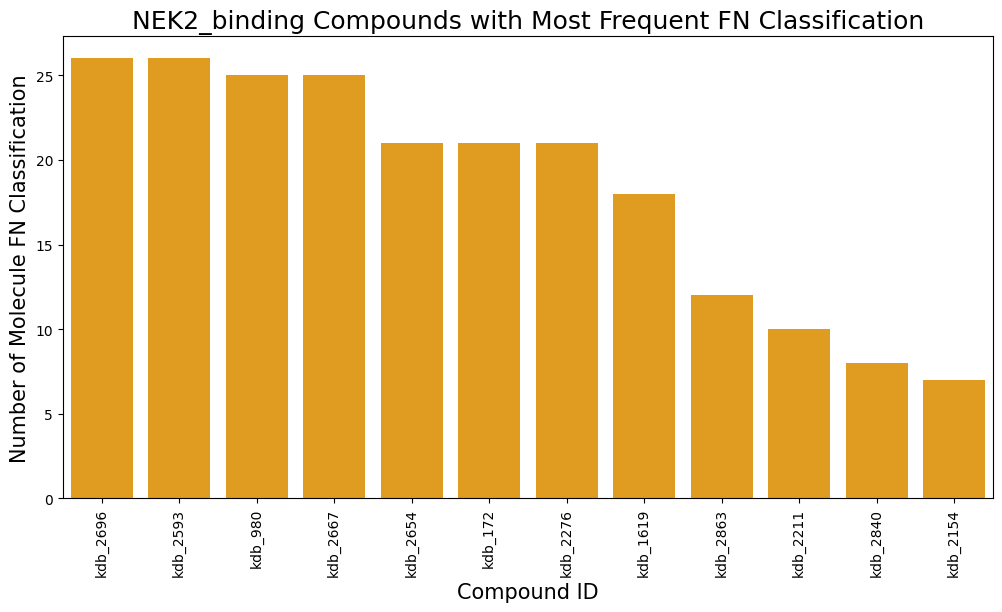

(30, 12)


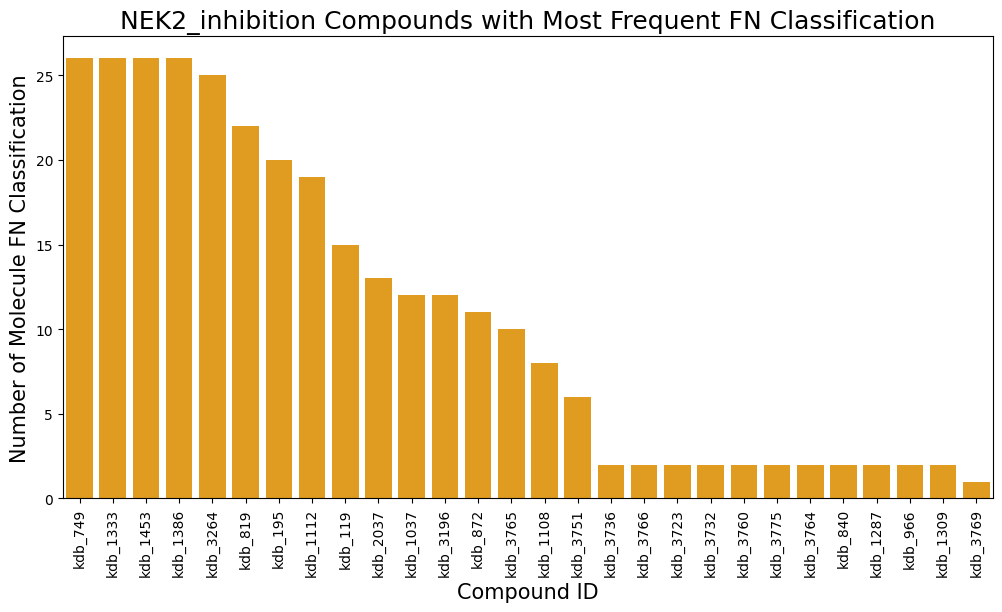

(30, 12)


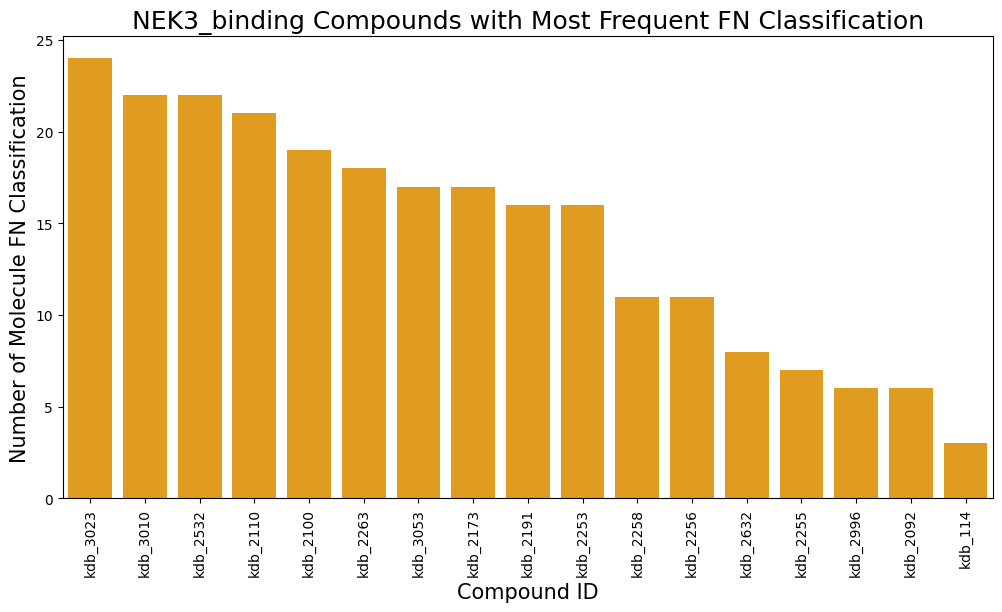

(30, 12)


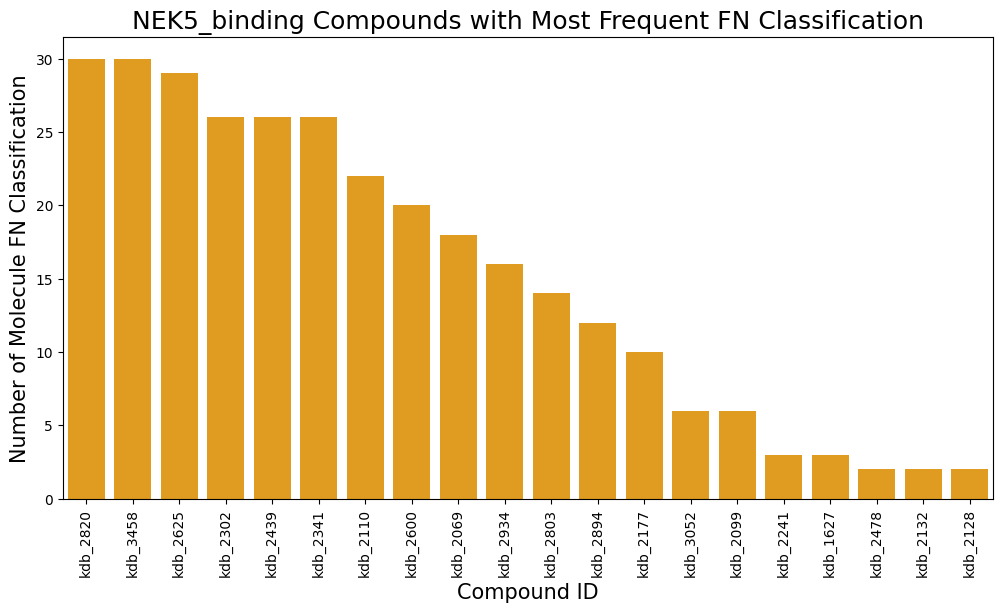

(30, 12)


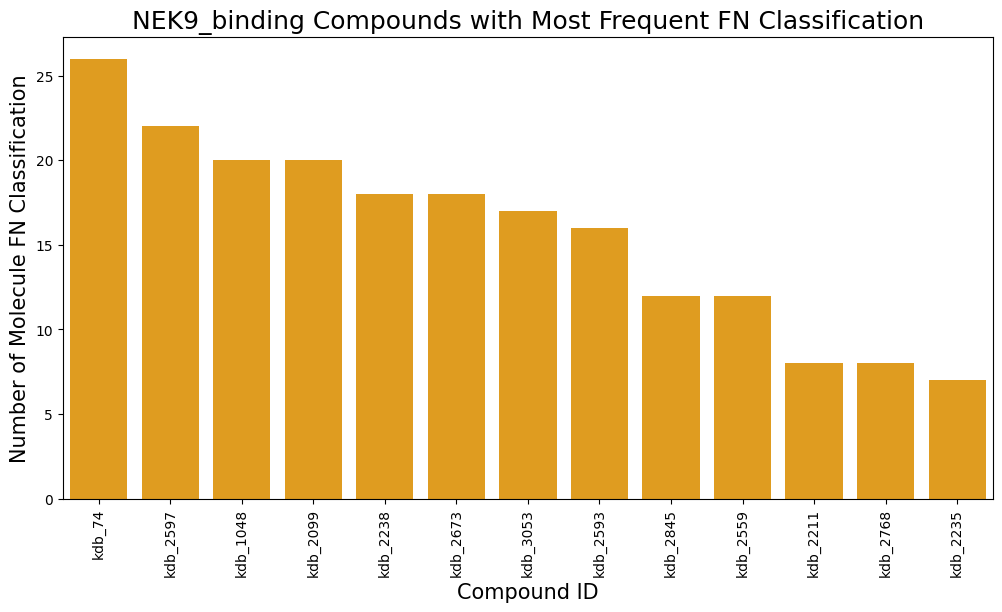

(30, 12)


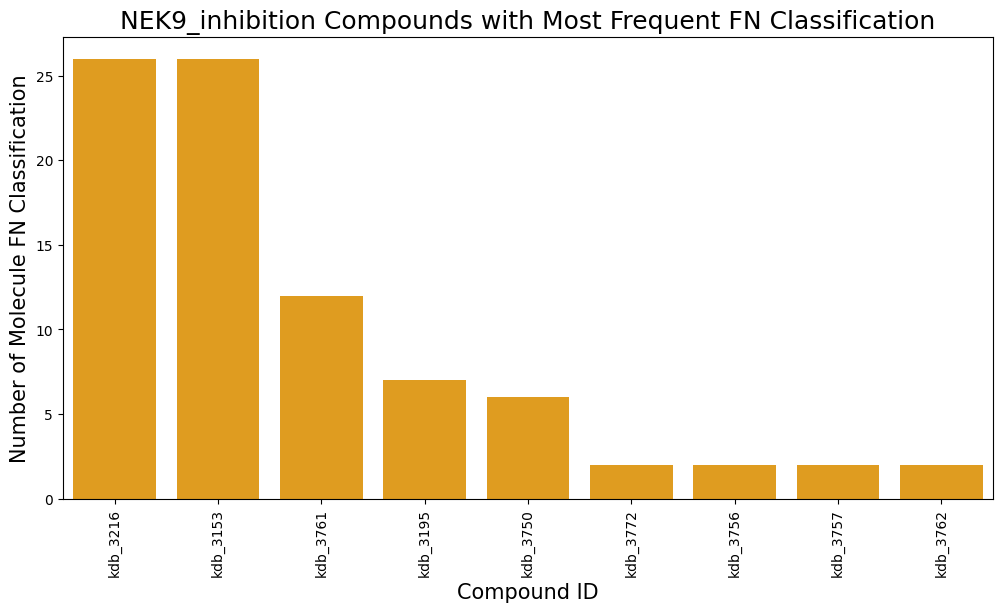

In [325]:
from collections import Counter
fig3 ='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/FN_classification_frequency/'
for nek in neks: 
    nek_df = final_df[final_df['NEK']==nek]
    print(nek_df.shape)
    all_fn_cmpds = [cmpd for fn_list in nek_df['FN'] for cmpd in fn_list] 
    fn_counts = Counter(all_fn_cmpds)
    fn_df = pd.DataFrame(fn_counts.items(),columns=['compound_id','count'])
    fn_df = fn_df.sort_values(by='count', ascending=False)
    plt.figure(figsize=(12, 6)) 
    sns.barplot(data=fn_df, x='compound_id', y='count', color='orange')
    plt.xlabel('Compound ID',fontsize=15)
    plt.xticks(rotation=90)

    plt.ylabel('Number of Molecule FN Classification', fontsize=15)
    plt.title(f'{nek} Compounds with Most Frequent FN Classification', fontsize=18)
    plt.savefig(f'{fig3}{nek}.png',bbox_inches='tight')
    
    plt.show()


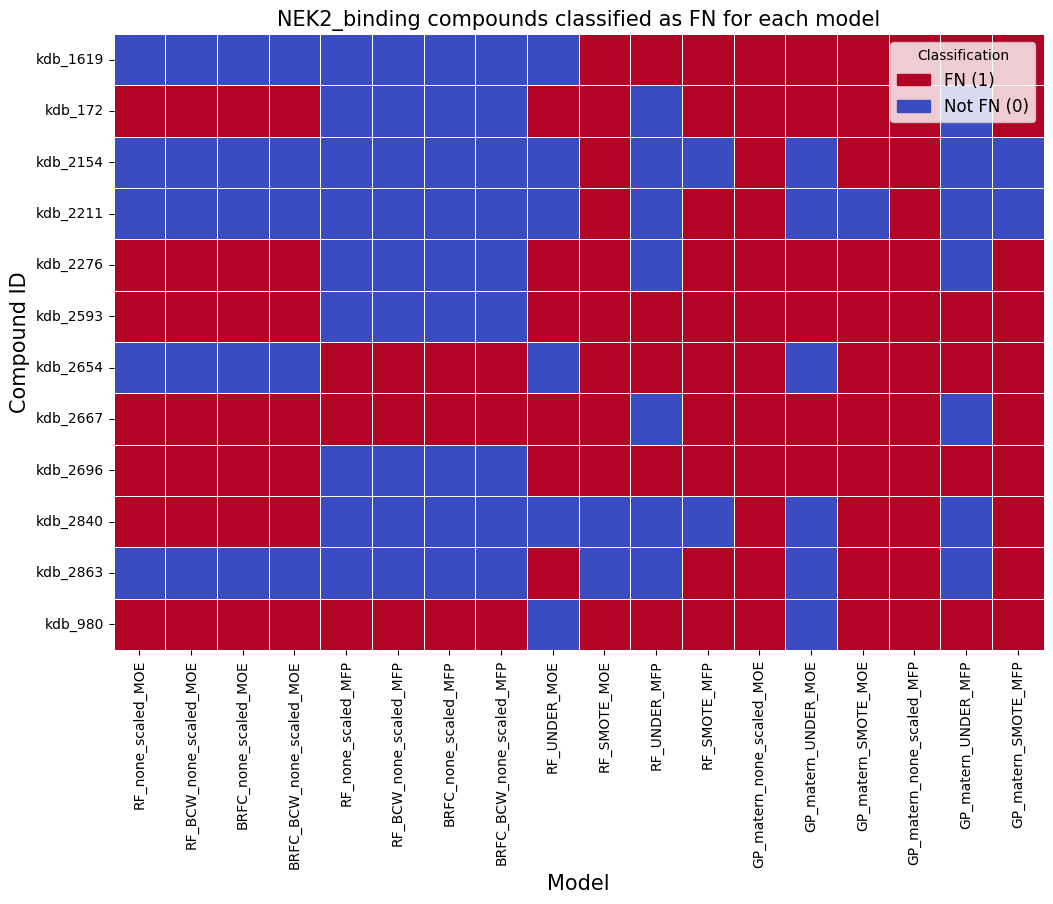

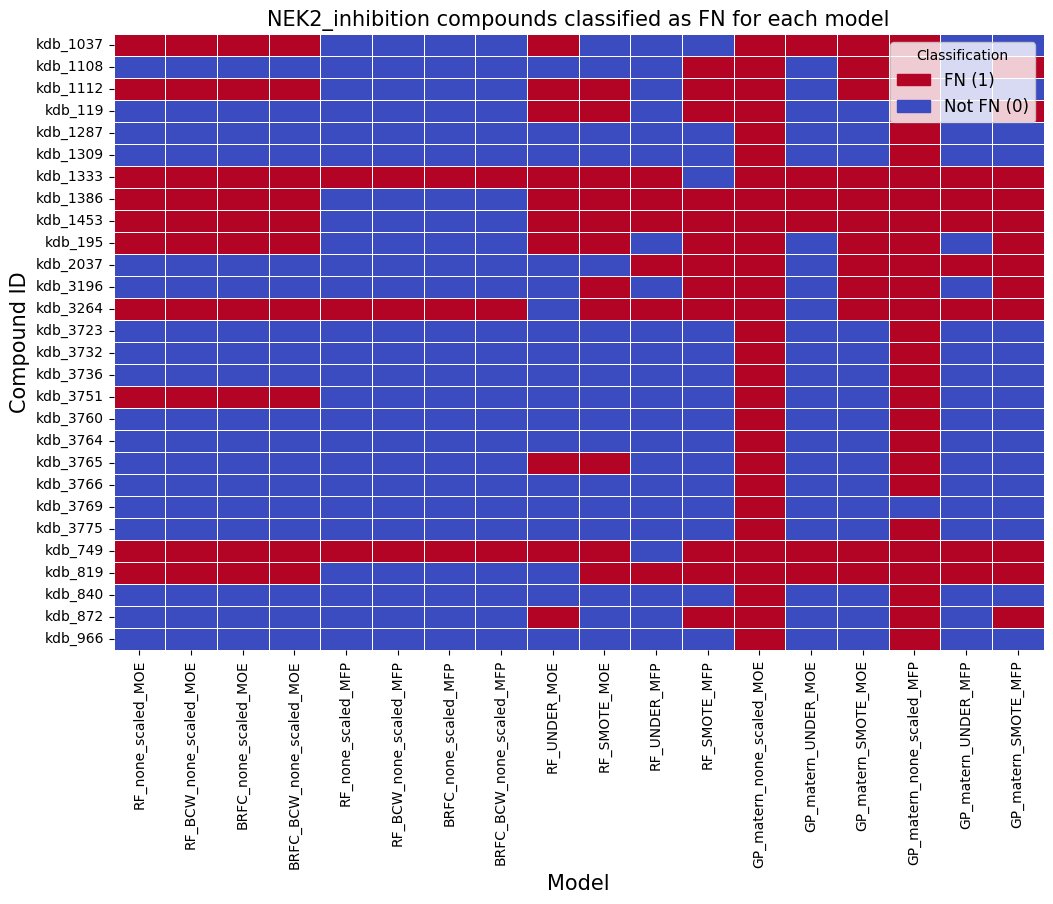

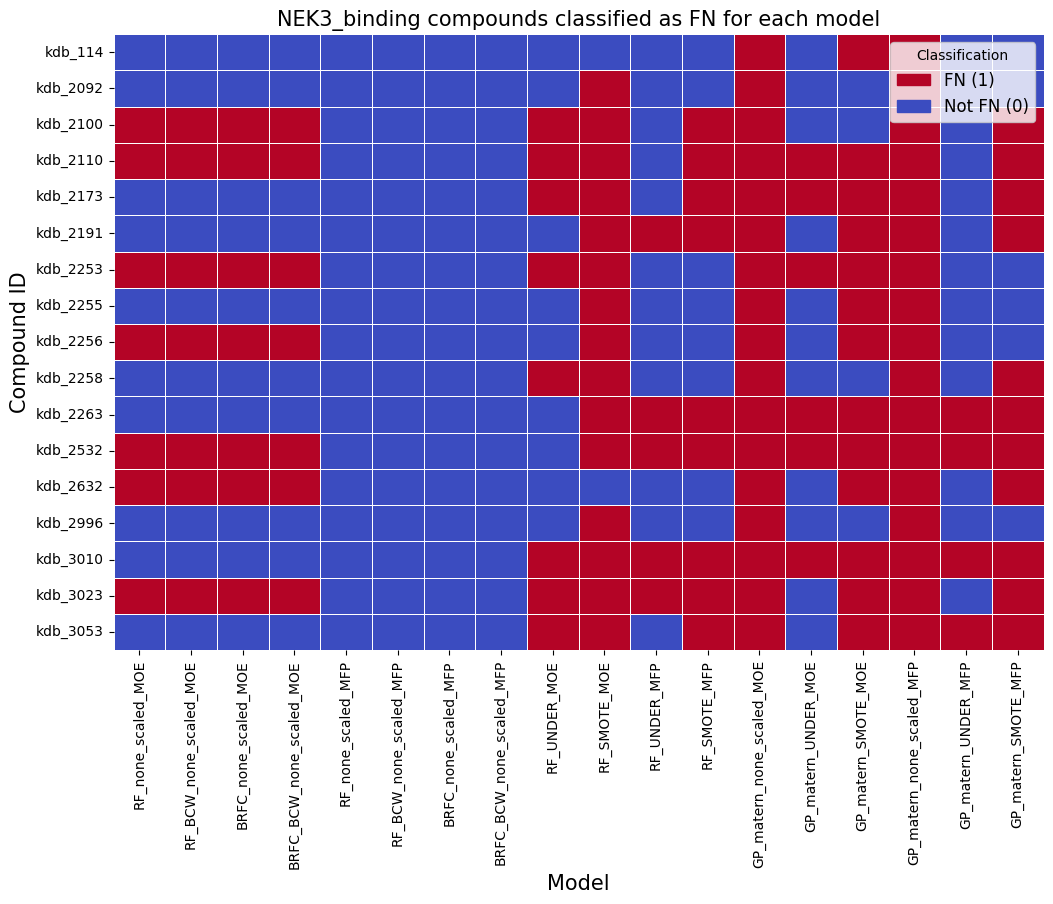

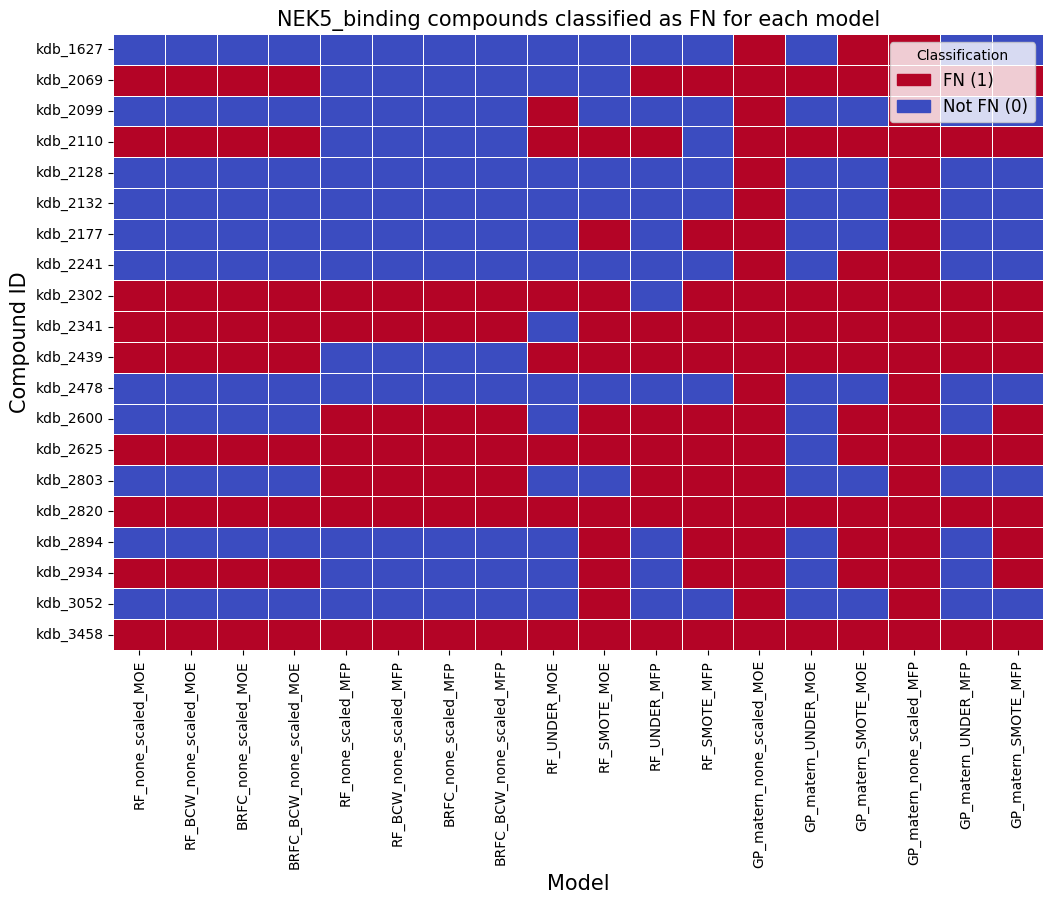

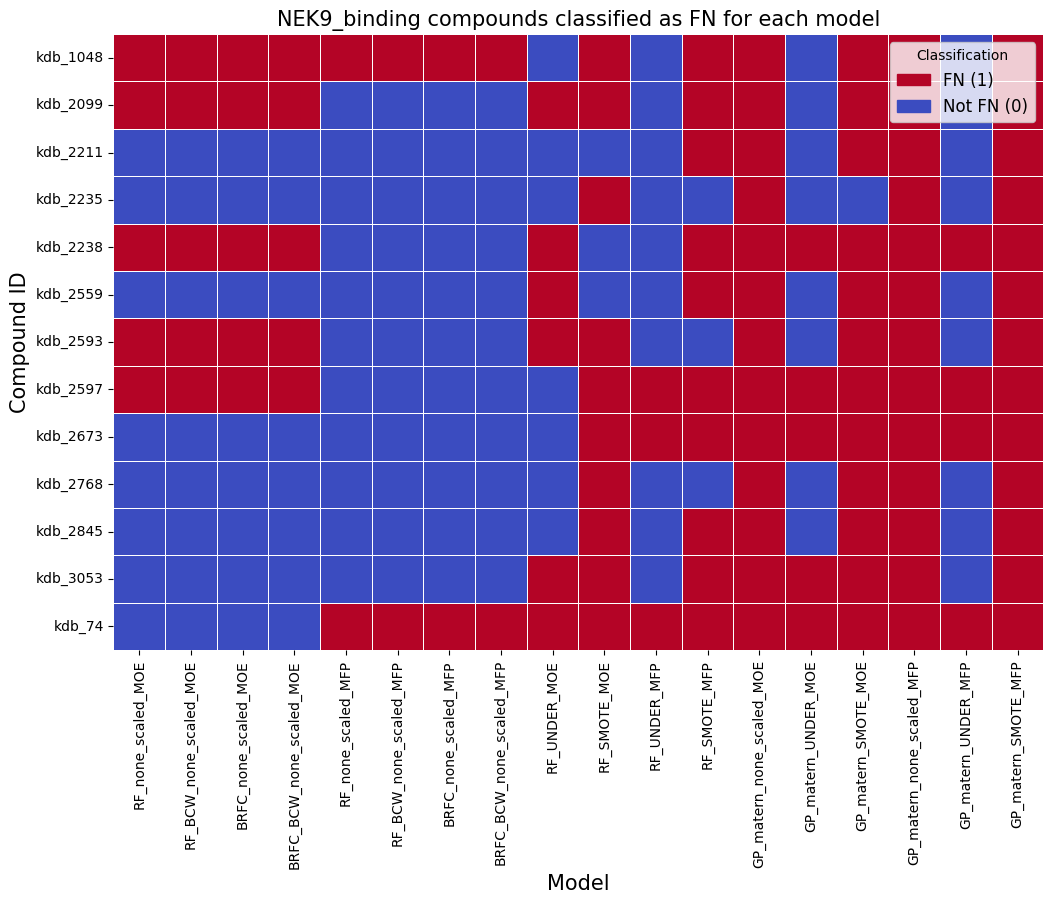

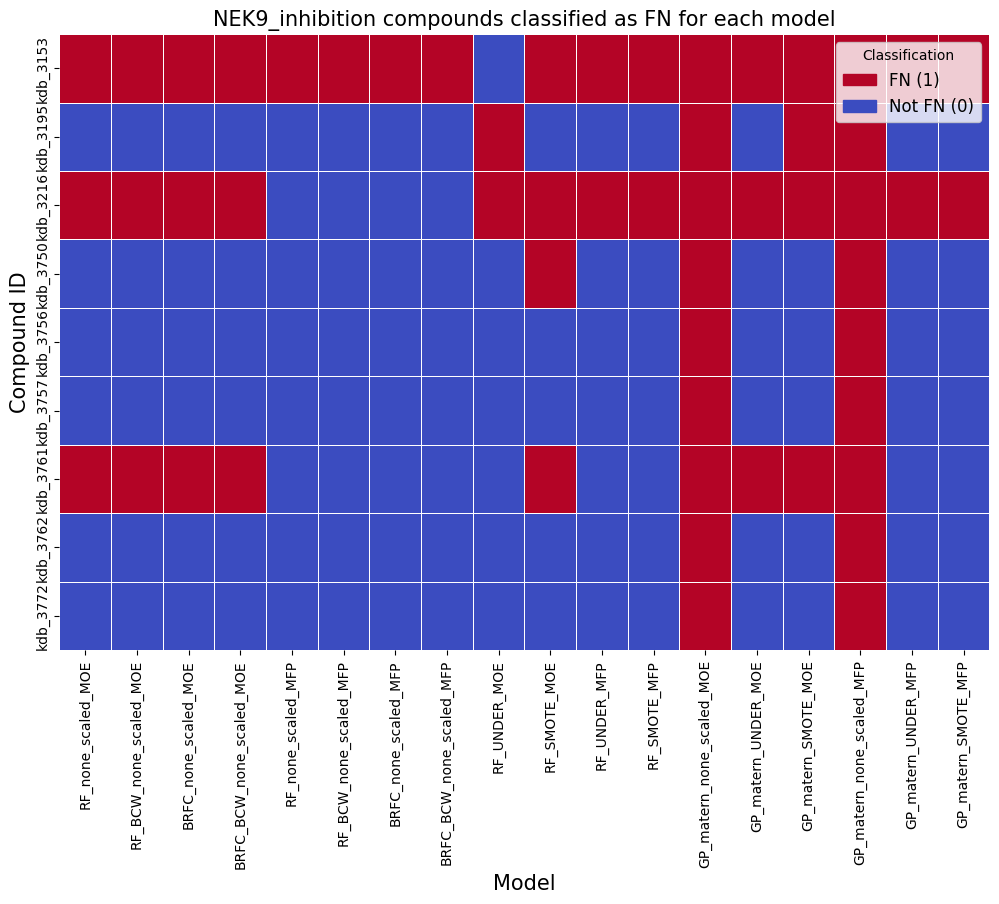

In [349]:
fig4 ='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/model_FN/'
import matplotlib.patches as mpatches
for nek in neks:
    nek_df = final_df[final_df['NEK'] == nek]
    nek_raw = nek_df[(nek_df['strategy'] == 'none_scaled') & (nek_df['model'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
    rf_other = nek_df[(nek_df['model'] == 'RF') & (nek_df['strategy'].isin(['UNDER', 'SMOTE']))] 
    gp=nek_df[nek_df['model']=='GP_matern'] 
    
    
    nek_df2 = pd.concat([nek_raw, rf_other, gp])
    nek_df2['model'] = nek_df2['model'].astype(str)+'_'+nek_df2['strategy']+ '_'+nek_df2['feat_type'] 
    all_model_types=nek_df2['model'].unique()

    
    # fn_dict = {(model,feat): set(nek_df2[(nek_df2['model']==model)&(nek_df2['feat_type']==feat)]['FN'].sum())
    #     for model in all_model_types for feat in feat_types}
    # set(cmpd for fn_list in nek_df2[(nek_df2['model']==model) & (nek_df2['feat_type']==feat)]['FN'] for cmpd in fn_list)

    fn_dict = {model: set(nek_df2[nek_df2['model']==model]['FN'].sum())for model in all_model_types}
    all_fn_cmpds = sorted(set.union(*fn_dict.values()))
    fn_matrix = pd.DataFrame(0, index=all_fn_cmpds, columns=fn_dict.keys())
    # display(fn_matrix)

    for model, cmpds in fn_dict.items():
        fn_matrix.loc[list(cmpds), (model)]=1
        # 1 = classified FN 

    plt.figure(figsize=(12,8))
    ax = sns.heatmap(fn_matrix, cmap='coolwarm', linewidths=0.5,cbar=False)
    fn_patch = mpatches.Patch(color=sns.color_palette('coolwarm', as_cmap=True)(1.0),label='FN (1)')
    not_fn_patch = mpatches.Patch(color=sns.color_palette("coolwarm", as_cmap=True)(0.0), label='Not FN (0)')
    
    plt.legend(handles=[fn_patch,not_fn_patch], loc='upper right', fontsize=12, title="Classification")

    plt.xlabel('Model',fontsize=15)
    plt.ylabel('Compound ID',fontsize=15)
    plt.title(f'{nek} compounds classified as FN for each model',fontsize=15)
    plt.xticks(rotation=90)
    plt.savefig(f"{fig4}{nek}_FN_heatmap.png", bbox_inches='tight')
    plt.show()


NameError: name 'neks' is not defined

In [197]:
from updated_RF import * 

rf_models = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
import pickle 
with open(f'{rf_models}NEK2_binding_MOE_none_scaled_BRFC_prod.pkl', 'rb') as f: 
    nek2bindbrfc = pickle.load(f) 
nek2bindnoneX = pd.read_csv(f'{df_path}NEK2_binding_MOE_none_scaled_testX.csv')
nek2bindnoney = pd.read_csv(f'{df_path}NEK2_binding_MOE_none_scaled_test_y.csv').squeeze()

test_test = gather_rf_results(nek2bindbrfc,nek2bindnoneX,nek2bindnoney) 
if (nek2bindnoneX.index == test_test.index).all():
    print('same order')
else:
    print('dfiff order')

same order


In [186]:
these_cols=['NEK', 'model', 'cm', 'recall', '1-specificity', 'balanced_accuracy', 'distance'] 

In [187]:
nek5b = full_df2[full_df2['NEK']=='NEK5_binding']
nek5b_select = nek5b[nek5b['feat_type']=='MFP']
nek5b_select
nek5b_filtered = nek5b_select[(nek5b_select['model'] == 'NEK5_binding_MFP_UNDER_matern') |
(nek5b_select['model'] == 'NEK5_binding_MFP_SMOTE_matern') | (nek5b_select['model'] == 'NEK5_binding_MFP_none_scaled_BRFC_BCW')]
nek5b_filtered = nek5b_filtered[these_cols]
nek5b_filtered

,NEK,model,cm,recall,1-specificity,balanced_accuracy,distance
59,NEK5_binding,NEK5_binding_MFP_UNDER_matern,"[198, 30, 8, 12]",0.60,0.131579,0.734211,0.421086
61,NEK5_binding,NEK5_binding_MFP_SMOTE_matern,"[227, 1, 11, 9]",0.45,0.004386,0.722807,0.550017
115,NEK5_binding,NEK5_binding_MFP_none_scaled_BRFC_BCW,"[178, 50, 7, 13]",0.65,0.219298,0.715351,0.413028


In [159]:
for nek in neks: 
    full_nek = full_df2[full_df2['NEK']==nek]

    full_nek = full_nek[full_nek['strategy']!='UNDER']
    top_neks=full_nek.sort_values(['balanced_accuracy'], ascending=False).head(1)
    # display(top_neks[col_order].head(1))
    # display(top_neks)
    best_dists.append(top_neks)
best_dists_df = pd.concat(best_dists, ignore_index=True)
best_dists_df['model name'] =best_dists_df['NEK'].astype(str)+' '+best_dists_df['strategy']+ ' ' +best_dists_df['feat_type']


<IPython.core.display.Javascript object>